In [1]:
import subprocess
import pandas as pd
import re
import json
import seaborn as sns 
print(sns.__version__) # should be 0.9

import matplotlib.pyplot as plt
sns.set(style="whitegrid")

from IPython.display import display, HTML


0.9.0


In [2]:
# Compile files
# subprocess.run(["chmod", "+x" "compile.sh"])
# subprocess.run(["chmod", "+x" "run.sh"])
# subprocess.run(["./compile.sh"])


# def runs():
#     ps = ("uniform", "deterministic_fitness", "ranking_parent", "stochastic_parent", "stochastic_parent_no_repitition", "tournament_parent")
#     rec = ("uniform", "simple_arithmetic")
    
#     for p in ps:
#         for re in rec:
#             for i in range(2,10):
#                 yield (p, re, i)


# subprocess.run(["rm", "./log/bent_cigar.txt", "./log/katsura.txt", "./log/chaffers.txt"])

# for (parentselection, recombination, parents) in runs():
#     subprocess.run(["./run.sh", '"{}"', '"{}"', '"{}"'.format(parentselection, recombination, parents)])
# subprocess.run(["./run.sh", parentselection, recombination, str(parents)])


In [3]:
### For some reason the below only works for me with SphereEvaluation, not BentCigarFunction... Very annoying
### So just run the command and pipe it to a text file and read that out...

# result = subprocess.run(['java', '-jar', 'testrun.jar', '-evaluation=BentCigarFunction', '-seed=1', '-submission=player50'], stdout=subprocess.PIPE)
# output = result.stdout.decode('utf-8')
# print(result, result.stderr, result.stdout)
# print(output)

In [40]:
import os


def create_run_df(run_output, run_config):
    df = pd.DataFrame()
    generation_nr = 0
    matches = re.finditer("Statistic({.+})", run_output)
    for m in matches:
        json_str = m[1]
        obj = pd.read_json(json_str, orient='column', typ='series')
        obj.at['run_config'] = run_config
        obj.at['generation_nr'] = generation_nr

        df = df.append(obj, ignore_index=True)
        generation_nr += 1
        
    return df

def create_all_runs_dfs(file_path):
    f = open(file_path, "r")
    output = f.read()
    run = 0
    print("Processing file: {}".format(file_path))
    for m in re.finditer("---Run ({.+})", output):
        print("Processing run {}".format(run))

        configuration_json = m.groups(1)[0]
        end_m = re.search("---Finished run---", output[m.start():])

        if end_m is None:
            return

        run_output = output[m.end():end_m.end() + m.end()]

        df = create_run_df(run_output, configuration_json)

        run += 1
        yield df

# dfs = create_all_runs_dfs("bent_cigar.txt")


all_dfs = {'cigar': {}, 'schaffer': {}, 'katsuura': {}}
total_dfs = {'cigar': None, 'schaffer': None, 'katsuura': None}
runs = (('cigar', "./log/bent_cigar.txt",), ('katsuura', "./log/katsura.txt",), ('schaffer', "./log/chaffers.txt",))

for fn_key, file in runs:
    if not os.path.isfile(file):
        continue
    
    dfs = create_all_runs_dfs(file)
    df = next(dfs)
    total_df = df
    all_dfs[fn_key] = {df['run_config'][0] : df}
    for next_df in dfs:
        config = next_df['run_config'][0]
        all_dfs[fn_key][config] = next_df
        total_df = total_df.append(next_df)
    
    total_dfs[fn_key] = total_df

# Remove empty total-frames
remove = [fn for fn, total_df in total_dfs.items() if total_df is None]
for k in remove: del total_dfs[k]    


Processing file: ./log/bent_cigar.txt
Processing run 0
Processing run 1
Processing run 2
Processing run 3
Processing run 4
Processing run 5
Processing run 6
Processing run 7
Processing run 8
Processing run 9
Processing run 10
Processing run 11
Processing run 12
Processing run 13
Processing run 14
Processing run 15
Processing run 16
Processing run 17
Processing run 18
Processing run 19
Processing run 20
Processing run 21
Processing run 22
Processing run 23
Processing run 24
Processing run 25
Processing run 26
Processing run 27
Processing run 28
Processing run 29
Processing run 30
Processing run 31
Processing run 32
Processing run 33
Processing run 34
Processing run 35
Processing run 36
Processing run 37
Processing run 38
Processing run 39
Processing run 40
Processing run 41
Processing run 42
Processing run 43
Processing run 44
Processing run 45
Processing run 46
Processing run 47
Processing run 48
Processing run 49
Processing run 50
Processing run 51
Processing run 52
Processing run 53


Processing run 435
Processing run 436
Processing run 437
Processing run 438
Processing run 439
Processing run 440
Processing run 441
Processing run 442
Processing run 443
Processing run 444
Processing run 445
Processing run 446
Processing run 447
Processing run 448
Processing run 449
Processing run 450
Processing run 451
Processing run 452
Processing run 453
Processing run 454
Processing run 455
Processing run 456
Processing run 457
Processing run 458
Processing run 459
Processing run 460
Processing run 461
Processing run 462
Processing run 463
Processing run 464
Processing run 465
Processing run 466
Processing run 467
Processing run 468
Processing run 469
Processing run 470
Processing run 471
Processing run 472
Processing run 473
Processing run 474
Processing run 475
Processing run 476
Processing run 477
Processing run 478
Processing run 479
Processing run 480
Processing run 481
Processing run 482
Processing run 483
Processing run 484
Processing run 485
Processing run 486
Processing r

Processing run 867
Processing run 868
Processing run 869
Processing run 870
Processing run 871
Processing run 872
Processing run 873
Processing run 874
Processing run 875
Processing run 876
Processing run 877
Processing run 878
Processing run 879
Processing run 880
Processing run 881
Processing run 882
Processing run 883
Processing run 884
Processing run 885
Processing run 886
Processing run 887
Processing run 888
Processing run 889
Processing run 890
Processing run 891
Processing run 892
Processing run 893
Processing run 894
Processing run 895
Processing run 896
Processing run 897
Processing run 898
Processing run 899
Processing run 900
Processing run 901
Processing run 902
Processing run 903
Processing run 904
Processing run 905
Processing run 906
Processing run 907
Processing run 908
Processing run 909
Processing run 910
Processing run 911
Processing run 912
Processing run 913
Processing run 914
Processing run 915
Processing run 916
Processing run 917
Processing run 918
Processing r

In [41]:
# Mean max for different functions:
for fn, total_df in total_dfs.items():
    print(fn)
    mean = total_df.groupby(['run_config', 'generation_nr']).mean()
    max_idx = mean['maxFitness'].idxmax()
    
    display(mean.loc[max_idx])

cigar


averageAge                 6.134000
averageFitness             9.772251
averageOfstdevGenomes      0.077045
maxAge                    25.000000
maxFitness                 9.934478
minAge                     0.000000
minFitness                 9.673730
populationSize           100.000000
stdevAge                   5.529114
stdevFitness               0.066181
Name: ({"parentScheme": "uniform", "recombinationScheme": "center_of_mass", "nr_of_parents": 2 }, 109.0), dtype: float64

In [44]:
# print(all_dfs.keys())
for key, dfs in all_dfs.items():
    for config, df in dfs.items():
        print(key)
        print(config)
        df.head()
    
        display(HTML(df.tail(5).to_html()))

cigar
{"parentScheme": "uniform", "recombinationScheme": "uniform", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,5.24,9.415738,0.061689,105.0,25.0,9.642969,0.0,9.310782,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.051970,0.077076,"[0.05848672464469701, 0.0020392740655400003, 0..."
106,5.19,9.426230,0.057309,106.0,26.0,9.642969,0.0,9.333049,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",4.797280,0.071065,"[0.058397938196958, 1.77635683940025e-15, 0.03..."
107,5.31,9.450051,0.058169,107.0,27.0,9.683854,0.0,9.356295,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",4.930913,0.076619,"[0.05693142515288901, 1.77635683940025e-15, 0...."
108,5.48,9.459879,0.058183,108.0,28.0,9.683854,0.0,9.367298,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.099961,0.072190,"[0.058119308193297005, 1.77635683940025e-15, 0..."
109,4.93,9.482433,0.057714,109.0,29.0,9.694207,0.0,9.396289,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.070020,0.073983,"[0.055810084732919006, 1.77635683940025e-15, 0..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,4.65,9.603132,0.014075,105.0,22.0,9.632133,0.0,9.590832,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",4.697606,0.009534,"[1.77635683940025e-15, 0.025251802818900004, 0..."
106,4.43,9.605611,0.013788,106.0,23.0,9.635227,0.0,9.593348,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",4.635202,0.009263,"[1.77635683940025e-15, 0.024812772270339, 0.04..."
107,4.61,9.607217,0.013751,107.0,24.0,9.635227,0.0,9.596406,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",4.702967,0.008485,"[1.77635683940025e-15, 0.026759420458491, 0.04..."
108,4.88,9.608637,0.013815,108.0,25.0,9.635227,0.0,9.599176,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",4.842066,0.007836,"[1.77635683940025e-15, 0.028192022037585, 0.04..."
109,4.96,9.610045,0.013563,109.0,26.0,9.635227,0.0,9.601331,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.039683,0.007328,"[1.77635683940025e-15, 0.027459420239236, 0.04..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,25.63,0.757680,0.669239,105.0,100.0,2.048667,0.0,0.391244,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",20.913467,0.415980,"[0.57891159463089, 0.6273204714682861, 0.86632..."
106,26.63,0.757680,0.669239,106.0,101.0,2.048667,1.0,0.391244,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",20.913467,0.415980,"[0.57891159463089, 0.6273204714682861, 0.86632..."
107,26.91,0.772052,0.666493,107.0,102.0,2.048667,0.0,0.394711,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",21.192024,0.419577,"[0.57380982345094, 0.6397841503835331, 0.86202..."
108,27.10,0.783154,0.664305,108.0,103.0,2.048667,0.0,0.411925,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",21.394625,0.417833,"[0.57340990693603, 0.644859636861131, 0.840296..."
109,26.81,0.804715,0.656053,109.0,104.0,2.048667,0.0,0.437587,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",21.242738,0.430870,"[0.5663813168554811, 0.6276877076905001, 0.817..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "center_of_mass", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,6.17,9.763843,0.076561,105.0,25.0,9.926847,0.0,9.674607,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",4.931643,0.058542,"[0.08555834139568501, 0.070097166393115, 0.074..."
106,6.64,9.771160,0.075095,106.0,26.0,9.926847,0.0,9.687806,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.105918,0.055801,"[0.082724565513465, 0.06842463820463901, 0.073..."
107,6.42,9.785576,0.072484,107.0,21.0,9.926847,0.0,9.704245,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.190722,0.050299,"[0.077172610143018, 0.06512103991387601, 0.067..."
108,6.14,9.798971,0.069666,108.0,22.0,9.926847,0.0,9.723502,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.353541,0.047213,"[0.07537629790781701, 0.06456450716308801, 0.0..."
109,5.92,9.811924,0.068019,109.0,23.0,9.951305,0.0,9.742324,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.315412,0.045806,"[0.071384210245392, 0.057594312090724006, 0.07..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "uniform", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,8.66,8.437940,0.206348,105.0,50.0,9.283562,0.0,7.962794,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",8.860271,0.352931,"[0.145181772851376, 0.160926216812409, 0.23980..."
106,7.54,8.488556,0.201140,106.0,33.0,9.283562,0.0,7.997948,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",7.768423,0.324820,"[0.14217459327176601, 0.158319353077852, 0.237..."
107,7.62,8.544873,0.197859,107.0,34.0,9.283562,0.0,8.102822,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",7.943274,0.294153,"[0.132058108675238, 0.15104694677798802, 0.237..."
108,7.64,8.597378,0.193984,108.0,35.0,9.283562,0.0,8.193598,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",8.074057,0.280517,"[0.131921436386315, 0.144354452148234, 0.23125..."
109,8.05,8.635441,0.191050,109.0,36.0,9.283562,0.0,8.265519,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",8.363462,0.263665,"[0.13226139938310502, 0.148921976604721, 0.227..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,4.37,9.031706,0.042952,105.0,25.0,9.163156,0.0,8.991546,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.717319,0.028542,"[0.087277839757399, 0.07342029234571701, 0.046..."
106,4.37,9.039365,0.042406,106.0,26.0,9.163156,0.0,9.005017,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.828364,0.027378,"[0.08823518088283301, 0.07233443868393001, 0.0..."
107,4.26,9.046264,0.040842,107.0,22.0,9.163156,0.0,9.011167,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.371773,0.026462,"[0.089823802270816, 0.06420843783605301, 0.046..."
108,4.08,9.056413,0.038919,108.0,23.0,9.163156,0.0,9.024933,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.599304,0.023556,"[0.09209329119164401, 0.056675742958565006, 0...."
109,4.51,9.062066,0.037883,109.0,24.0,9.163156,0.0,9.031068,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.834242,0.022992,"[0.092678054885918, 0.054169732154101, 0.04447..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,24.11,0.317165,0.754239,105.0,92.0,1.738164,0.0,0.123429,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",20.978987,0.273683,"[0.6903952551565881, 0.733080850370422, 0.8564..."
106,25.11,0.317165,0.754239,106.0,93.0,1.738164,1.0,0.123429,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",20.978987,0.273683,"[0.6903952551565881, 0.733080850370422, 0.8564..."
107,24.46,0.325203,0.755960,107.0,94.0,1.738164,0.0,0.125945,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",21.015908,0.275015,"[0.685187346709174, 0.779717955494401, 0.85633..."
108,24.88,0.361255,0.752845,108.0,95.0,3.623092,0.0,0.128903,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",21.304122,0.427070,"[0.6861483456862231, 0.7679287027239791, 0.830..."
109,25.58,0.362760,0.752691,109.0,96.0,3.623092,0.0,0.128942,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",21.454687,0.426513,"[0.688878512191008, 0.76796010421043, 0.830429..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "center_of_mass", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,6.67,8.623416,0.177142,105.0,32.0,9.617258,0.0,8.224998,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",6.435923,0.313263,"[0.11685614014238001, 0.207369130668375, 0.211..."
106,6.93,8.663461,0.171263,106.0,33.0,9.617258,0.0,8.388911,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",6.696648,0.298619,"[0.12192701793421801, 0.204835940633076, 0.206..."
107,6.51,8.703316,0.172179,107.0,34.0,9.617258,0.0,8.398262,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",6.979248,0.313344,"[0.127446031130484, 0.201013795587406, 0.20982..."
108,6.83,8.768564,0.173769,108.0,35.0,9.617258,0.0,8.398262,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",7.431090,0.322999,"[0.131523446475649, 0.188483459066484, 0.22214..."
109,7.58,8.810197,0.172981,109.0,36.0,9.617258,0.0,8.398262,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",7.650072,0.315059,"[0.1326760748592, 0.171344817936353, 0.2242612..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "uniform", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,7.35,8.303504,0.206213,105.0,55.0,9.467707,0.0,7.789247,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",8.779949,0.377477,"[0.19269000370904302, 0.203915214452544, 0.168..."
106,6.74,8.378907,0.203293,106.0,35.0,9.467707,0.0,7.872569,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.175821,0.344340,"[0.194810807914361, 0.19813618339287, 0.173216..."
107,6.72,8.446422,0.196155,107.0,34.0,9.467707,0.0,7.973900,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.842631,0.326007,"[0.188928391983919, 0.19140932439146602, 0.171..."
108,6.63,8.520823,0.192644,108.0,35.0,9.467707,0.0,8.067281,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.800963,0.306881,"[0.18536857538821702, 0.177196184045879, 0.170..."
109,6.97,8.560397,0.190696,109.0,36.0,9.467707,0.0,8.165851,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.041953,0.291310,"[0.178906533353687, 0.17959994999398102, 0.172..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,7.16,8.918505,0.051814,105.0,49.0,9.282876,0.0,8.838656,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",8.329130,0.071281,"[0.08841310139620401, 0.098793123913662, 0.094..."
106,5.65,8.932867,0.046882,106.0,50.0,9.282876,0.0,8.863825,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.181051,0.067964,"[0.058327283951042, 0.097946570935105, 0.08933..."
107,4.81,8.940419,0.044697,107.0,35.0,9.282876,0.0,8.872619,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",5.352934,0.065147,"[0.042441888856644, 0.10354035681770501, 0.084..."
108,5.57,8.951098,0.045730,108.0,36.0,9.282876,0.0,8.872619,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",5.555637,0.063053,"[0.042441888856644, 0.10664680326304501, 0.078..."
109,5.47,8.958794,0.041433,109.0,37.0,9.282876,0.0,8.898102,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",5.358087,0.059822,"[0.009325685073713001, 0.101950022702098, 0.08..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,22.68,0.305279,0.754072,105.0,86.0,4.764939,0.0,0.079292,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",18.970967,0.544520,"[0.7658650587111581, 0.645798820175116, 0.7131..."
106,23.08,0.307430,0.757236,106.0,87.0,4.764939,0.0,0.085058,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",19.124163,0.543807,"[0.7645105084642091, 0.647428259296516, 0.7147..."
107,23.58,0.311380,0.756808,107.0,88.0,4.764939,0.0,0.089188,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",19.475205,0.542818,"[0.7818936642381721, 0.6663880026190291, 0.722..."
108,21.35,0.317216,0.756789,108.0,70.0,4.764939,0.0,0.098751,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",17.845097,0.541288,"[0.785968377929085, 0.668706198972511, 0.72945..."
109,22.35,0.317216,0.756789,109.0,71.0,4.764939,1.0,0.098751,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",17.845097,0.541288,"[0.785968377929085, 0.668706198972511, 0.72945..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,7.49,7.812537,0.306170,105.0,57.0,9.07756,0.0,7.620023,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",10.032442,0.310380,"[0.30124154214451804, 0.12430485269977001, 0.4..."
106,8.07,7.836581,0.299704,106.0,58.0,9.07756,0.0,7.620023,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",10.313346,0.321593,"[0.31109934808307005, 0.132316918993237, 0.455..."
107,7.88,7.848221,0.297571,107.0,59.0,9.07756,0.0,7.622292,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",9.996279,0.324864,"[0.30386755085842804, 0.134605522177998, 0.457..."
108,8.50,7.868918,0.298396,108.0,60.0,9.07756,0.0,7.622292,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",10.202451,0.340229,"[0.29140120735574504, 0.136172802611675, 0.468..."
109,8.94,7.874569,0.297469,109.0,61.0,9.07756,0.0,7.622292,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",10.580000,0.336913,"[0.266892049713204, 0.137349884755981, 0.48582..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "uniform", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
546,11.82,5.346388,0.405062,546.0,46.0,7.859065,0.0,4.452567,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.953271,0.738266,"[0.38765276061727905, 0.36032834643934203, 0.4..."
547,11.62,5.465391,0.396183,547.0,47.0,7.859065,0.0,4.536934,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.009775,0.778725,"[0.39170824824918204, 0.3520097920203, 0.44935..."
548,10.85,5.604552,0.386439,548.0,48.0,7.859065,0.0,4.662332,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.054228,0.792411,"[0.38411624272827205, 0.339165750091718, 0.445..."
549,10.88,5.677847,0.383033,549.0,49.0,7.859065,0.0,4.806496,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.163936,0.768302,"[0.36532998503138103, 0.344559794309147, 0.435..."
550,10.57,5.754215,0.381306,550.0,50.0,8.429632,0.0,4.892504,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.265725,0.796670,"[0.349130869948214, 0.359513344635347, 0.44346..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
492,11.82,5.346388,0.405062,492.0,46.0,7.859065,0.0,4.452567,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.953271,0.738266,"[0.38765276061727905, 0.36032834643934203, 0.4..."
493,11.62,5.465391,0.396183,493.0,47.0,7.859065,0.0,4.536934,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.009775,0.778725,"[0.39170824824918204, 0.3520097920203, 0.44935..."
494,10.85,5.604552,0.386439,494.0,48.0,7.859065,0.0,4.662332,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.054228,0.792411,"[0.38411624272827205, 0.339165750091718, 0.445..."
495,10.88,5.677847,0.383033,495.0,49.0,7.859065,0.0,4.806496,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.163936,0.768302,"[0.36532998503138103, 0.344559794309147, 0.435..."
496,10.57,5.754215,0.381306,496.0,50.0,8.429632,0.0,4.892504,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.265725,0.796670,"[0.349130869948214, 0.359513344635347, 0.44346..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
427,11.82,5.346388,0.405062,427.0,46.0,7.859065,0.0,4.452567,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.953271,0.738266,"[0.38765276061727905, 0.36032834643934203, 0.4..."
428,11.62,5.465391,0.396183,428.0,47.0,7.859065,0.0,4.536934,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.009775,0.778725,"[0.39170824824918204, 0.3520097920203, 0.44935..."
429,10.85,5.604552,0.386439,429.0,48.0,7.859065,0.0,4.662332,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.054228,0.792411,"[0.38411624272827205, 0.339165750091718, 0.445..."
430,10.88,5.677847,0.383033,430.0,49.0,7.859065,0.0,4.806496,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.163936,0.768302,"[0.36532998503138103, 0.344559794309147, 0.435..."
431,10.57,5.754215,0.381306,431.0,50.0,8.429632,0.0,4.892504,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.265725,0.796670,"[0.349130869948214, 0.359513344635347, 0.44346..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
368,11.82,5.346388,0.405062,368.0,46.0,7.859065,0.0,4.452567,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.953271,0.738266,"[0.38765276061727905, 0.36032834643934203, 0.4..."
369,11.62,5.465391,0.396183,369.0,47.0,7.859065,0.0,4.536934,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.009775,0.778725,"[0.39170824824918204, 0.3520097920203, 0.44935..."
370,10.85,5.604552,0.386439,370.0,48.0,7.859065,0.0,4.662332,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.054228,0.792411,"[0.38411624272827205, 0.339165750091718, 0.445..."
371,10.88,5.677847,0.383033,371.0,49.0,7.859065,0.0,4.806496,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.163936,0.768302,"[0.36532998503138103, 0.344559794309147, 0.435..."
372,10.57,5.754215,0.381306,372.0,50.0,8.429632,0.0,4.892504,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.265725,0.796670,"[0.349130869948214, 0.359513344635347, 0.44346..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "uniform", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
308,11.82,5.346388,0.405062,308.0,46.0,7.859065,0.0,4.452567,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.953271,0.738266,"[0.38765276061727905, 0.36032834643934203, 0.4..."
309,11.62,5.465391,0.396183,309.0,47.0,7.859065,0.0,4.536934,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.009775,0.778725,"[0.39170824824918204, 0.3520097920203, 0.44935..."
310,10.85,5.604552,0.386439,310.0,48.0,7.859065,0.0,4.662332,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.054228,0.792411,"[0.38411624272827205, 0.339165750091718, 0.445..."
311,10.88,5.677847,0.383033,311.0,49.0,7.859065,0.0,4.806496,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.163936,0.768302,"[0.36532998503138103, 0.344559794309147, 0.435..."
312,10.57,5.754215,0.381306,312.0,50.0,8.429632,0.0,4.892504,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.265725,0.796670,"[0.349130869948214, 0.359513344635347, 0.44346..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
256,11.82,5.346388,0.405062,256.0,46.0,7.859065,0.0,4.452567,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.953271,0.738266,"[0.38765276061727905, 0.36032834643934203, 0.4..."
257,11.62,5.465391,0.396183,257.0,47.0,7.859065,0.0,4.536934,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.009775,0.778725,"[0.39170824824918204, 0.3520097920203, 0.44935..."
258,10.85,5.604552,0.386439,258.0,48.0,7.859065,0.0,4.662332,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.054228,0.792411,"[0.38411624272827205, 0.339165750091718, 0.445..."
259,10.88,5.677847,0.383033,259.0,49.0,7.859065,0.0,4.806496,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.163936,0.768302,"[0.36532998503138103, 0.344559794309147, 0.435..."
260,10.57,5.754215,0.381306,260.0,50.0,8.429632,0.0,4.892504,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.265725,0.796670,"[0.349130869948214, 0.359513344635347, 0.44346..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
171,11.82,5.346388,0.405062,171.0,46.0,7.859065,0.0,4.452567,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.953271,0.738266,"[0.38765276061727905, 0.36032834643934203, 0.4..."
172,11.62,5.465391,0.396183,172.0,47.0,7.859065,0.0,4.536934,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.009775,0.778725,"[0.39170824824918204, 0.3520097920203, 0.44935..."
173,10.85,5.604552,0.386439,173.0,48.0,7.859065,0.0,4.662332,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.054228,0.792411,"[0.38411624272827205, 0.339165750091718, 0.445..."
174,10.88,5.677847,0.383033,174.0,49.0,7.859065,0.0,4.806496,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.163936,0.768302,"[0.36532998503138103, 0.344559794309147, 0.435..."
175,10.57,5.754215,0.381306,175.0,50.0,8.429632,0.0,4.892504,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.265725,0.796670,"[0.349130869948214, 0.359513344635347, 0.44346..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "center_of_mass", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
118,11.82,5.346388,0.405062,118.0,46.0,7.859065,0.0,4.452567,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.953271,0.738266,"[0.38765276061727905, 0.36032834643934203, 0.4..."
119,11.62,5.465391,0.396183,119.0,47.0,7.859065,0.0,4.536934,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.009775,0.778725,"[0.39170824824918204, 0.3520097920203, 0.44935..."
120,10.85,5.604552,0.386439,120.0,48.0,7.859065,0.0,4.662332,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.054228,0.792411,"[0.38411624272827205, 0.339165750091718, 0.445..."
121,10.88,5.677847,0.383033,121.0,49.0,7.859065,0.0,4.806496,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.163936,0.768302,"[0.36532998503138103, 0.344559794309147, 0.435..."
122,10.57,5.754215,0.381306,122.0,50.0,8.429632,0.0,4.892504,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.265725,0.796670,"[0.349130869948214, 0.359513344635347, 0.44346..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "uniform", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,11.93,4.897799,0.426922,105.0,41.0,8.990238,0.0,3.711435,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",10.479747,1.089414,"[0.33180711757707804, 0.40028621734343706, 0.4..."
106,11.07,5.033798,0.412052,106.0,38.0,8.990238,0.0,3.840735,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",10.156038,1.079283,"[0.315570037482927, 0.362659897342452, 0.39637..."
107,11.18,5.091902,0.405087,107.0,39.0,8.990238,0.0,3.911237,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",10.047268,1.082308,"[0.30733187316795, 0.34225326344148405, 0.3926..."
108,11.01,5.217899,0.398732,108.0,40.0,8.990238,0.0,3.996905,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",10.062301,1.053487,"[0.307373068238586, 0.33345658629844804, 0.390..."
109,11.15,5.280074,0.388079,109.0,41.0,8.990238,0.0,4.137067,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",10.243413,1.033511,"[0.30329483581616, 0.33426833224441604, 0.3884..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,10.33,7.184857,0.204981,105.0,39.0,8.348804,0.0,6.698644,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",9.728366,0.462744,"[0.406774822858093, 0.29445238868107004, 0.246..."
106,10.90,7.229058,0.201857,106.0,40.0,8.348804,0.0,6.721437,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",10.041414,0.455680,"[0.40310611856215506, 0.270712244671831, 0.249..."
107,10.57,7.262676,0.199819,107.0,41.0,8.348804,0.0,6.760167,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",10.003254,0.442351,"[0.401749337373061, 0.26893234693059903, 0.238..."
108,10.80,7.304433,0.196030,108.0,42.0,8.348804,0.0,6.835837,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",10.503333,0.419768,"[0.39715337805919604, 0.26640961654023504, 0.2..."
109,11.07,7.336573,0.193049,109.0,43.0,8.348804,0.0,6.887066,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",10.371360,0.408361,"[0.40005286689191605, 0.256265629056233, 0.235..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,30.66,0.097401,0.825866,105.0,87.0,0.533639,0.0,0.025210,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",22.847416,0.108705,"[0.717142424060056, 0.7272840057584481, 0.8478..."
106,30.16,0.097944,0.827153,106.0,88.0,0.533639,0.0,0.025954,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",23.129946,0.108397,"[0.712485073031997, 0.7442208161869991, 0.8480..."
107,31.07,0.097987,0.829445,107.0,89.0,0.533639,0.0,0.026035,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",23.233276,0.108369,"[0.7133837741420821, 0.744162075816248, 0.8690..."
108,30.85,0.098673,0.829128,108.0,90.0,0.533639,0.0,0.027468,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",23.793434,0.108013,"[0.710293138894036, 0.7609378258973141, 0.8468..."
109,30.16,0.101121,0.830392,109.0,91.0,0.533639,0.0,0.029632,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",24.389637,0.107601,"[0.7250796962874001, 0.749049446483917, 0.8493..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,12.07,4.808291,0.435670,105.0,46.0,8.051072,0.0,3.894678,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",10.996595,0.794156,"[0.41281583684569906, 0.36140808953111003, 0.4..."
106,12.27,4.946812,0.431676,106.0,47.0,8.051072,0.0,3.983655,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",11.515081,0.787645,"[0.412626755723612, 0.35893208924240305, 0.401..."
107,12.28,5.025235,0.414816,107.0,48.0,8.051072,0.0,4.068684,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",11.397438,0.776188,"[0.362444431900984, 0.36207679091619704, 0.377..."
108,12.64,5.108992,0.409018,108.0,49.0,8.051072,0.0,4.146351,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",11.406595,0.766672,"[0.358753105589173, 0.35597533191366304, 0.379..."
109,12.95,5.143555,0.403732,109.0,50.0,8.051072,0.0,4.222619,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",11.181570,0.745557,"[0.364722480723906, 0.358226544881841, 0.37718..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "uniform", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,3.83,9.730864,0.065032,69.0,25.0,9.867702,0.0,9.662069,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",4.071990,0.050132,"[0.050386980046843007, 0.033492473335058004, 0..."
70,3.70,9.748404,0.061598,70.0,18.0,9.867702,0.0,9.685026,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",3.697296,0.045623,"[0.050611869394111005, 0.026858997289373004, 0..."
71,3.22,9.761058,0.056276,71.0,11.0,9.867702,0.0,9.703408,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.978523,0.040955,"[0.050611869394111005, 0.01783349413896, 0.019..."
72,3.43,9.773293,0.050107,72.0,12.0,9.882617,0.0,9.717247,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",3.007507,0.038004,"[0.050637607949769, 6.2172489379008774e-15, 1...."
73,4.05,9.777424,0.049782,73.0,13.0,9.882617,0.0,9.723349,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",3.118894,0.035954,"[0.050364161876245005, 6.2172489379008774e-15,..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,2.80,8.930652,0.020155,69.0,20.0,8.984187,0.0,8.909659,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",3.036445,0.015856,"[0.11078323124523601, 0.028942703498782002, 0...."
70,2.98,8.937063,0.018720,70.0,21.0,8.984187,0.0,8.915921,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",3.237221,0.013882,"[0.10105387993202301, 0.025910582371376, 0.020..."
71,2.96,8.943293,0.016864,71.0,22.0,8.986157,0.0,8.925156,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",3.475399,0.011811,"[0.082992481811595, 0.026485177033984002, 0.02..."
72,2.99,8.947087,0.015504,72.0,14.0,8.986157,0.0,8.934759,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.981594,0.009982,"[0.07482074048586701, 0.024595153682177, 0.019..."
73,3.34,8.948366,0.014497,73.0,12.0,8.986157,0.0,8.937391,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.691542,0.009542,"[0.068808879266924, 0.023655124695453, 0.01913..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,20.21,0.062485,0.813970,69.0,65.0,0.573877,0.0,0.008375,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",15.727234,0.103323,"[0.74464784434258, 0.749945346534569, 0.886876..."
70,20.82,0.062752,0.813156,70.0,66.0,0.573877,0.0,0.008418,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",15.788844,0.103211,"[0.745899051061321, 0.748717231068588, 0.89553..."
71,21.39,0.062817,0.809386,71.0,67.0,0.573877,0.0,0.008583,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",15.968027,0.103178,"[0.745342794745098, 0.7452050629875281, 0.8956..."
72,20.86,0.068342,0.794333,72.0,68.0,0.573877,0.0,0.010278,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",16.588562,0.104323,"[0.744731653149244, 0.7036431433281221, 0.9034..."
73,21.77,0.070601,0.803973,73.0,69.0,0.573877,0.0,0.010429,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",16.682239,0.105481,"[0.74801419391569, 0.6994396504475641, 0.91759..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "center_of_mass", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,24.46,0.060585,0.960852,69.0,68.0,0.665544,0.0,0.004005,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",16.504799,0.107616,"[0.899782261886586, 0.9807566884038231, 0.9855..."
70,24.81,0.061327,0.958484,70.0,69.0,0.665544,0.0,0.004069,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",16.950336,0.107385,"[0.9219334783372831, 0.9612786818848691, 0.986..."
71,23.76,0.065409,0.956731,71.0,70.0,0.665544,0.0,0.004482,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",17.240139,0.107604,"[0.92096831870266, 0.9151389678429591, 0.98549..."
72,24.76,0.065409,0.956731,72.0,71.0,0.665544,1.0,0.004482,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",17.240139,0.107604,"[0.92096831870266, 0.9151389678429591, 0.98549..."
73,25.76,0.065409,0.956731,73.0,72.0,0.665544,2.0,0.004482,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",17.240139,0.107604,"[0.92096831870266, 0.9151389678429591, 0.98549..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "uniform", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,4.68,8.403362,0.189218,69.0,24.0,9.180464,0.0,8.154490,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.217049,0.234473,"[0.189132887528907, 0.271871573048523, 0.14003..."
70,5.22,8.449024,0.183144,70.0,25.0,9.180464,0.0,8.168593,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.408475,0.244279,"[0.13811929291594802, 0.270766288326703, 0.134..."
71,5.56,8.498811,0.181854,71.0,26.0,9.195155,0.0,8.209469,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.614837,0.249752,"[0.150578625691024, 0.26371003797826004, 0.130..."
72,5.32,8.547436,0.179103,72.0,27.0,9.311704,0.0,8.288444,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.808408,0.245283,"[0.15364456291594, 0.25844773985922703, 0.1088..."
73,6.26,8.547939,0.178330,73.0,28.0,9.311704,0.0,8.292758,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.855971,0.244790,"[0.152738669905247, 0.257532620035304, 0.10880..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,4.67,9.354701,0.069087,69.0,22.0,9.733488,0.0,9.280934,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.103048,0.073671,"[0.11956889655600501, 0.11460297942142901, 0.0..."
70,4.40,9.366266,0.068167,70.0,23.0,9.733488,0.0,9.306024,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.017968,0.068852,"[0.12375674907708901, 0.10962122334789401, 0.0..."
71,4.59,9.378224,0.061345,71.0,24.0,9.733488,0.0,9.311713,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.180917,0.069047,"[0.090373343521641, 0.10606270061217, 0.085835..."
72,4.48,9.386622,0.059404,72.0,25.0,9.733488,0.0,9.327808,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.044760,0.065706,"[0.08629813603594001, 0.10501988074090401, 0.0..."
73,4.94,9.390194,0.058294,73.0,26.0,9.733488,0.0,9.334714,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.126051,0.065555,"[0.08186891176050701, 0.10493898089424701, 0.0..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,25.77,0.068147,0.746251,69.0,65.0,0.547723,0.0,0.010713,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",17.096114,0.098537,"[0.676226295436226, 0.7549768383941751, 0.9344..."
70,25.86,0.068611,0.745314,70.0,66.0,0.547723,0.0,0.011110,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",17.350516,0.098311,"[0.6698087231738481, 0.7520199224253631, 0.931..."
71,25.63,0.070253,0.742133,71.0,67.0,0.547723,0.0,0.011818,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",17.634996,0.098164,"[0.67691811659112, 0.735331353370649, 0.933066..."
72,26.38,0.076100,0.739656,72.0,68.0,0.578485,0.0,0.012110,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",17.913001,0.110150,"[0.674879184341574, 0.724037782591317, 0.93808..."
73,27.38,0.076100,0.739656,73.0,69.0,0.578485,1.0,0.012110,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",17.913001,0.110150,"[0.674879184341574, 0.724037782591317, 0.93808..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "center_of_mass", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,26.80,0.050375,1.030608,69.0,64.0,0.557682,0.0,0.004828,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",19.618359,0.092941,"[0.915288620591387, 0.9233060834209341, 1.0968..."
70,27.41,0.050496,1.028484,70.0,65.0,0.557682,0.0,0.004834,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",19.778825,0.092889,"[0.9165881622331411, 0.9233060834209341, 1.111..."
71,27.34,0.054703,1.021959,71.0,66.0,0.557682,0.0,0.004866,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",19.839466,0.099572,"[0.908623019928198, 0.8976631957826151, 1.1270..."
72,28.34,0.054703,1.021959,72.0,67.0,0.557682,1.0,0.004866,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",19.839466,0.099572,"[0.908623019928198, 0.8976631957826151, 1.1270..."
73,28.55,0.064716,1.020630,73.0,68.0,1.003495,0.0,0.005400,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",19.796149,0.137073,"[0.9072558425240701, 0.899873483185868, 1.1221..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "uniform", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,6.53,8.712274,0.174987,69.0,39.0,9.461803,0.0,8.430152,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.902833,0.243167,"[0.20296715734509402, 0.12700598914807001, 0.2..."
70,6.55,8.769242,0.171355,70.0,40.0,9.461803,0.0,8.497221,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.178266,0.235913,"[0.174187758019046, 0.129241511734349, 0.22486..."
71,7.00,8.804429,0.167895,71.0,41.0,9.461803,0.0,8.509075,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.412152,0.229734,"[0.173144002003413, 0.12276404782301802, 0.232..."
72,6.82,8.849465,0.167241,72.0,42.0,9.461803,0.0,8.563779,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.494505,0.199610,"[0.155843497871023, 0.11384145360840701, 0.254..."
73,7.40,8.856006,0.167830,73.0,43.0,9.461803,0.0,8.583304,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.611833,0.193320,"[0.15359014277837302, 0.112417988646968, 0.261..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,4.94,8.667333,0.127289,69.0,34.0,9.217896,0.0,8.552464,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.532718,0.125715,"[0.20858122623674802, 0.148987100230928, 0.190..."
70,4.97,8.691509,0.126173,70.0,35.0,9.217896,0.0,8.581673,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.405396,0.121277,"[0.206512411737818, 0.14286037671012, 0.191418..."
71,4.95,8.720314,0.125484,71.0,36.0,9.217896,0.0,8.595890,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.774031,0.120132,"[0.20587039160741602, 0.149368490842089, 0.191..."
72,5.31,8.735219,0.125477,72.0,37.0,9.217896,0.0,8.616249,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.029502,0.111598,"[0.20541223857168, 0.16784667307008802, 0.1899..."
73,6.10,8.741477,0.125147,73.0,38.0,9.217896,0.0,8.620839,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.101408,0.110719,"[0.20455199624948703, 0.16794915488557902, 0.1..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,25.47,0.032418,0.770539,69.0,68.0,0.596154,0.0,0.006830,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",17.974679,0.065621,"[0.787138097090444, 0.7284095890887651, 0.9159..."
70,26.34,0.034367,0.767754,70.0,69.0,0.596154,0.0,0.007216,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",18.134619,0.066281,"[0.783350075750168, 0.733098477146893, 0.91441..."
71,26.69,0.039309,0.765387,71.0,70.0,0.596154,0.0,0.007663,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",18.072462,0.080443,"[0.7728342168996271, 0.731476714525737, 0.9085..."
72,25.90,0.040141,0.766295,72.0,71.0,0.596154,0.0,0.008139,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",18.601344,0.080272,"[0.8143961215323721, 0.7067647205147061, 0.888..."
73,26.90,0.040141,0.766295,73.0,72.0,0.596154,1.0,0.008139,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",18.601344,0.080272,"[0.8143961215323721, 0.7067647205147061, 0.888..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,29.24,0.126534,0.879728,69.0,64.0,1.696666,0.0,0.019418,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",17.083395,0.210232,"[0.7197332685892011, 0.8017341367587331, 0.942..."
70,29.21,0.133767,0.874753,70.0,65.0,1.696666,0.0,0.019848,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",17.541548,0.212866,"[0.7211059043379131, 0.805021386455769, 0.9451..."
71,29.54,0.133891,0.877713,71.0,66.0,1.696666,0.0,0.020443,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",17.777750,0.212802,"[0.7348820668820201, 0.823236181243832, 0.9506..."
72,30.54,0.133891,0.877713,72.0,67.0,1.696666,1.0,0.020443,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",17.777750,0.212802,"[0.7348820668820201, 0.823236181243832, 0.9506..."
73,31.23,0.140112,0.873246,73.0,68.0,1.696666,0.0,0.020445,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",18.052620,0.218415,"[0.7349191190903, 0.8250241102600671, 0.938373..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "uniform", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
950,7.06,6.456244,0.355507,950.0,24.0,8.771937,0.0,5.576924,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.080822,0.731467,"[0.33850578840168705, 0.25499388297711, 0.4043..."
951,7.37,6.502072,0.356647,951.0,25.0,8.771937,0.0,5.665440,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.184909,0.701994,"[0.333888853435862, 0.24479916147182001, 0.412..."
952,7.18,6.604937,0.352515,952.0,26.0,8.771937,0.0,5.796510,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.279140,0.696497,"[0.33184256115958205, 0.20752372611406203, 0.4..."
953,7.57,6.675517,0.348667,953.0,27.0,8.771937,0.0,5.881191,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.498084,0.660994,"[0.309357686617641, 0.20012643230608002, 0.420..."
954,8.52,6.689594,0.347244,954.0,28.0,8.771937,0.0,5.903080,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.553594,0.657466,"[0.309357686617641, 0.20146128755661202, 0.421..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
907,7.06,6.456244,0.355507,907.0,24.0,8.771937,0.0,5.576924,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.080822,0.731467,"[0.33850578840168705, 0.25499388297711, 0.4043..."
908,7.37,6.502072,0.356647,908.0,25.0,8.771937,0.0,5.665440,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.184909,0.701994,"[0.333888853435862, 0.24479916147182001, 0.412..."
909,7.18,6.604937,0.352515,909.0,26.0,8.771937,0.0,5.796510,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.279140,0.696497,"[0.33184256115958205, 0.20752372611406203, 0.4..."
910,7.57,6.675517,0.348667,910.0,27.0,8.771937,0.0,5.881191,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.498084,0.660994,"[0.309357686617641, 0.20012643230608002, 0.420..."
911,8.52,6.689594,0.347244,911.0,28.0,8.771937,0.0,5.903080,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.553594,0.657466,"[0.309357686617641, 0.20146128755661202, 0.421..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
801,7.06,6.456244,0.355507,801.0,24.0,8.771937,0.0,5.576924,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.080822,0.731467,"[0.33850578840168705, 0.25499388297711, 0.4043..."
802,7.37,6.502072,0.356647,802.0,25.0,8.771937,0.0,5.665440,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.184909,0.701994,"[0.333888853435862, 0.24479916147182001, 0.412..."
803,7.18,6.604937,0.352515,803.0,26.0,8.771937,0.0,5.796510,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.279140,0.696497,"[0.33184256115958205, 0.20752372611406203, 0.4..."
804,7.57,6.675517,0.348667,804.0,27.0,8.771937,0.0,5.881191,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.498084,0.660994,"[0.309357686617641, 0.20012643230608002, 0.420..."
805,8.52,6.689594,0.347244,805.0,28.0,8.771937,0.0,5.903080,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.553594,0.657466,"[0.309357686617641, 0.20146128755661202, 0.421..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
601,7.06,6.456244,0.355507,601.0,24.0,8.771937,0.0,5.576924,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.080822,0.731467,"[0.33850578840168705, 0.25499388297711, 0.4043..."
602,7.37,6.502072,0.356647,602.0,25.0,8.771937,0.0,5.665440,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.184909,0.701994,"[0.333888853435862, 0.24479916147182001, 0.412..."
603,7.18,6.604937,0.352515,603.0,26.0,8.771937,0.0,5.796510,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.279140,0.696497,"[0.33184256115958205, 0.20752372611406203, 0.4..."
604,7.57,6.675517,0.348667,604.0,27.0,8.771937,0.0,5.881191,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.498084,0.660994,"[0.309357686617641, 0.20012643230608002, 0.420..."
605,8.52,6.689594,0.347244,605.0,28.0,8.771937,0.0,5.903080,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.553594,0.657466,"[0.309357686617641, 0.20146128755661202, 0.421..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "uniform", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
516,7.06,6.456244,0.355507,516.0,24.0,8.771937,0.0,5.576924,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.080822,0.731467,"[0.33850578840168705, 0.25499388297711, 0.4043..."
517,7.37,6.502072,0.356647,517.0,25.0,8.771937,0.0,5.665440,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.184909,0.701994,"[0.333888853435862, 0.24479916147182001, 0.412..."
518,7.18,6.604937,0.352515,518.0,26.0,8.771937,0.0,5.796510,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.279140,0.696497,"[0.33184256115958205, 0.20752372611406203, 0.4..."
519,7.57,6.675517,0.348667,519.0,27.0,8.771937,0.0,5.881191,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.498084,0.660994,"[0.309357686617641, 0.20012643230608002, 0.420..."
520,8.52,6.689594,0.347244,520.0,28.0,8.771937,0.0,5.903080,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.553594,0.657466,"[0.309357686617641, 0.20146128755661202, 0.421..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
482,7.06,6.456244,0.355507,482.0,24.0,8.771937,0.0,5.576924,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.080822,0.731467,"[0.33850578840168705, 0.25499388297711, 0.4043..."
483,7.37,6.502072,0.356647,483.0,25.0,8.771937,0.0,5.665440,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.184909,0.701994,"[0.333888853435862, 0.24479916147182001, 0.412..."
484,7.18,6.604937,0.352515,484.0,26.0,8.771937,0.0,5.796510,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.279140,0.696497,"[0.33184256115958205, 0.20752372611406203, 0.4..."
485,7.57,6.675517,0.348667,485.0,27.0,8.771937,0.0,5.881191,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.498084,0.660994,"[0.309357686617641, 0.20012643230608002, 0.420..."
486,8.52,6.689594,0.347244,486.0,28.0,8.771937,0.0,5.903080,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.553594,0.657466,"[0.309357686617641, 0.20146128755661202, 0.421..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
361,7.06,6.456244,0.355507,361.0,24.0,8.771937,0.0,5.576924,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.080822,0.731467,"[0.33850578840168705, 0.25499388297711, 0.4043..."
362,7.37,6.502072,0.356647,362.0,25.0,8.771937,0.0,5.665440,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.184909,0.701994,"[0.333888853435862, 0.24479916147182001, 0.412..."
363,7.18,6.604937,0.352515,363.0,26.0,8.771937,0.0,5.796510,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.279140,0.696497,"[0.33184256115958205, 0.20752372611406203, 0.4..."
364,7.57,6.675517,0.348667,364.0,27.0,8.771937,0.0,5.881191,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.498084,0.660994,"[0.309357686617641, 0.20012643230608002, 0.420..."
365,8.52,6.689594,0.347244,365.0,28.0,8.771937,0.0,5.903080,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.553594,0.657466,"[0.309357686617641, 0.20146128755661202, 0.421..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "center_of_mass", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
125,7.06,6.456244,0.355507,125.0,24.0,8.771937,0.0,5.576924,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.080822,0.731467,"[0.33850578840168705, 0.25499388297711, 0.4043..."
126,7.37,6.502072,0.356647,126.0,25.0,8.771937,0.0,5.665440,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.184909,0.701994,"[0.333888853435862, 0.24479916147182001, 0.412..."
127,7.18,6.604937,0.352515,127.0,26.0,8.771937,0.0,5.796510,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.279140,0.696497,"[0.33184256115958205, 0.20752372611406203, 0.4..."
128,7.57,6.675517,0.348667,128.0,27.0,8.771937,0.0,5.881191,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.498084,0.660994,"[0.309357686617641, 0.20012643230608002, 0.420..."
129,8.52,6.689594,0.347244,129.0,28.0,8.771937,0.0,5.903080,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.553594,0.657466,"[0.309357686617641, 0.20146128755661202, 0.421..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "uniform", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,7.54,5.028274,0.422926,69.0,35.0,8.267226,0.0,4.171655,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",7.017720,0.742078,"[0.368477244067197, 0.36882047954380603, 0.386..."
70,7.29,5.167334,0.403391,70.0,29.0,8.476450,0.0,4.299312,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",6.600447,0.773881,"[0.36027323430364405, 0.349298130967232, 0.355..."
71,7.28,5.284502,0.395351,71.0,30.0,8.476450,0.0,4.415659,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",6.631862,0.774480,"[0.36831345655852404, 0.34212356658220405, 0.3..."
72,7.50,5.444340,0.383692,72.0,31.0,8.476450,0.0,4.519462,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",6.711930,0.864759,"[0.36055241670953103, 0.328859493660059, 0.341..."
73,8.25,5.508036,0.380082,73.0,32.0,8.476450,0.0,4.585951,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",6.905614,0.875045,"[0.359773577631161, 0.31561748259481204, 0.338..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,6.98,7.141106,0.175107,69.0,30.0,8.258714,0.0,6.634997,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",7.687626,0.419987,"[0.32372131006417304, 0.277432130752222, 0.232..."
70,7.18,7.185920,0.170686,70.0,31.0,8.258714,0.0,6.720068,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",7.617585,0.391021,"[0.302885260114302, 0.280623868629355, 0.22580..."
71,6.51,7.292651,0.166014,71.0,32.0,8.258714,0.0,6.825582,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",7.396614,0.367440,"[0.28465500043310704, 0.260415813478038, 0.211..."
72,6.14,7.411296,0.157744,72.0,33.0,8.258714,0.0,6.965822,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",7.465949,0.332845,"[0.26098029011601204, 0.233773351528474, 0.212..."
73,6.65,7.438002,0.154705,73.0,34.0,8.258714,0.0,7.001069,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",7.457044,0.319226,"[0.261424847551889, 0.22881764893922002, 0.207..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,22.91,0.018588,0.756827,69.0,66.0,0.200405,0.0,0.001600,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",17.006525,0.036566,"[0.640071687139078, 0.6653232693526631, 0.8022..."
70,22.91,0.018977,0.759203,70.0,67.0,0.200405,0.0,0.001615,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",16.912773,0.036588,"[0.6373939545235321, 0.6728322623580041, 0.817..."
71,23.44,0.019016,0.755919,71.0,68.0,0.200405,0.0,0.001733,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",17.237355,0.036571,"[0.648934517734396, 0.667569373815311, 0.80678..."
72,23.00,0.019558,0.761372,72.0,68.0,0.200405,0.0,0.001862,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",17.306646,0.036514,"[0.6457782486876771, 0.6564125802642421, 0.774..."
73,24.00,0.019558,0.761372,73.0,69.0,0.200405,1.0,0.001862,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",17.306646,0.036514,"[0.6457782486876771, 0.6564125802642421, 0.774..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,21.26,0.037365,1.062925,69.0,65.0,1.076976,0.0,0.000907,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",15.842108,0.120863,"[0.9080469070389501, 0.864355813027698, 0.9481..."
70,21.44,0.037730,1.073524,70.0,66.0,1.076976,0.0,0.000982,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",16.190936,0.120783,"[0.8902523264998771, 0.8753218779538511, 0.945..."
71,22.44,0.037730,1.073524,71.0,67.0,1.076976,1.0,0.000982,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",16.190936,0.120783,"[0.8902523264998771, 0.8753218779538511, 0.945..."
72,22.77,0.037765,1.060902,72.0,68.0,1.076976,0.0,0.000982,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",15.754907,0.120772,"[0.8899513112685681, 0.8728320454286531, 0.942..."
73,23.77,0.037765,1.060902,73.0,69.0,1.076976,1.0,0.000982,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",15.754907,0.120772,"[0.8899513112685681, 0.8728320454286531, 0.942..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "uniform", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
50,2.73,9.784530,0.047691,50.0,10.0,9.851611,0.0,9.752681,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.529249,0.023144,"[0.060948062819766, 2.220446049250313e-15, 0.0..."
51,2.84,9.793100,0.047056,51.0,11.0,9.871411,0.0,9.764788,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.575733,0.022636,"[0.054680681299496006, 2.220446049250313e-15, ..."
52,2.71,9.800384,0.046570,52.0,12.0,9.871411,0.0,9.770110,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.695533,0.019651,"[0.043894651795266006, 2.220446049250313e-15, ..."
53,2.77,9.808575,0.047618,53.0,13.0,9.871411,0.0,9.783396,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.734429,0.019883,"[0.043894651795266006, 2.220446049250313e-15, ..."
54,3.20,9.815753,0.047258,54.0,14.0,9.887510,0.0,9.792639,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.935984,0.020791,"[0.047725332933151, 2.220446049250313e-15, 0.1..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
50,2.88,7.769132,0.005783,50.0,21.0,7.790128,0.0,7.759551,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",3.968073,0.006937,"[3.3306690738754696e-15, 0.009640174321320001,..."
51,3.45,7.771576,0.005526,51.0,22.0,7.790128,0.0,7.762759,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",4.167433,0.006859,"[3.3306690738754696e-15, 0.008810452167246, 0...."
52,3.26,7.775584,0.005642,52.0,21.0,7.802738,0.0,7.767197,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",4.129455,0.006895,"[3.3306690738754696e-15, 0.010216243399909002,..."
53,2.98,7.778104,0.005399,53.0,22.0,7.802738,0.0,7.769740,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",4.007443,0.006651,"[3.3306690738754696e-15, 0.010231804634353001,..."
54,2.08,7.780998,0.004620,54.0,14.0,7.802738,0.0,7.773158,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.322413,0.006061,"[3.3306690738754696e-15, 0.008935968112658, 0...."


cigar
{"parentScheme": "uniform", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
50,20.41,0.005960,0.759106,50.0,50.0,0.052498,0.0,0.000556,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",13.677789,0.010302,"[0.6961541400825311, 0.7195294173006821, 0.794..."
51,20.79,0.006495,0.763208,51.0,51.0,0.052498,0.0,0.000607,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",14.159304,0.010924,"[0.7159952141332381, 0.7112335176394241, 0.778..."
52,20.13,0.007122,0.760365,52.0,52.0,0.052498,0.0,0.000647,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",14.378216,0.011380,"[0.696634115109885, 0.679487952799629, 0.81761..."
53,20.48,0.007225,0.760986,53.0,53.0,0.052498,0.0,0.000678,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",14.624965,0.011353,"[0.7099763889207561, 0.6617953500630741, 0.827..."
54,21.04,0.007227,0.759336,54.0,54.0,0.052498,0.0,0.000693,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",14.602685,0.011352,"[0.7181916784765671, 0.663094934603755, 0.8210..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "center_of_mass", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
50,17.45,0.089252,0.980144,50.0,47.0,2.291994,0.0,0.003395,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",11.708437,0.251031,"[1.022928762662316, 0.9864222531446071, 1.0023..."
51,17.58,0.090369,0.970497,51.0,48.0,2.291994,0.0,0.003746,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",12.124504,0.250756,"[1.017632189888266, 0.9733377718933671, 0.9298..."
52,18.02,0.101411,0.963610,52.0,49.0,2.291994,0.0,0.003914,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",12.357168,0.267712,"[1.021654857395893, 0.955774929283779, 0.92582..."
53,18.05,0.102418,0.963556,53.0,50.0,2.291994,0.0,0.004488,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",12.573285,0.267444,"[1.000296986672604, 0.918936253937885, 0.91634..."
54,18.74,0.102432,0.963006,54.0,51.0,2.291994,0.0,0.004549,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",12.656714,0.267439,"[1.002671110851708, 0.9199258594849291, 0.9117..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "uniform", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
50,4.13,8.053412,0.228592,50.0,19.0,9.488305,0.0,7.543461,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.227659,0.426464,"[0.208559469491465, 0.146571631916109, 0.28538..."
51,4.22,8.167191,0.226580,51.0,20.0,9.488305,0.0,7.607779,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.410397,0.420066,"[0.20406575503613203, 0.14877276384572502, 0.2..."
52,4.16,8.251938,0.216347,52.0,21.0,9.488305,0.0,7.764131,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.253751,0.372742,"[0.19988490341456003, 0.148106983857331, 0.288..."
53,4.66,8.317615,0.210754,53.0,22.0,9.488305,0.0,7.851097,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.532593,0.357056,"[0.19870242536020502, 0.143322807075647, 0.291..."
54,4.70,8.381407,0.207867,54.0,23.0,9.488305,0.0,7.986660,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.446347,0.330798,"[0.192152431505375, 0.148655250995074, 0.28513..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
50,3.18,8.143847,0.107972,50.0,37.0,8.887328,0.0,8.005104,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.536027,0.161799,"[0.152586841352431, 0.090120909064046, 0.11638..."
51,2.53,8.189644,0.085734,51.0,14.0,8.887328,0.0,8.035673,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.875604,0.161437,"[0.13463062142155402, 0.086465407644238, 0.090..."
52,2.76,8.225072,0.083915,52.0,15.0,8.887328,0.0,8.080689,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",3.043419,0.155770,"[0.126308587842377, 0.08336937403165201, 0.083..."
53,2.98,8.261823,0.081931,53.0,16.0,8.887328,0.0,8.108402,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",3.277133,0.150926,"[0.11407902442445701, 0.07857448801990201, 0.0..."
54,3.02,8.290966,0.082560,54.0,15.0,8.887328,0.0,8.140742,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",3.101548,0.141536,"[0.10451899838423101, 0.074951552097109, 0.080..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
50,25.46,0.042753,0.707489,50.0,50.0,0.671399,0.0,0.003794,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",15.629728,0.103224,"[0.662981830262338, 0.6239489245958151, 0.7371..."
51,26.11,0.043096,0.710973,51.0,51.0,0.671399,0.0,0.003957,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",15.846700,0.103143,"[0.674399541246624, 0.6228629770142711, 0.7414..."
52,26.90,0.043163,0.709477,52.0,52.0,0.671399,0.0,0.004016,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",16.063935,0.103120,"[0.674397321827369, 0.6223055967295741, 0.7374..."
53,27.33,0.044754,0.709980,53.0,53.0,0.671399,0.0,0.004588,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",16.542705,0.103653,"[0.66705383436663, 0.625983018036775, 0.735844..."
54,27.54,0.046989,0.712231,54.0,54.0,0.671399,0.0,0.004708,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",16.906460,0.103978,"[0.6691185380498781, 0.612611152921766, 0.7467..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "center_of_mass", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
50,23.73,0.141265,0.924375,50.0,50.0,1.146779,1.0,0.016263,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",13.365519,0.231232,"[0.9265971301274111, 0.9071838811257351, 0.716..."
51,24.62,0.141357,0.925202,51.0,51.0,1.146779,0.0,0.016278,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",13.522411,0.231184,"[0.9266121352403981, 0.9021838754059651, 0.758..."
52,25.36,0.142003,0.914474,52.0,52.0,1.146779,0.0,0.016789,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",13.901453,0.230905,"[0.9263723270640151, 0.887948313181069, 0.7540..."
53,25.86,0.145986,0.910057,53.0,53.0,1.146779,0.0,0.017603,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",14.519656,0.230355,"[0.917538243988655, 0.8729744075817991, 0.7418..."
54,26.33,0.146650,0.909730,54.0,54.0,1.146779,0.0,0.018379,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",14.687447,0.230070,"[0.920057121283199, 0.864734667826745, 0.75022..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "uniform", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
50,3.70,8.500795,0.182042,50.0,16.0,9.219563,0.0,8.225977,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",3.141656,0.200249,"[0.21501210329081102, 0.09414057896016001, 0.2..."
51,3.70,8.577191,0.181645,51.0,17.0,9.232045,0.0,8.337186,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",3.451087,0.194689,"[0.203523184890524, 0.08491730546596801, 0.246..."
52,3.96,8.622452,0.186077,52.0,18.0,9.232045,0.0,8.389548,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",3.676738,0.191878,"[0.20801128680034503, 0.08667815974782, 0.2518..."
53,3.71,8.692558,0.183880,53.0,16.0,9.280512,0.0,8.485772,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",3.470720,0.191523,"[0.206791771989352, 0.088896063309899, 0.23910..."
54,3.84,8.746018,0.181744,54.0,17.0,9.280512,0.0,8.519277,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",3.673472,0.187642,"[0.20233535252310603, 0.093390253948158, 0.235..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
50,3.23,9.183728,0.043049,50.0,17.0,9.450217,0.0,9.121763,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",3.568907,0.066161,"[0.020984230941000003, 0.06303322047102801, 0...."
51,2.74,9.199694,0.039476,51.0,18.0,9.450217,0.0,9.156613,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",3.727251,0.062752,"[0.020204701749759, 0.05735050344694401, 0.057..."
52,2.86,9.211800,0.038300,52.0,19.0,9.450217,0.0,9.156613,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",4.059606,0.060259,"[0.022406516436120003, 0.057220157726546005, 0..."
53,3.14,9.229990,0.034491,53.0,20.0,9.450217,0.0,9.177064,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",4.277897,0.054329,"[0.023057710945158003, 0.05421585269626301, 0...."
54,3.26,9.240853,0.033572,54.0,21.0,9.450217,0.0,9.191129,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",4.410488,0.049468,"[0.023057710945158003, 0.056530367983238, 0.04..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
50,23.20,0.038749,0.724895,50.0,49.0,0.762884,0.0,0.004269,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",15.057888,0.088592,"[0.7005496114373301, 0.684612762475955, 0.8508..."
51,23.44,0.038845,0.723336,51.0,50.0,0.762884,0.0,0.004473,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",15.282879,0.088559,"[0.6838478317866341, 0.6867491646050361, 0.847..."
52,24.44,0.038845,0.723336,52.0,51.0,0.762884,1.0,0.004473,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",15.282879,0.088559,"[0.6838478317866341, 0.6867491646050361, 0.847..."
53,25.14,0.038903,0.722584,53.0,52.0,0.762884,0.0,0.004698,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",15.622433,0.088538,"[0.6926295909886141, 0.689876438254662, 0.8495..."
54,25.87,0.040609,0.721657,54.0,53.0,0.762884,0.0,0.004779,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",15.837080,0.089500,"[0.7025272960111121, 0.689945933595972, 0.8471..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
50,22.65,0.105894,0.889794,50.0,48.0,0.983499,0.0,0.013112,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",14.973560,0.154926,"[0.882602509675191, 0.975708100922074, 0.81548..."
51,23.15,0.107171,0.892771,51.0,49.0,0.983499,0.0,0.014269,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",15.165339,0.154552,"[0.8761806896106351, 0.954824601790741, 0.8059..."
52,22.40,0.112070,0.888062,52.0,50.0,0.983499,0.0,0.015800,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",15.637775,0.155538,"[0.8539304819412211, 0.9271726383533181, 0.811..."
53,23.33,0.112206,0.885278,53.0,51.0,0.983499,0.0,0.016355,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",15.726446,0.155459,"[0.8442181801248331, 0.920452060352804, 0.8103..."
54,24.15,0.112711,0.882415,54.0,52.0,0.983499,0.0,0.017291,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",15.940750,0.155189,"[0.836011451559945, 0.9010152823155341, 0.8109..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "uniform", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
227,17.90,0.083871,0.950684,227.0,43.0,1.447892,0.0,0.006326,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.926573,0.183636,"[0.831118621555829, 0.9479332573565341, 0.9085..."
228,18.53,0.084015,0.948902,228.0,44.0,1.447892,0.0,0.006405,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.144016,0.183578,"[0.8201074782137561, 0.953119520333878, 0.9045..."
229,18.74,0.084294,0.950158,229.0,45.0,1.447892,0.0,0.006525,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.330154,0.183472,"[0.8034840125573071, 0.9440527266581401, 0.918..."
230,18.92,0.085593,0.945325,230.0,46.0,1.447892,0.0,0.006785,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.567783,0.183163,"[0.8004741087570331, 0.9576827861900371, 0.954..."
231,19.92,0.085593,0.945325,231.0,47.0,1.447892,1.0,0.006785,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.567783,0.183163,"[0.8004741087570331, 0.9576827861900371, 0.954..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
192,17.90,0.083871,0.950684,192.0,43.0,1.447892,0.0,0.006326,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.926573,0.183636,"[0.831118621555829, 0.9479332573565341, 0.9085..."
193,18.53,0.084015,0.948902,193.0,44.0,1.447892,0.0,0.006405,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.144016,0.183578,"[0.8201074782137561, 0.953119520333878, 0.9045..."
194,18.74,0.084294,0.950158,194.0,45.0,1.447892,0.0,0.006525,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.330154,0.183472,"[0.8034840125573071, 0.9440527266581401, 0.918..."
195,18.92,0.085593,0.945325,195.0,46.0,1.447892,0.0,0.006785,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.567783,0.183163,"[0.8004741087570331, 0.9576827861900371, 0.954..."
196,19.92,0.085593,0.945325,196.0,47.0,1.447892,1.0,0.006785,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.567783,0.183163,"[0.8004741087570331, 0.9576827861900371, 0.954..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
70,17.90,0.083871,0.950684,70.0,43.0,1.447892,0.0,0.006326,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.926573,0.183636,"[0.831118621555829, 0.9479332573565341, 0.9085..."
71,18.53,0.084015,0.948902,71.0,44.0,1.447892,0.0,0.006405,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.144016,0.183578,"[0.8201074782137561, 0.953119520333878, 0.9045..."
72,18.74,0.084294,0.950158,72.0,45.0,1.447892,0.0,0.006525,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.330154,0.183472,"[0.8034840125573071, 0.9440527266581401, 0.918..."
73,18.92,0.085593,0.945325,73.0,46.0,1.447892,0.0,0.006785,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.567783,0.183163,"[0.8004741087570331, 0.9576827861900371, 0.954..."
74,19.92,0.085593,0.945325,74.0,47.0,1.447892,1.0,0.006785,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.567783,0.183163,"[0.8004741087570331, 0.9576827861900371, 0.954..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
370,4.73,6.293636,0.357982,370.0,20.0,7.836320,0.0,5.583008,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",4.584441,0.543793,"[0.310664275099146, 0.373888635152604, 0.44799..."
371,4.60,6.432934,0.347138,371.0,18.0,7.836320,0.0,5.728191,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",4.298837,0.524502,"[0.301152367792316, 0.369237055541673, 0.42427..."
372,4.45,6.637976,0.334670,372.0,17.0,8.241091,0.0,5.981412,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",4.418993,0.533191,"[0.286858625260693, 0.35550428636824905, 0.418..."
373,4.51,6.766117,0.327437,373.0,18.0,8.418413,0.0,6.080726,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",4.362327,0.523729,"[0.279584491639988, 0.359327582649815, 0.40077..."
374,4.36,6.907475,0.322128,374.0,19.0,8.418413,0.0,6.223508,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",4.165381,0.513566,"[0.266427324985463, 0.35294080487322504, 0.396..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "uniform", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
320,4.73,6.293636,0.357982,320.0,20.0,7.836320,0.0,5.583008,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.584441,0.543793,"[0.310664275099146, 0.373888635152604, 0.44799..."
321,4.60,6.432934,0.347138,321.0,18.0,7.836320,0.0,5.728191,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.298837,0.524502,"[0.301152367792316, 0.369237055541673, 0.42427..."
322,4.45,6.637976,0.334670,322.0,17.0,8.241091,0.0,5.981412,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.418993,0.533191,"[0.286858625260693, 0.35550428636824905, 0.418..."
323,4.51,6.766117,0.327437,323.0,18.0,8.418413,0.0,6.080726,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.362327,0.523729,"[0.279584491639988, 0.359327582649815, 0.40077..."
324,4.36,6.907475,0.322128,324.0,19.0,8.418413,0.0,6.223508,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.165381,0.513566,"[0.266427324985463, 0.35294080487322504, 0.396..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
282,4.73,6.293636,0.357982,282.0,20.0,7.836320,0.0,5.583008,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.584441,0.543793,"[0.310664275099146, 0.373888635152604, 0.44799..."
283,4.60,6.432934,0.347138,283.0,18.0,7.836320,0.0,5.728191,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.298837,0.524502,"[0.301152367792316, 0.369237055541673, 0.42427..."
284,4.45,6.637976,0.334670,284.0,17.0,8.241091,0.0,5.981412,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.418993,0.533191,"[0.286858625260693, 0.35550428636824905, 0.418..."
285,4.51,6.766117,0.327437,285.0,18.0,8.418413,0.0,6.080726,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.362327,0.523729,"[0.279584491639988, 0.359327582649815, 0.40077..."
286,4.36,6.907475,0.322128,286.0,19.0,8.418413,0.0,6.223508,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.165381,0.513566,"[0.266427324985463, 0.35294080487322504, 0.396..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
205,4.73,6.293636,0.357982,205.0,20.0,7.836320,0.0,5.583008,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.584441,0.543793,"[0.310664275099146, 0.373888635152604, 0.44799..."
206,4.60,6.432934,0.347138,206.0,18.0,7.836320,0.0,5.728191,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.298837,0.524502,"[0.301152367792316, 0.369237055541673, 0.42427..."
207,4.45,6.637976,0.334670,207.0,17.0,8.241091,0.0,5.981412,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.418993,0.533191,"[0.286858625260693, 0.35550428636824905, 0.418..."
208,4.51,6.766117,0.327437,208.0,18.0,8.418413,0.0,6.080726,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.362327,0.523729,"[0.279584491639988, 0.359327582649815, 0.40077..."
209,4.36,6.907475,0.322128,209.0,19.0,8.418413,0.0,6.223508,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.165381,0.513566,"[0.266427324985463, 0.35294080487322504, 0.396..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "center_of_mass", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
74,4.73,6.293636,0.357982,74.0,20.0,7.836320,0.0,5.583008,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.584441,0.543793,"[0.310664275099146, 0.373888635152604, 0.44799..."
75,4.60,6.432934,0.347138,75.0,18.0,7.836320,0.0,5.728191,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.298837,0.524502,"[0.301152367792316, 0.369237055541673, 0.42427..."
76,4.45,6.637976,0.334670,76.0,17.0,8.241091,0.0,5.981412,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.418993,0.533191,"[0.286858625260693, 0.35550428636824905, 0.418..."
77,4.51,6.766117,0.327437,77.0,18.0,8.418413,0.0,6.080726,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.362327,0.523729,"[0.279584491639988, 0.359327582649815, 0.40077..."
78,4.36,6.907475,0.322128,78.0,19.0,8.418413,0.0,6.223508,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.165381,0.513566,"[0.266427324985463, 0.35294080487322504, 0.396..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "uniform", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
50,5.45,5.861239,0.347174,50.0,28.0,8.899404,0.0,4.964325,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",5.940328,0.866303,"[0.31459101062021805, 0.19751216829665202, 0.3..."
51,5.27,6.004156,0.335606,51.0,24.0,8.899404,0.0,5.085263,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",5.644209,0.820273,"[0.30684338084057, 0.203428074599869, 0.349413..."
52,4.82,6.317430,0.319599,52.0,25.0,8.899404,0.0,5.366348,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",5.710306,0.853247,"[0.31002734022247, 0.19045533062257602, 0.3250..."
53,4.28,6.510200,0.306401,53.0,26.0,8.899404,0.0,5.551486,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",5.200154,0.774197,"[0.29468432874772604, 0.174843963574385, 0.330..."
54,3.88,6.775882,0.290919,54.0,27.0,8.899404,0.0,5.859704,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",5.014539,0.747403,"[0.28671640229545503, 0.170078384814309, 0.311..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
50,5.71,7.732065,0.114366,50.0,30.0,8.84944,0.0,7.373180,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",5.822877,0.322416,"[0.222986388766186, 0.17094877637736502, 0.165..."
51,5.82,7.766084,0.112285,51.0,31.0,8.84944,0.0,7.456236,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",6.244005,0.301175,"[0.216389276122634, 0.17776957907082502, 0.146..."
52,6.20,7.810498,0.104709,52.0,32.0,8.84944,0.0,7.536119,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",6.517668,0.284035,"[0.198142328534145, 0.16343141158756203, 0.139..."
53,6.04,7.840918,0.101087,53.0,33.0,8.84944,0.0,7.579351,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",6.780737,0.269709,"[0.200023606026549, 0.163327339641431, 0.13511..."
54,6.33,7.880367,0.094928,54.0,34.0,8.84944,0.0,7.620000,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",6.852817,0.265926,"[0.19964062132367602, 0.15308268011995302, 0.1..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
50,17.52,0.006858,0.762765,50.0,49.0,0.191363,0.0,0.000284,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",12.987286,0.021981,"[0.6943590173256591, 0.6513836420949191, 0.813..."
51,18.04,0.006860,0.765120,51.0,50.0,0.191363,0.0,0.000312,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",13.068221,0.021980,"[0.6919969535355961, 0.649894404865444, 0.8118..."
52,18.41,0.007261,0.758959,52.0,51.0,0.191363,0.0,0.000328,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",13.449978,0.022021,"[0.6595851984073271, 0.6461615557904921, 0.805..."
53,19.24,0.007282,0.761248,53.0,52.0,0.191363,0.0,0.000339,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",13.586111,0.022016,"[0.6577262374759321, 0.6701632506181101, 0.790..."
54,20.18,0.007351,0.762777,54.0,53.0,0.191363,0.0,0.000345,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",13.661903,0.022004,"[0.6675820741948081, 0.666167719580085, 0.7750..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
50,16.17,0.022699,1.023892,50.0,47.0,0.257303,0.0,0.000726,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",11.236596,0.045150,"[0.880771835354031, 1.155796302191657, 0.96782..."
51,16.87,0.023599,1.028285,51.0,48.0,0.257303,0.0,0.000776,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",11.559978,0.045378,"[0.9063412518444701, 1.160373013944552, 0.9593..."
52,16.76,0.025815,1.034234,52.0,49.0,0.257303,0.0,0.000932,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",11.583713,0.046097,"[0.932899084010361, 1.067553878066855, 0.98637..."
53,17.58,0.025923,1.030994,53.0,50.0,0.257303,0.0,0.001006,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",11.785737,0.046051,"[0.9357238906063651, 1.068361557020261, 0.9768..."
54,18.08,0.026166,1.026387,54.0,51.0,0.257303,0.0,0.001043,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",12.025539,0.045946,"[0.9430092363077751, 1.063147107153818, 0.9928..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "uniform", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,2.47,9.770829,0.076671,39.0,12.0,9.945064,0.0,9.653613,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.467610,0.077737,"[0.036684835906394, 0.054826206898376, 0.09774..."
40,2.41,9.809760,0.067475,40.0,8.0,9.945064,0.0,9.707534,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.204972,0.066139,"[0.032219865488539, 0.044670949805119, 0.08927..."
41,2.10,9.840055,0.056981,41.0,9.0,9.945064,0.0,9.761597,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.170253,0.054406,"[0.026103607767452002, 0.040780222495757, 0.08..."
42,2.03,9.865314,0.051838,42.0,10.0,9.952613,0.0,9.798053,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.179243,0.043673,"[0.023488994339547, 0.035949595886577, 0.08441..."
43,2.16,9.887363,0.047553,43.0,11.0,9.952613,0.0,9.834040,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.369473,0.033708,"[0.019127583917785, 0.035757356663717, 0.08318..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,1.98,8.858644,0.018473,39.0,11.0,8.934388,0.0,8.841069,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.227016,0.019142,"[0.055684280342344, 0.024494471374756, 0.03568..."
40,1.89,8.864246,0.019470,40.0,12.0,8.934388,0.0,8.849079,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.262278,0.017460,"[0.05958185011836901, 0.024100847284136, 0.038..."
41,2.14,8.871058,0.020173,41.0,13.0,8.937937,0.0,8.854653,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.477983,0.017749,"[0.06287386286664201, 0.023166845134064, 0.040..."
42,2.19,8.874732,0.020396,42.0,14.0,8.937937,0.0,8.860105,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.614173,0.016151,"[0.06595597769573, 0.022666468523753, 0.041644..."
43,2.44,8.878840,0.020747,43.0,15.0,8.937937,0.0,8.864339,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.797570,0.015775,"[0.06841712744469, 0.019805706662879, 0.041995..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,15.51,0.020176,0.772821,39.0,37.0,1.571897,0.0,0.000369,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",10.360980,0.156194,"[0.8110589551557471, 0.6580744458853061, 0.800..."
40,15.65,0.020364,0.772694,40.0,38.0,1.571897,0.0,0.000415,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",10.747442,0.156176,"[0.8149866596092511, 0.650647351890249, 0.8316..."
41,16.56,0.020371,0.771007,41.0,39.0,1.571897,0.0,0.000426,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",10.848336,0.156175,"[0.817226065120322, 0.6624842652781461, 0.8438..."
42,17.19,0.020413,0.766950,42.0,40.0,1.571897,0.0,0.000460,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",11.022427,0.156170,"[0.801684927653561, 0.6588770377970501, 0.8497..."
43,18.07,0.020478,0.769052,43.0,41.0,1.571897,0.0,0.000492,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",11.185933,0.156163,"[0.8103221453165771, 0.657042612667714, 0.8432..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "center_of_mass", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,13.01,0.036129,1.059976,39.0,37.0,1.928813,0.0,0.001263,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",10.232786,0.192800,"[0.8759399226627961, 1.115167544314491, 0.9488..."
40,12.82,0.039872,1.041144,40.0,38.0,1.928813,0.0,0.001520,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",10.237558,0.193731,"[0.8925273303972081, 1.123773510237089, 0.8480..."
41,12.88,0.042567,1.034284,41.0,39.0,1.928813,0.0,0.001757,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",10.695120,0.193666,"[0.8997786385391681, 1.143550113903496, 0.8401..."
42,13.64,0.042644,1.036881,42.0,40.0,1.928813,0.0,0.001827,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",10.834685,0.193652,"[0.8877377700192791, 1.131175023916174, 0.8416..."
43,14.05,0.043576,1.027014,43.0,41.0,1.928813,0.0,0.002256,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",10.897133,0.193589,"[0.881423368319856, 1.113114751376134, 0.86205..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "uniform", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,3.19,8.888502,0.153299,39.0,19.0,9.589451,0.0,8.640694,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",3.509117,0.216241,"[0.11391092506074701, 0.08474769192228401, 0.1..."
40,3.26,8.958141,0.144938,40.0,20.0,9.589451,0.0,8.724026,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",3.724567,0.211010,"[0.11439920817005401, 0.07399831777786, 0.1596..."
41,3.18,9.049894,0.138970,41.0,21.0,9.647833,0.0,8.809976,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",3.948113,0.217603,"[0.11239413788385501, 0.07216298384741, 0.1590..."
42,2.97,9.110226,0.136608,42.0,22.0,9.647833,0.0,8.864508,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",3.710674,0.197497,"[0.11368657585248601, 0.07131526103214801, 0.1..."
43,2.66,9.170100,0.133308,43.0,14.0,9.647833,0.0,8.927493,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.864332,0.181404,"[0.104509512297176, 0.070591535605818, 0.16953..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,3.32,9.037193,0.049464,39.0,17.0,9.477633,0.0,8.967522,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.096047,0.087268,"[0.05582252315681201, 0.031042868508108, 0.105..."
40,3.54,9.054701,0.048751,40.0,18.0,9.477633,0.0,8.986144,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.410034,0.084043,"[0.055833074380941004, 0.030352174502213003, 0..."
41,3.18,9.078769,0.046583,41.0,19.0,9.524356,0.0,9.016090,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.622510,0.090544,"[0.055735897656107, 0.029201101102889003, 0.09..."
42,3.14,9.094272,0.043228,42.0,20.0,9.524356,0.0,9.033368,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.730793,0.087008,"[0.048538101368237004, 0.029105539716780003, 0..."
43,3.37,9.107942,0.043536,43.0,21.0,9.524356,0.0,9.045386,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.015287,0.082946,"[0.048480039286082, 0.030530112571134003, 0.07..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,17.87,0.010667,0.748668,39.0,39.0,0.141841,0.0,0.000618,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",11.760659,0.022204,"[0.668824676096308, 0.7259617800682551, 0.8173..."
40,17.80,0.016295,0.748144,40.0,40.0,0.558643,0.0,0.000731,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",12.021647,0.058841,"[0.692279413497327, 0.72503335894161, 0.810922..."
41,18.27,0.017250,0.742577,41.0,41.0,0.558643,0.0,0.000756,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",12.357876,0.059199,"[0.6942045982746241, 0.704423946631179, 0.8193..."
42,19.27,0.017250,0.742577,42.0,42.0,0.558643,1.0,0.000756,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",12.357876,0.059199,"[0.6942045982746241, 0.704423946631179, 0.8193..."
43,19.40,0.017512,0.745973,43.0,43.0,0.558643,0.0,0.000842,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",12.743626,0.059151,"[0.705766009557072, 0.7199035389802161, 0.8262..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "center_of_mass", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,18.93,0.139396,0.943330,39.0,36.0,1.554486,0.0,0.013884,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",10.382923,0.246150,"[0.892946538266665, 1.011194293187501, 1.02506..."
40,19.61,0.139798,0.941987,40.0,37.0,1.554486,0.0,0.014113,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",10.498471,0.245977,"[0.893164396554986, 1.013473677014688, 1.04392..."
41,19.72,0.148446,0.940711,41.0,38.0,1.554486,0.0,0.014946,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",11.202750,0.248622,"[0.887055500214559, 0.9855034207310601, 1.0707..."
42,19.84,0.154365,0.942609,42.0,39.0,1.554486,0.0,0.016608,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",11.579050,0.250183,"[0.8941603637674461, 0.959822099215984, 1.0717..."
43,20.84,0.154365,0.942609,43.0,40.0,1.554486,1.0,0.016608,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",11.579050,0.250183,"[0.8941603637674461, 0.959822099215984, 1.0717..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "uniform", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,3.71,7.417447,0.225276,39.0,16.0,8.28431,0.0,7.049387,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",4.067665,0.273533,"[0.140810606049757, 0.195651510273702, 0.28354..."
40,3.65,7.488075,0.222035,40.0,17.0,8.28431,0.0,7.203918,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",4.070319,0.243478,"[0.143568217421874, 0.18769450258199402, 0.280..."
41,3.91,7.525383,0.219525,41.0,18.0,8.28431,0.0,7.279000,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",3.954984,0.223217,"[0.13556200389195802, 0.1787220423187, 0.28283..."
42,3.82,7.575665,0.208064,42.0,19.0,8.28431,0.0,7.341565,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",4.010935,0.206737,"[0.15331455003197803, 0.17622002743699702, 0.2..."
43,3.57,7.616327,0.197026,43.0,16.0,8.28431,0.0,7.415842,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",3.758337,0.179783,"[0.13848251674952602, 0.170959690165104, 0.251..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,3.33,9.198811,0.061696,39.0,21.0,9.576482,0.0,9.141174,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",4.228605,0.082670,"[0.14700165298376602, 0.098741883585126, 0.096..."
40,3.47,9.210287,0.064294,40.0,22.0,9.576482,0.0,9.149770,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",4.614011,0.078064,"[0.16950254632041, 0.09360295469132701, 0.0993..."
41,3.80,9.219456,0.067285,41.0,23.0,9.576482,0.0,9.167196,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",4.957822,0.073214,"[0.182725608140644, 0.09659927465612501, 0.102..."
42,3.94,9.226947,0.074206,42.0,24.0,9.576482,0.0,9.181404,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",5.289272,0.069666,"[0.20675383260957603, 0.11211784607755301, 0.1..."
43,4.06,9.234137,0.078945,43.0,25.0,9.576482,0.0,9.196331,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",5.726814,0.066700,"[0.23119664856334501, 0.12392735906745302, 0.1..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,16.01,0.016512,0.771880,39.0,39.0,0.917698,0.0,0.000734,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",10.642833,0.091694,"[0.681720216496836, 0.6559167972819511, 0.8890..."
40,16.35,0.017252,0.768593,40.0,40.0,0.917698,0.0,0.000762,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",10.672746,0.091784,"[0.679805995132259, 0.649664178529833, 0.89619..."
41,16.20,0.032942,0.770610,41.0,41.0,1.561357,0.0,0.000815,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",10.975427,0.178928,"[0.669787531763681, 0.642872805686867, 0.90861..."
42,16.27,0.033636,0.773899,42.0,42.0,1.561357,0.0,0.000918,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",11.247982,0.178865,"[0.640486866099923, 0.656529688711161, 0.90155..."
43,16.56,0.033749,0.770548,43.0,43.0,1.561357,0.0,0.000991,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",11.604585,0.178846,"[0.637533160596494, 0.65543986911298, 0.908425..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,17.35,0.083487,0.962673,39.0,38.0,0.753081,0.0,0.010377,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",10.489399,0.137766,"[0.8984718402341251, 0.9574485463877411, 0.942..."
40,17.55,0.084566,0.948004,40.0,39.0,0.753081,0.0,0.011239,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",10.660558,0.137340,"[0.906767154709409, 0.97229664983514, 0.897911..."
41,18.37,0.089665,0.941475,41.0,40.0,0.753081,0.0,0.011568,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",10.848645,0.143305,"[0.8902777470015231, 0.9672700416357931, 0.902..."
42,18.20,0.093401,0.932012,42.0,41.0,0.753081,0.0,0.012759,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",11.282730,0.143798,"[0.8493808053063321, 0.960495447278727, 0.8718..."
43,18.30,0.094607,0.928524,43.0,42.0,0.753081,0.0,0.014516,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",11.920151,0.143332,"[0.826005288123393, 0.964202013743594, 0.86662..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "uniform", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
207,17.29,0.103238,0.993700,207.0,36.0,1.924797,0.0,0.004837,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.967493,0.243081,"[0.873216816478354, 0.9057852498022441, 0.8911..."
208,17.51,0.104463,0.991972,208.0,37.0,1.924797,0.0,0.005379,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.176310,0.242722,"[0.868164128628078, 0.921610746998721, 0.88650..."
209,18.24,0.111949,0.981230,209.0,38.0,1.924797,0.0,0.006849,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.527463,0.249057,"[0.8632804942345821, 0.928737699369036, 0.8663..."
210,19.06,0.113082,0.979515,210.0,39.0,1.924797,0.0,0.006977,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.684879,0.248834,"[0.8640194533667961, 0.922034115854893, 0.8598..."
211,18.72,0.113684,0.974114,211.0,40.0,1.924797,0.0,0.007579,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",12.496463,0.248599,"[0.818029869619033, 0.9254534673000521, 0.8541..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
175,17.29,0.103238,0.993700,175.0,36.0,1.924797,0.0,0.004837,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.967493,0.243081,"[0.873216816478354, 0.9057852498022441, 0.8911..."
176,17.51,0.104463,0.991972,176.0,37.0,1.924797,0.0,0.005379,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.176310,0.242722,"[0.868164128628078, 0.921610746998721, 0.88650..."
177,18.24,0.111949,0.981230,177.0,38.0,1.924797,0.0,0.006849,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.527463,0.249057,"[0.8632804942345821, 0.928737699369036, 0.8663..."
178,19.06,0.113082,0.979515,178.0,39.0,1.924797,0.0,0.006977,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.684879,0.248834,"[0.8640194533667961, 0.922034115854893, 0.8598..."
179,18.72,0.113684,0.974114,179.0,40.0,1.924797,0.0,0.007579,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",12.496463,0.248599,"[0.818029869619033, 0.9254534673000521, 0.8541..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
68,17.29,0.103238,0.993700,68.0,36.0,1.924797,0.0,0.004837,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.967493,0.243081,"[0.873216816478354, 0.9057852498022441, 0.8911..."
69,17.51,0.104463,0.991972,69.0,37.0,1.924797,0.0,0.005379,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.176310,0.242722,"[0.868164128628078, 0.921610746998721, 0.88650..."
70,18.24,0.111949,0.981230,70.0,38.0,1.924797,0.0,0.006849,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.527463,0.249057,"[0.8632804942345821, 0.928737699369036, 0.8663..."
71,19.06,0.113082,0.979515,71.0,39.0,1.924797,0.0,0.006977,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.684879,0.248834,"[0.8640194533667961, 0.922034115854893, 0.8598..."
72,18.72,0.113684,0.974114,72.0,40.0,1.924797,0.0,0.007579,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",12.496463,0.248599,"[0.818029869619033, 0.9254534673000521, 0.8541..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
235,16.03,0.042015,0.719544,235.0,37.0,2.048407,0.0,0.001218,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.594768,0.208563,"[0.8074458459073011, 0.6350906233871271, 0.693..."
236,16.28,0.042067,0.721448,236.0,38.0,2.048407,0.0,0.001286,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.650897,0.208553,"[0.7895198820436171, 0.6276672140570491, 0.702..."
237,17.08,0.042174,0.719898,237.0,39.0,2.048407,0.0,0.001351,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.868928,0.208535,"[0.7967761914474041, 0.6270377515751101, 0.696..."
238,17.65,0.042476,0.719475,238.0,40.0,2.048407,0.0,0.001473,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",10.967566,0.208492,"[0.796299432932121, 0.6359688910092961, 0.6932..."
239,17.82,0.043204,0.716610,239.0,41.0,2.048407,0.0,0.001605,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",11.328177,0.208464,"[0.7923775697994061, 0.6450843652925491, 0.666..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "uniform", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
196,16.03,0.042015,0.719544,196.0,37.0,2.048407,0.0,0.001218,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.594768,0.208563,"[0.8074458459073011, 0.6350906233871271, 0.693..."
197,16.28,0.042067,0.721448,197.0,38.0,2.048407,0.0,0.001286,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.650897,0.208553,"[0.7895198820436171, 0.6276672140570491, 0.702..."
198,17.08,0.042174,0.719898,198.0,39.0,2.048407,0.0,0.001351,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.868928,0.208535,"[0.7967761914474041, 0.6270377515751101, 0.696..."
199,17.65,0.042476,0.719475,199.0,40.0,2.048407,0.0,0.001473,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.967566,0.208492,"[0.796299432932121, 0.6359688910092961, 0.6932..."
200,17.82,0.043204,0.716610,200.0,41.0,2.048407,0.0,0.001605,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",11.328177,0.208464,"[0.7923775697994061, 0.6450843652925491, 0.666..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
159,16.03,0.042015,0.719544,159.0,37.0,2.048407,0.0,0.001218,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.594768,0.208563,"[0.8074458459073011, 0.6350906233871271, 0.693..."
160,16.28,0.042067,0.721448,160.0,38.0,2.048407,0.0,0.001286,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.650897,0.208553,"[0.7895198820436171, 0.6276672140570491, 0.702..."
161,17.08,0.042174,0.719898,161.0,39.0,2.048407,0.0,0.001351,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.868928,0.208535,"[0.7967761914474041, 0.6270377515751101, 0.696..."
162,17.65,0.042476,0.719475,162.0,40.0,2.048407,0.0,0.001473,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.967566,0.208492,"[0.796299432932121, 0.6359688910092961, 0.6932..."
163,17.82,0.043204,0.716610,163.0,41.0,2.048407,0.0,0.001605,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",11.328177,0.208464,"[0.7923775697994061, 0.6450843652925491, 0.666..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,16.03,0.042015,0.719544,39.0,37.0,2.048407,0.0,0.001218,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.594768,0.208563,"[0.8074458459073011, 0.6350906233871271, 0.693..."
40,16.28,0.042067,0.721448,40.0,38.0,2.048407,0.0,0.001286,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.650897,0.208553,"[0.7895198820436171, 0.6276672140570491, 0.702..."
41,17.08,0.042174,0.719898,41.0,39.0,2.048407,0.0,0.001351,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.868928,0.208535,"[0.7967761914474041, 0.6270377515751101, 0.696..."
42,17.65,0.042476,0.719475,42.0,40.0,2.048407,0.0,0.001473,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",10.967566,0.208492,"[0.796299432932121, 0.6359688910092961, 0.6932..."
43,17.82,0.043204,0.716610,43.0,41.0,2.048407,0.0,0.001605,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",11.328177,0.208464,"[0.7923775697994061, 0.6450843652925491, 0.666..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "center_of_mass", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
58,3.57,5.896224,0.384783,58.0,16.0,8.205712,0.0,4.859767,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",3.247322,0.826643,"[0.354325823145821, 0.28423164570747, 0.369070..."
59,3.47,6.191528,0.366138,59.0,17.0,8.205712,0.0,5.181353,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",3.317996,0.738163,"[0.321341844244665, 0.288235574388079, 0.36196..."
60,3.27,6.506269,0.347881,60.0,18.0,8.374225,0.0,5.561826,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",3.552056,0.662633,"[0.288163503884641, 0.291320276221597, 0.35301..."
61,3.26,6.742502,0.337780,61.0,19.0,8.822535,0.0,5.927852,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",3.615577,0.611789,"[0.25792671506922304, 0.29531163350849504, 0.3..."
62,3.33,6.944118,0.322965,62.0,20.0,8.941685,0.0,6.200354,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",3.690677,0.597478,"[0.25348332911118104, 0.298116687314261, 0.321..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "uniform", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,3.54,7.063692,0.311209,39.0,14.0,8.432290,0.0,6.306544,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",2.967895,0.517992,"[0.34886320700219503, 0.24133715641380402, 0.3..."
40,3.86,7.249711,0.302433,40.0,15.0,9.098305,0.0,6.532714,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",3.367551,0.521159,"[0.34204265692968505, 0.239712157302049, 0.312..."
41,3.89,7.421178,0.296904,41.0,16.0,9.233058,0.0,6.747868,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",3.605260,0.488849,"[0.333260104505794, 0.22924962666926502, 0.317..."
42,4.33,7.531533,0.290273,42.0,17.0,9.233058,0.0,6.930986,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",3.808031,0.468485,"[0.34059879292947504, 0.21888308280923002, 0.3..."
43,4.60,7.645484,0.283780,43.0,18.0,9.234303,0.0,7.062754,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",3.896152,0.479446,"[0.333729080588514, 0.19909820874807602, 0.298..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,3.75,7.368531,0.116013,39.0,20.0,8.731569,0.0,7.116544,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.262335,0.301725,"[0.25086215010657203, 0.17032576239445402, 0.1..."
40,4.09,7.416672,0.112256,40.0,21.0,8.731569,0.0,7.162157,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.632699,0.287270,"[0.235691975606441, 0.16611859428144002, 0.156..."
41,4.14,7.469443,0.107169,41.0,22.0,8.731569,0.0,7.245635,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.951808,0.268993,"[0.22579601650991502, 0.153356466170975, 0.153..."
42,3.84,7.538797,0.101372,42.0,21.0,8.731569,0.0,7.310957,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.780628,0.259157,"[0.215341807501986, 0.139816364882661, 0.14389..."
43,3.87,7.569572,0.094840,43.0,21.0,8.731569,0.0,7.363716,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.761628,0.246719,"[0.20765579030710202, 0.135379337651341, 0.135..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,16.45,0.003382,0.734769,39.0,38.0,0.08517,0.0,0.000152,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",10.874167,0.009968,"[0.6995955776424411, 0.564047288251432, 0.8161..."
40,16.73,0.003453,0.738155,40.0,39.0,0.08517,0.0,0.000164,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",11.178421,0.009958,"[0.727465676111659, 0.575842463145538, 0.82645..."
41,17.12,0.003462,0.735840,41.0,40.0,0.08517,0.0,0.000175,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",11.480662,0.009955,"[0.7277362035708851, 0.5779165187898231, 0.818..."
42,17.91,0.003462,0.733310,42.0,41.0,0.08517,0.0,0.000185,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",11.617310,0.009955,"[0.725836692850221, 0.580054930843088, 0.78139..."
43,18.67,0.003505,0.741643,43.0,42.0,0.08517,0.0,0.000195,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",11.877757,0.009948,"[0.7214077505419211, 0.582388011450591, 0.7936..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,13.22,0.038537,1.103011,39.0,36.0,1.054202,0.0,0.001082,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",9.175598,0.126905,"[0.933805547131022, 1.206528200454435, 1.07369..."
40,13.92,0.043292,1.102974,40.0,37.0,1.054202,0.0,0.001202,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",9.481224,0.130086,"[0.9386993106541701, 1.199821511297472, 1.0846..."
41,14.45,0.043483,1.100485,41.0,38.0,1.054202,0.0,0.001324,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",9.759483,0.130030,"[0.9505000189693821, 1.201989839614157, 1.0835..."
42,15.07,0.043769,1.090274,42.0,39.0,1.054202,0.0,0.001400,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",10.083903,0.129952,"[0.9973542716952011, 1.220382133292481, 1.0511..."
43,15.62,0.046146,1.084774,43.0,40.0,1.054202,0.0,0.001443,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",10.257466,0.130480,"[0.9955007423375741, 1.191095649852112, 1.0572..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "uniform", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
32,2.01,9.494705,0.111495,32.0,11.0,9.854998,0.0,9.310387,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.982398,0.139332,"[0.056702749812308, 0.093891578283378, 0.13490..."
33,2.17,9.543219,0.107886,33.0,12.0,9.854998,0.0,9.370414,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.107392,0.122865,"[0.056437697115991003, 0.083957379908494, 0.13..."
34,2.08,9.619802,0.098743,34.0,13.0,9.878185,0.0,9.470362,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.256901,0.108285,"[0.031809360375347005, 0.08956251061447701, 0...."
35,1.78,9.670185,0.090237,35.0,8.0,9.878185,0.0,9.540397,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.847052,0.092874,"[0.025831831529242, 0.08573879852336301, 0.106..."
36,2.17,9.695133,0.086734,36.0,7.0,9.885648,0.0,9.578425,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.800306,0.084298,"[0.017864210836552, 0.086792062034259, 0.10603..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
32,1.28,8.872731,0.019190,32.0,19.0,9.491937,0.0,8.820730,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.705846,0.077990,"[0.052391951925912006, 0.013672862481727001, 0..."
33,1.52,8.890506,0.018820,33.0,20.0,9.491937,0.0,8.842096,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.794566,0.072418,"[0.052518350063594, 0.014137748126255002, 0.00..."
34,1.69,8.912315,0.019682,34.0,21.0,9.491937,0.0,8.871697,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",3.058415,0.070015,"[0.05239195192591101, 0.014075683651165, 0.004..."
35,1.57,8.928796,0.018931,35.0,22.0,9.491937,0.0,8.886028,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.562245,0.070787,"[0.051272678320417, 0.014239032591339, 0.00468..."
36,2.04,8.942323,0.018467,36.0,23.0,9.491937,0.0,8.894734,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.752889,0.068940,"[0.049429151388792, 0.013695004346647001, 0.00..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
32,14.21,0.004688,0.757686,32.0,32.0,0.164084,0.0,0.000158,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",8.770741,0.019104,"[0.7317738219256481, 0.631477895441222, 0.8313..."
33,14.45,0.004734,0.746434,33.0,33.0,0.164084,0.0,0.000169,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",9.045855,0.019095,"[0.7148236962777591, 0.613558760480118, 0.8350..."
34,15.10,0.004894,0.746020,34.0,34.0,0.164084,0.0,0.000175,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",9.371766,0.019123,"[0.7159682055396711, 0.6012585895312881, 0.859..."
35,15.90,0.004991,0.743471,35.0,35.0,0.164084,0.0,0.000180,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",9.536771,0.019121,"[0.716148686873157, 0.5786263161363361, 0.8601..."
36,16.58,0.005005,0.740420,36.0,36.0,0.164084,0.0,0.000193,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",9.838882,0.019118,"[0.699380133306012, 0.589069608419959, 0.85902..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "center_of_mass", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
32,10.45,0.051569,0.987538,32.0,27.0,0.614253,0.0,0.003902,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",6.879499,0.094850,"[0.8462420232071821, 0.9935494451754381, 0.821..."
33,11.45,0.051569,0.987538,33.0,28.0,0.614253,1.0,0.003902,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",6.879499,0.094850,"[0.8462420232071821, 0.9935494451754381, 0.821..."
34,11.88,0.053273,0.987388,34.0,29.0,0.614253,0.0,0.004328,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",7.150217,0.095192,"[0.8441662540348621, 0.972684295813347, 0.8216..."
35,12.43,0.054020,0.981713,35.0,30.0,0.614253,0.0,0.004834,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",7.458224,0.094936,"[0.8315953056848291, 0.9805362742681121, 0.815..."
36,13.43,0.054020,0.981713,36.0,31.0,0.614253,1.0,0.004834,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",7.458224,0.094936,"[0.8315953056848291, 0.9805362742681121, 0.815..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "uniform", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
32,2.63,8.653615,0.227742,32.0,12.0,9.527419,0.0,8.304431,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.910859,0.312021,"[0.21829323051461802, 0.11496781061746601, 0.4..."
33,2.73,8.787796,0.216087,33.0,13.0,9.527419,0.0,8.430371,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",3.032672,0.286092,"[0.223960601489872, 0.10738328951895401, 0.418..."
34,2.39,8.901578,0.211242,34.0,13.0,9.527419,0.0,8.562714,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.792472,0.256071,"[0.21745323018085402, 0.09022375183009301, 0.3..."
35,2.11,9.025311,0.211622,35.0,12.0,9.527419,0.0,8.714343,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.436781,0.209998,"[0.23049665042396503, 0.09371023982440001, 0.3..."
36,2.81,9.057399,0.207565,36.0,13.0,9.527419,0.0,8.752605,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.571750,0.182121,"[0.24340077100821703, 0.08806057320998201, 0.3..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
32,1.70,8.370363,0.079350,32.0,7.0,8.742729,0.0,8.202712,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.915724,0.115694,"[0.079770851195908, 0.07576180473617801, 0.102..."
33,1.71,8.422858,0.074274,33.0,8.0,8.742729,0.0,8.308459,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.084682,0.089437,"[0.06320324905932001, 0.073133257742221, 0.106..."
34,1.71,8.455086,0.075133,34.0,8.0,8.742729,0.0,8.371102,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.070242,0.082198,"[0.064283427951208, 0.07935937267739801, 0.115..."
35,2.06,8.480910,0.074033,35.0,9.0,8.742729,0.0,8.414375,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.357202,0.078798,"[0.06413389731744, 0.079862235375089, 0.128227..."
36,2.00,8.490145,0.074890,36.0,10.0,8.742729,0.0,8.428759,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.588436,0.082081,"[0.064283427951208, 0.080888657486251, 0.13380..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
32,13.36,0.008041,0.731573,32.0,32.0,0.276569,0.0,0.000294,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",9.444067,0.029675,"[0.6866884234836971, 0.64207628108252, 0.73585..."
33,13.35,0.009117,0.733105,33.0,33.0,0.276569,0.0,0.000312,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",9.565955,0.030749,"[0.660941094075699, 0.6326532237907381, 0.7628..."
34,14.19,0.009128,0.733845,34.0,34.0,0.276569,0.0,0.000314,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",9.670259,0.030746,"[0.6537780248119961, 0.626759799997741, 0.7684..."
35,14.16,0.009183,0.729957,35.0,35.0,0.276569,0.0,0.000351,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",9.928464,0.030733,"[0.6491628118096591, 0.6333939919667181, 0.782..."
36,15.13,0.009186,0.726826,36.0,36.0,0.276569,0.0,0.000357,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",9.969609,0.030732,"[0.6497608459126201, 0.634178935455398, 0.7833..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "center_of_mass", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
32,12.02,0.145551,0.939870,32.0,31.0,1.791646,0.0,0.008202,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",8.237694,0.237968,"[0.8674719600965971, 0.9035886688265641, 0.836..."
33,12.34,0.155952,0.940113,33.0,32.0,1.791646,0.0,0.009038,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",8.269486,0.253704,"[0.8516283039318691, 0.8680274734421161, 0.869..."
34,12.79,0.157146,0.933290,34.0,33.0,1.791646,0.0,0.010110,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",8.447834,0.253266,"[0.8708570285494741, 0.85052900656205, 0.86600..."
35,13.58,0.157502,0.933516,35.0,34.0,1.791646,0.0,0.010300,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",8.647751,0.253072,"[0.84666104696166, 0.8283788334403881, 0.87588..."
36,14.00,0.163811,0.928036,36.0,35.0,1.791646,0.0,0.010608,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",9.003333,0.252557,"[0.821750241810654, 0.831857907839692, 0.83105..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "uniform", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
32,2.69,8.027339,0.253121,32.0,14.0,8.778466,0.0,7.650870,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.798911,0.251293,"[0.212927425368441, 0.158810267432754, 0.43927..."
33,2.56,8.182353,0.232356,33.0,11.0,9.049980,0.0,7.894388,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.783236,0.265567,"[0.21265672534422403, 0.151475957240773, 0.363..."
34,2.28,8.298918,0.216957,34.0,12.0,9.216837,0.0,7.995472,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.713227,0.297615,"[0.21979861965350303, 0.14994324389149102, 0.3..."
35,2.34,8.419524,0.210457,35.0,13.0,9.216837,0.0,8.079542,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.642802,0.268727,"[0.17666166630243102, 0.153333447742368, 0.308..."
36,2.43,8.474570,0.208409,36.0,13.0,9.216837,0.0,8.190094,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.538720,0.242101,"[0.172899529118643, 0.15703071015137401, 0.307..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
32,1.85,8.960937,0.078939,32.0,15.0,9.268257,0.0,8.856719,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.913331,0.097396,"[0.16918964513242601, 0.101739378339828, 0.077..."
33,1.94,8.998771,0.074473,33.0,16.0,9.268257,0.0,8.926366,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",3.133113,0.087386,"[0.167900681132496, 0.09843900207589901, 0.066..."
34,2.19,9.021237,0.074105,34.0,17.0,9.268257,0.0,8.936148,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",3.285407,0.079813,"[0.17525838818806302, 0.11230991799735202, 0.0..."
35,2.18,9.064728,0.072101,35.0,18.0,9.404364,0.0,8.957278,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",3.222980,0.078427,"[0.17379944726572802, 0.101943946950273, 0.073..."
36,2.58,9.078099,0.068279,36.0,19.0,9.404364,0.0,9.022998,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",3.418128,0.069667,"[0.17055173509002702, 0.10624611206431901, 0.0..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
32,14.80,0.003534,0.753023,32.0,32.0,0.045566,0.0,0.000278,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",9.698453,0.007176,"[0.7184666953863631, 0.6312550102937781, 0.827..."
33,15.38,0.003680,0.755279,33.0,33.0,0.045566,0.0,0.000283,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",9.770138,0.007196,"[0.7165821767118471, 0.627185601494967, 0.8385..."
34,15.86,0.005544,0.750974,34.0,34.0,0.186048,0.0,0.000306,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",10.051885,0.019512,"[0.696844437834071, 0.627159860201233, 0.84646..."
35,16.39,0.005547,0.748990,35.0,35.0,0.186048,0.0,0.000349,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",10.390279,0.019512,"[0.695732078357789, 0.6360418926678021, 0.8302..."
36,16.98,0.008993,0.750102,36.0,36.0,0.344679,0.0,0.000371,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",10.602811,0.038970,"[0.688897950777137, 0.622732843464292, 0.85240..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
32,15.46,0.040439,1.077651,32.0,31.0,0.705036,0.0,0.002960,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",8.661894,0.091770,"[1.011198161136693, 1.049726907574168, 0.97000..."
33,16.02,0.041232,1.066639,33.0,32.0,0.705036,0.0,0.003494,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",9.109314,0.091600,"[1.001136108291898, 1.049120266868288, 1.00035..."
34,16.36,0.041410,1.061164,34.0,33.0,0.705036,0.0,0.003794,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",9.355768,0.091534,"[0.9976682511831951, 1.048304707455269, 0.9875..."
35,17.30,0.041416,1.059078,35.0,34.0,0.705036,0.0,0.003847,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",9.447222,0.091531,"[0.9873102102125441, 1.046328107046056, 0.9933..."
36,18.20,0.041477,1.062960,36.0,35.0,0.705036,0.0,0.004044,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",9.586449,0.091508,"[0.9886460131929131, 1.047552731311904, 1.0196..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "uniform", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
501,13.24,0.113780,0.962147,501.0,30.0,2.671604,0.0,0.006214,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.265117,0.302491,"[1.012797302725747, 0.9325217029211401, 0.8390..."
502,12.84,0.117201,0.947162,502.0,31.0,2.671604,0.0,0.008071,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.711560,0.301873,"[0.9877285334258091, 0.8818771291469031, 0.855..."
503,13.82,0.118617,0.945822,503.0,32.0,2.671604,0.0,0.008148,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.737946,0.301690,"[0.9717048187813351, 0.8818771291469031, 0.850..."
504,14.55,0.126863,0.945077,504.0,33.0,2.671604,0.0,0.008433,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.882687,0.309335,"[0.9613569213035531, 0.8818771291469031, 0.861..."
505,15.48,0.127198,0.948716,505.0,34.0,2.671604,0.0,0.008999,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.979459,0.309219,"[0.9642275754528911, 0.8851940298010551, 0.869..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
473,13.24,0.113780,0.962147,473.0,30.0,2.671604,0.0,0.006214,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.265117,0.302491,"[1.012797302725747, 0.9325217029211401, 0.8390..."
474,12.84,0.117201,0.947162,474.0,31.0,2.671604,0.0,0.008071,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.711560,0.301873,"[0.9877285334258091, 0.8818771291469031, 0.855..."
475,13.82,0.118617,0.945822,475.0,32.0,2.671604,0.0,0.008148,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.737946,0.301690,"[0.9717048187813351, 0.8818771291469031, 0.850..."
476,14.55,0.126863,0.945077,476.0,33.0,2.671604,0.0,0.008433,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.882687,0.309335,"[0.9613569213035531, 0.8818771291469031, 0.861..."
477,15.48,0.127198,0.948716,477.0,34.0,2.671604,0.0,0.008999,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.979459,0.309219,"[0.9642275754528911, 0.8851940298010551, 0.869..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
366,13.24,0.113780,0.962147,366.0,30.0,2.671604,0.0,0.006214,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.265117,0.302491,"[1.012797302725747, 0.9325217029211401, 0.8390..."
367,12.84,0.117201,0.947162,367.0,31.0,2.671604,0.0,0.008071,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.711560,0.301873,"[0.9877285334258091, 0.8818771291469031, 0.855..."
368,13.82,0.118617,0.945822,368.0,32.0,2.671604,0.0,0.008148,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.737946,0.301690,"[0.9717048187813351, 0.8818771291469031, 0.850..."
369,14.55,0.126863,0.945077,369.0,33.0,2.671604,0.0,0.008433,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.882687,0.309335,"[0.9613569213035531, 0.8818771291469031, 0.861..."
370,15.48,0.127198,0.948716,370.0,34.0,2.671604,0.0,0.008999,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.979459,0.309219,"[0.9642275754528911, 0.8851940298010551, 0.869..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
270,13.24,0.113780,0.962147,270.0,30.0,2.671604,0.0,0.006214,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.265117,0.302491,"[1.012797302725747, 0.9325217029211401, 0.8390..."
271,12.84,0.117201,0.947162,271.0,31.0,2.671604,0.0,0.008071,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.711560,0.301873,"[0.9877285334258091, 0.8818771291469031, 0.855..."
272,13.82,0.118617,0.945822,272.0,32.0,2.671604,0.0,0.008148,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.737946,0.301690,"[0.9717048187813351, 0.8818771291469031, 0.850..."
273,14.55,0.126863,0.945077,273.0,33.0,2.671604,0.0,0.008433,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.882687,0.309335,"[0.9613569213035531, 0.8818771291469031, 0.861..."
274,15.48,0.127198,0.948716,274.0,34.0,2.671604,0.0,0.008999,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.979459,0.309219,"[0.9642275754528911, 0.8851940298010551, 0.869..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "uniform", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
214,13.24,0.113780,0.962147,214.0,30.0,2.671604,0.0,0.006214,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.265117,0.302491,"[1.012797302725747, 0.9325217029211401, 0.8390..."
215,12.84,0.117201,0.947162,215.0,31.0,2.671604,0.0,0.008071,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.711560,0.301873,"[0.9877285334258091, 0.8818771291469031, 0.855..."
216,13.82,0.118617,0.945822,216.0,32.0,2.671604,0.0,0.008148,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.737946,0.301690,"[0.9717048187813351, 0.8818771291469031, 0.850..."
217,14.55,0.126863,0.945077,217.0,33.0,2.671604,0.0,0.008433,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.882687,0.309335,"[0.9613569213035531, 0.8818771291469031, 0.861..."
218,15.48,0.127198,0.948716,218.0,34.0,2.671604,0.0,0.008999,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.979459,0.309219,"[0.9642275754528911, 0.8851940298010551, 0.869..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
192,13.24,0.113780,0.962147,192.0,30.0,2.671604,0.0,0.006214,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.265117,0.302491,"[1.012797302725747, 0.9325217029211401, 0.8390..."
193,12.84,0.117201,0.947162,193.0,31.0,2.671604,0.0,0.008071,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.711560,0.301873,"[0.9877285334258091, 0.8818771291469031, 0.855..."
194,13.82,0.118617,0.945822,194.0,32.0,2.671604,0.0,0.008148,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.737946,0.301690,"[0.9717048187813351, 0.8818771291469031, 0.850..."
195,14.55,0.126863,0.945077,195.0,33.0,2.671604,0.0,0.008433,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.882687,0.309335,"[0.9613569213035531, 0.8818771291469031, 0.861..."
196,15.48,0.127198,0.948716,196.0,34.0,2.671604,0.0,0.008999,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.979459,0.309219,"[0.9642275754528911, 0.8851940298010551, 0.869..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
141,13.24,0.113780,0.962147,141.0,30.0,2.671604,0.0,0.006214,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.265117,0.302491,"[1.012797302725747, 0.9325217029211401, 0.8390..."
142,12.84,0.117201,0.947162,142.0,31.0,2.671604,0.0,0.008071,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.711560,0.301873,"[0.9877285334258091, 0.8818771291469031, 0.855..."
143,13.82,0.118617,0.945822,143.0,32.0,2.671604,0.0,0.008148,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.737946,0.301690,"[0.9717048187813351, 0.8818771291469031, 0.850..."
144,14.55,0.126863,0.945077,144.0,33.0,2.671604,0.0,0.008433,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.882687,0.309335,"[0.9613569213035531, 0.8818771291469031, 0.861..."
145,15.48,0.127198,0.948716,145.0,34.0,2.671604,0.0,0.008999,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.979459,0.309219,"[0.9642275754528911, 0.8851940298010551, 0.869..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "center_of_mass", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
32,13.24,0.113780,0.962147,32.0,30.0,2.671604,0.0,0.006214,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.265117,0.302491,"[1.012797302725747, 0.9325217029211401, 0.8390..."
33,12.84,0.117201,0.947162,33.0,31.0,2.671604,0.0,0.008071,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.711560,0.301873,"[0.9877285334258091, 0.8818771291469031, 0.855..."
34,13.82,0.118617,0.945822,34.0,32.0,2.671604,0.0,0.008148,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.737946,0.301690,"[0.9717048187813351, 0.8818771291469031, 0.850..."
35,14.55,0.126863,0.945077,35.0,33.0,2.671604,0.0,0.008433,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.882687,0.309335,"[0.9613569213035531, 0.8818771291469031, 0.861..."
36,15.48,0.127198,0.948716,36.0,34.0,2.671604,0.0,0.008999,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",9.979459,0.309219,"[0.9642275754528911, 0.8851940298010551, 0.869..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "uniform", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
32,3.28,5.853742,0.352709,32.0,14.0,8.570867,0.0,4.907170,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",3.438255,0.762914,"[0.32228426982206904, 0.259222642566837, 0.356..."
33,3.08,6.096618,0.333406,33.0,15.0,8.570867,0.0,5.270722,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",3.384317,0.685824,"[0.318185786044603, 0.26006890415565004, 0.353..."
34,2.93,6.339310,0.316432,34.0,16.0,8.570867,0.0,5.590272,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",3.424193,0.583227,"[0.314743283598101, 0.25335277846146004, 0.330..."
35,2.84,6.589646,0.299462,35.0,15.0,8.570867,0.0,5.865321,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",3.288526,0.521619,"[0.309251195271523, 0.24039495764232402, 0.314..."
36,3.68,6.639237,0.295999,36.0,16.0,8.570867,0.0,5.936552,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",3.390811,0.498618,"[0.31689825126361404, 0.23652836777885802, 0.3..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
32,3.43,7.188268,0.110531,32.0,14.0,8.06173,0.0,6.954907,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.003136,0.257633,"[0.22196709446557902, 0.163057128298531, 0.158..."
33,3.52,7.265836,0.105662,33.0,15.0,8.06173,0.0,7.033665,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.288310,0.247201,"[0.214516658702558, 0.15957288648526402, 0.156..."
34,3.80,7.281691,0.102510,34.0,16.0,8.06173,0.0,7.077970,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.549725,0.236454,"[0.19833557362453702, 0.161498211110221, 0.158..."
35,4.12,7.329900,0.101084,35.0,17.0,8.06173,0.0,7.121355,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.819295,0.225981,"[0.18959097719643, 0.157692437795893, 0.160455..."
36,4.43,7.389140,0.095652,36.0,18.0,8.06173,0.0,7.167464,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",5.121045,0.229673,"[0.186237489231197, 0.146587231607854, 0.14909..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
32,12.47,0.002452,0.775766,32.0,30.0,0.045964,0.0,0.000124,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",8.997172,0.006698,"[0.720322853421516, 0.606931744945164, 0.76667..."
33,12.61,0.002520,0.774123,33.0,31.0,0.045964,0.0,0.000134,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",9.092739,0.006704,"[0.7297829470336451, 0.6010042870184921, 0.774..."
34,13.02,0.002572,0.771446,34.0,32.0,0.045964,0.0,0.000149,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",9.316630,0.006703,"[0.7365309496734911, 0.597078766675821, 0.7932..."
35,13.36,0.003082,0.763155,35.0,33.0,0.045964,0.0,0.000174,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",9.514746,0.007718,"[0.7180190913206851, 0.5900781320365861, 0.791..."
36,13.90,0.003101,0.768563,36.0,34.0,0.045964,0.0,0.000176,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",9.615092,0.007713,"[0.727380402259862, 0.5929826700320701, 0.7974..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
32,9.80,0.027285,1.090611,32.0,27.0,0.948925,0.0,0.000554,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",7.632824,0.102488,"[0.9561809433825281, 1.1935621845838291, 1.111..."
33,10.64,0.027652,1.087268,33.0,28.0,0.948925,0.0,0.000579,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",7.787837,0.102438,"[0.938361246883982, 1.164171875893437, 1.10141..."
34,11.00,0.029476,1.082048,34.0,29.0,0.948925,0.0,0.000684,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",7.782031,0.103287,"[0.9421682181331921, 1.137948693648372, 1.0642..."
35,10.86,0.029693,1.075517,35.0,30.0,0.948925,0.0,0.000844,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",8.104345,0.103237,"[0.949973643880418, 1.108154993988139, 1.05559..."
36,11.52,0.030049,1.071965,36.0,31.0,0.948925,0.0,0.000968,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",8.299976,0.103184,"[0.9484603316958741, 1.11651613493221, 1.05528..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "uniform", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
27,1.27,9.343451,0.112755,27.0,6.0,9.814728,0.0,9.036214,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.482262,0.204271,"[0.15145692833423502, 0.17238710770249402, 0.0..."
28,1.21,9.506573,0.090307,28.0,7.0,9.846084,0.0,9.290565,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.471700,0.152685,"[0.135323910542016, 0.146431334896676, 0.05259..."
29,1.43,9.587400,0.081980,29.0,7.0,9.865860,0.0,9.397566,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.544377,0.134889,"[0.124066363551142, 0.122343368118156, 0.05332..."
30,1.63,9.659413,0.072458,30.0,8.0,9.865860,0.0,9.502043,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.781320,0.100603,"[0.10644856511985801, 0.088018199233218, 0.053..."
31,2.17,9.694574,0.066783,31.0,7.0,9.926389,0.0,9.556218,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.855020,0.092528,"[0.07861790212967901, 0.087214722360163, 0.036..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
27,1.19,7.882886,0.018513,27.0,14.0,7.998909,0.0,7.836175,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.958035,0.032561,"[0.036284315174109, 0.024124695723509, 0.02045..."
28,1.35,7.907003,0.017817,28.0,15.0,8.023967,0.0,7.877626,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.141845,0.030955,"[0.035060969581984, 0.021712887718719, 0.01825..."
29,1.11,7.929041,0.017189,29.0,16.0,8.023967,0.0,7.899149,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.073138,0.028371,"[0.034390091547288004, 0.021919789027699, 0.01..."
30,1.08,7.948962,0.020750,30.0,17.0,8.166285,0.0,7.920714,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.175684,0.031450,"[0.046231429502709004, 0.027097365500051002, 0..."
31,1.62,7.958306,0.020375,31.0,18.0,8.166285,0.0,7.931078,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.296867,0.031632,"[0.045624183987024, 0.026344765456674003, 0.02..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
27,11.55,0.002611,0.761712,27.0,26.0,0.023356,0.0,0.000103,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",7.113895,0.004876,"[0.791006370370528, 0.5990302448606221, 0.7389..."
28,12.55,0.002611,0.761712,28.0,27.0,0.023356,1.0,0.000103,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",7.113895,0.004876,"[0.791006370370528, 0.5990302448606221, 0.7389..."
29,13.19,0.002785,0.759709,29.0,28.0,0.023356,0.0,0.000106,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",7.425221,0.005070,"[0.8108089873383431, 0.6045820716579561, 0.737..."
30,13.64,0.002791,0.759484,30.0,29.0,0.023356,0.0,0.000124,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",7.753090,0.005067,"[0.8161138057931521, 0.6097860150141321, 0.753..."
31,14.64,0.002791,0.759484,31.0,30.0,0.023356,1.0,0.000124,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",7.753090,0.005067,"[0.8161138057931521, 0.6097860150141321, 0.753..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "center_of_mass", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
27,11.25,0.042534,1.105200,27.0,27.0,0.427639,0.0,0.001798,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",7.167112,0.088145,"[1.009362165098803, 1.163108946746269, 1.06341..."
28,11.73,0.042937,1.094164,28.0,28.0,0.427639,0.0,0.002290,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",7.221987,0.087999,"[1.011363744400805, 1.139472747212438, 1.05619..."
29,12.20,0.044551,1.092538,29.0,29.0,0.427639,0.0,0.002355,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",7.480642,0.088649,"[0.991232622343936, 1.147962471984329, 1.05075..."
30,12.28,0.046864,1.064834,30.0,30.0,0.427639,0.0,0.002655,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",7.953716,0.089012,"[0.9807312526139921, 1.092263393306384, 1.0108..."
31,13.01,0.046955,1.055568,31.0,31.0,0.427639,0.0,0.002983,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",8.216441,0.088969,"[1.001797780044187, 1.059928717200776, 1.00295..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "uniform", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
27,2.22,6.802729,0.304291,27.0,11.0,8.420398,0.0,6.189346,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.061941,0.461418,"[0.08689027045099301, 0.22299700311002302, 0.4..."
28,2.27,7.044310,0.295388,28.0,12.0,8.582632,0.0,6.571166,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.378466,0.450930,"[0.08209749263108301, 0.226319138347737, 0.400..."
29,2.39,7.152523,0.292231,29.0,10.0,8.582632,0.0,6.684783,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.244527,0.453185,"[0.08179587933923001, 0.22507007326979, 0.3833..."
30,2.53,7.253861,0.286698,30.0,11.0,8.582632,0.0,6.822882,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.439078,0.422100,"[0.072823884054906, 0.22907477262394402, 0.381..."
31,3.17,7.299856,0.288434,31.0,12.0,8.582632,0.0,6.842746,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.661034,0.411686,"[0.075113632241079, 0.23856646007391002, 0.365..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
27,2.41,7.846998,0.072775,27.0,21.0,8.597141,0.0,7.720049,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",3.901525,0.205121,"[0.056050198829494004, 0.08495163569734801, 0...."
28,2.43,7.875032,0.072498,28.0,22.0,8.597141,0.0,7.760753,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.138248,0.194269,"[0.05455070007026801, 0.09426279524425901, 0.0..."
29,2.49,7.898742,0.068659,29.0,23.0,8.597141,0.0,7.800135,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.222547,0.186619,"[0.058078950984622006, 0.079539778338826, 0.09..."
30,2.75,7.918679,0.067049,30.0,24.0,8.597141,0.0,7.820671,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.508603,0.179934,"[0.061650744103537006, 0.083130498499537, 0.08..."
31,3.37,7.924025,0.066178,31.0,25.0,8.597141,0.0,7.824532,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.659732,0.179427,"[0.06103211972204901, 0.078652130677988, 0.082..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
27,12.52,0.005173,0.775548,27.0,27.0,0.086562,0.0,0.000225,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",7.964270,0.013530,"[0.8094757727931251, 0.6112467146417171, 0.768..."
28,13.16,0.006064,0.775087,28.0,28.0,0.086562,0.0,0.000229,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",8.156862,0.015744,"[0.8004274286538581, 0.611138004578418, 0.7638..."
29,13.98,0.006085,0.779459,29.0,29.0,0.086562,0.0,0.000238,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",8.353418,0.015738,"[0.8032294317274501, 0.6153116249481271, 0.812..."
30,14.57,0.006115,0.774951,30.0,30.0,0.086562,0.0,0.000253,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",8.500888,0.015728,"[0.798469498858776, 0.608881224203068, 0.81099..."
31,15.28,0.006187,0.774540,31.0,31.0,0.086562,0.0,0.000256,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",8.532385,0.015718,"[0.7966394684853401, 0.6088681764857681, 0.805..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "center_of_mass", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
27,12.11,0.079999,0.983920,27.0,27.0,0.63934,0.0,0.005233,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",7.426836,0.129475,"[0.9737050189026841, 0.838507852756417, 1.1357..."
28,12.03,0.084832,0.974502,28.0,28.0,0.63934,0.0,0.007288,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",7.902474,0.129815,"[0.977914873797145, 0.8245096766777541, 1.1351..."
29,12.63,0.087934,0.965120,29.0,29.0,0.63934,0.0,0.007699,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",8.186153,0.128988,"[0.9397756686906211, 0.766882406125946, 1.1350..."
30,12.98,0.088950,0.964078,30.0,30.0,0.63934,0.0,0.008251,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",8.469923,0.128506,"[0.9925877443190991, 0.7718419685437271, 1.089..."
31,13.98,0.088950,0.964078,31.0,31.0,0.63934,1.0,0.008251,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",8.469923,0.128506,"[0.9925877443190991, 0.7718419685437271, 1.089..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "uniform", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
27,2.37,7.680513,0.210227,27.0,9.0,9.346392,0.0,7.303434,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.559902,0.359322,"[0.273113807578291, 0.10341686168915801, 0.248..."
28,2.47,7.821714,0.212291,28.0,10.0,9.346392,0.0,7.406800,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.609425,0.362407,"[0.26701614970832305, 0.10565281221365201, 0.2..."
29,2.57,7.961656,0.194232,29.0,11.0,9.346392,0.0,7.570067,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.732234,0.334247,"[0.260037747747359, 0.107115019135625, 0.22817..."
30,2.52,8.073695,0.183734,30.0,12.0,9.346392,0.0,7.698515,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.776617,0.332961,"[0.25513034201648904, 0.09385925254982601, 0.2..."
31,3.20,8.122031,0.182549,31.0,13.0,9.720878,0.0,7.702090,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.959730,0.354382,"[0.259153019675159, 0.094540873249326, 0.21652..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
27,1.82,8.551936,0.102354,27.0,16.0,9.254846,0.0,8.353040,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.554917,0.159245,"[0.224249949605433, 0.211207170498271, 0.09841..."
28,1.79,8.625928,0.096912,28.0,17.0,9.254846,0.0,8.487202,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.491164,0.137436,"[0.22260944752067602, 0.17385970645711002, 0.0..."
29,2.11,8.675758,0.088337,29.0,18.0,9.254846,0.0,8.524011,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.756429,0.146576,"[0.15209809075313402, 0.18638313337748103, 0.0..."
30,2.12,8.739607,0.085204,30.0,19.0,9.254846,0.0,8.599519,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.881944,0.130155,"[0.132428111288859, 0.17206249645697602, 0.045..."
31,2.74,8.747592,0.084885,31.0,20.0,9.254846,0.0,8.613774,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",3.038486,0.124299,"[0.12374926294165702, 0.161108244761204, 0.045..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
27,12.82,0.003957,0.739316,27.0,27.0,0.092803,0.0,0.000174,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",8.418290,0.012825,"[0.7890713701682731, 0.522065967420283, 0.8320..."
28,13.50,0.003995,0.741581,28.0,28.0,0.092803,0.0,0.000180,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",8.588946,0.012819,"[0.7894966161318651, 0.5279538584855981, 0.830..."
29,13.68,0.004040,0.742071,29.0,29.0,0.092803,0.0,0.000196,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",9.110302,0.012808,"[0.800056857378247, 0.536003133899295, 0.82229..."
30,14.12,0.004065,0.738374,30.0,30.0,0.092803,0.0,0.000218,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",9.358718,0.012801,"[0.8384038913541271, 0.517165910188996, 0.8143..."
31,15.12,0.004065,0.738374,31.0,31.0,0.092803,1.0,0.000218,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",9.358718,0.012801,"[0.8384038913541271, 0.517165910188996, 0.8143..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
27,12.76,0.166142,0.906574,27.0,26.0,1.787866,0.0,0.010875,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.659009,0.295953,"[0.8481763801085591, 0.8805414861984341, 0.814..."
28,13.12,0.170465,0.896448,28.0,27.0,1.787866,0.0,0.011160,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.074291,0.295381,"[0.8388993053756331, 0.877933172498477, 0.8069..."
29,13.25,0.182677,0.904163,29.0,28.0,1.787866,0.0,0.012235,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.635935,0.299834,"[0.8716412900404, 0.8699012680650031, 0.840177..."
30,13.91,0.188262,0.897303,30.0,29.0,1.787866,0.0,0.014475,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",8.023833,0.299946,"[0.851216733625042, 0.8374749013282791, 0.8396..."
31,14.57,0.188374,0.901900,31.0,30.0,1.787866,0.0,0.015502,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",8.240455,0.299883,"[0.8432244954621061, 0.8312960926920031, 0.845..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "uniform", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
111,12.48,0.015073,0.770951,111.0,27.0,0.528943,0.0,0.000269,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.273899,0.064049,"[0.7037129298557051, 0.6461360929689091, 0.860..."
112,13.33,0.015084,0.770476,112.0,28.0,0.528943,0.0,0.000272,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.394667,0.064047,"[0.700949408255479, 0.6408431877891391, 0.8650..."
113,14.10,0.016234,0.761281,113.0,29.0,0.528943,0.0,0.000287,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.676588,0.064599,"[0.688618679977632, 0.631550847786548, 0.85990..."
114,15.01,0.016235,0.759463,114.0,30.0,0.528943,0.0,0.000302,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.799353,0.064598,"[0.6991800479726521, 0.6311333470424481, 0.860..."
115,15.52,0.016254,0.762851,115.0,31.0,0.528943,0.0,0.000309,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.979323,0.064594,"[0.695464536365048, 0.6418113455398391, 0.8602..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
83,12.48,0.015073,0.770951,83.0,27.0,0.528943,0.0,0.000269,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.273899,0.064049,"[0.7037129298557051, 0.6461360929689091, 0.860..."
84,13.33,0.015084,0.770476,84.0,28.0,0.528943,0.0,0.000272,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.394667,0.064047,"[0.700949408255479, 0.6408431877891391, 0.8650..."
85,14.10,0.016234,0.761281,85.0,29.0,0.528943,0.0,0.000287,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.676588,0.064599,"[0.688618679977632, 0.631550847786548, 0.85990..."
86,15.01,0.016235,0.759463,86.0,30.0,0.528943,0.0,0.000302,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.799353,0.064598,"[0.6991800479726521, 0.6311333470424481, 0.860..."
87,15.52,0.016254,0.762851,87.0,31.0,0.528943,0.0,0.000309,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.979323,0.064594,"[0.695464536365048, 0.6418113455398391, 0.8602..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
40,12.11,0.075199,1.067725,40.0,26.0,1.207614,0.0,0.003915,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",8.041014,0.180977,"[0.857268413804491, 0.9576559524211051, 1.0380..."
41,12.73,0.076995,1.059108,41.0,27.0,1.207614,0.0,0.004099,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",8.122629,0.181123,"[0.860504418393743, 0.9555984770020831, 1.0155..."
42,13.19,0.083723,1.047392,42.0,28.0,1.207614,0.0,0.005060,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",8.640249,0.183582,"[0.8643670400326031, 0.9515787995214671, 1.014..."
43,14.00,0.083837,1.052702,43.0,29.0,1.207614,0.0,0.005187,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",8.740709,0.183537,"[0.852362372112888, 0.9524216144026251, 1.0121..."
44,14.60,0.085659,1.042015,44.0,30.0,1.207614,0.0,0.005749,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",9.028843,0.183369,"[0.7936537865328851, 0.953678853834886, 1.0303..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
281,2.10,6.341374,0.326190,281.0,11.0,8.703645,0.0,5.299570,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",2.338803,0.802756,"[0.24776034449411302, 0.288591068589299, 0.335..."
282,2.05,6.619431,0.303931,282.0,8.0,8.703645,0.0,5.705212,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",1.991858,0.719738,"[0.24755152641150802, 0.23835174213520802, 0.3..."
283,1.95,7.011218,0.285910,283.0,9.0,8.703645,0.0,6.191166,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",2.070628,0.643888,"[0.233211330985321, 0.23632745296586902, 0.313..."
284,1.97,7.325265,0.275706,284.0,10.0,8.703645,0.0,6.586345,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",2.160810,0.561753,"[0.21529845393245703, 0.21129536928592602, 0.3..."
285,2.53,7.418597,0.268513,285.0,10.0,8.703645,0.0,6.701075,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",2.128168,0.521037,"[0.21618643584240302, 0.196051189302677, 0.294..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "uniform", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
244,2.10,6.341374,0.326190,244.0,11.0,8.703645,0.0,5.299570,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.338803,0.802756,"[0.24776034449411302, 0.288591068589299, 0.335..."
245,2.05,6.619431,0.303931,245.0,8.0,8.703645,0.0,5.705212,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",1.991858,0.719738,"[0.24755152641150802, 0.23835174213520802, 0.3..."
246,1.95,7.011218,0.285910,246.0,9.0,8.703645,0.0,6.191166,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.070628,0.643888,"[0.233211330985321, 0.23632745296586902, 0.313..."
247,1.97,7.325265,0.275706,247.0,10.0,8.703645,0.0,6.586345,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.160810,0.561753,"[0.21529845393245703, 0.21129536928592602, 0.3..."
248,2.53,7.418597,0.268513,248.0,10.0,8.703645,0.0,6.701075,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.128168,0.521037,"[0.21618643584240302, 0.196051189302677, 0.294..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
219,2.10,6.341374,0.326190,219.0,11.0,8.703645,0.0,5.299570,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.338803,0.802756,"[0.24776034449411302, 0.288591068589299, 0.335..."
220,2.05,6.619431,0.303931,220.0,8.0,8.703645,0.0,5.705212,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",1.991858,0.719738,"[0.24755152641150802, 0.23835174213520802, 0.3..."
221,1.95,7.011218,0.285910,221.0,9.0,8.703645,0.0,6.191166,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.070628,0.643888,"[0.233211330985321, 0.23632745296586902, 0.313..."
222,1.97,7.325265,0.275706,222.0,10.0,8.703645,0.0,6.586345,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.160810,0.561753,"[0.21529845393245703, 0.21129536928592602, 0.3..."
223,2.53,7.418597,0.268513,223.0,10.0,8.703645,0.0,6.701075,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.128168,0.521037,"[0.21618643584240302, 0.196051189302677, 0.294..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
134,2.10,6.341374,0.326190,134.0,11.0,8.703645,0.0,5.299570,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.338803,0.802756,"[0.24776034449411302, 0.288591068589299, 0.335..."
135,2.05,6.619431,0.303931,135.0,8.0,8.703645,0.0,5.705212,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",1.991858,0.719738,"[0.24755152641150802, 0.23835174213520802, 0.3..."
136,1.95,7.011218,0.285910,136.0,9.0,8.703645,0.0,6.191166,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.070628,0.643888,"[0.233211330985321, 0.23632745296586902, 0.313..."
137,1.97,7.325265,0.275706,137.0,10.0,8.703645,0.0,6.586345,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.160810,0.561753,"[0.21529845393245703, 0.21129536928592602, 0.3..."
138,2.53,7.418597,0.268513,138.0,10.0,8.703645,0.0,6.701075,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.128168,0.521037,"[0.21618643584240302, 0.196051189302677, 0.294..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "center_of_mass", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
40,2.10,6.341374,0.326190,40.0,11.0,8.703645,0.0,5.299570,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.338803,0.802756,"[0.24776034449411302, 0.288591068589299, 0.335..."
41,2.05,6.619431,0.303931,41.0,8.0,8.703645,0.0,5.705212,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",1.991858,0.719738,"[0.24755152641150802, 0.23835174213520802, 0.3..."
42,1.95,7.011218,0.285910,42.0,9.0,8.703645,0.0,6.191166,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.070628,0.643888,"[0.233211330985321, 0.23632745296586902, 0.313..."
43,1.97,7.325265,0.275706,43.0,10.0,8.703645,0.0,6.586345,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.160810,0.561753,"[0.21529845393245703, 0.21129536928592602, 0.3..."
44,2.53,7.418597,0.268513,44.0,10.0,8.703645,0.0,6.701075,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.128168,0.521037,"[0.21618643584240302, 0.196051189302677, 0.294..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "uniform", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
27,1.93,6.892119,0.311503,27.0,10.0,8.781426,0.0,5.828571,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",2.210226,0.688371,"[0.229834474540857, 0.27277222127772904, 0.343..."
28,2.14,7.228099,0.297284,28.0,9.0,9.377726,0.0,6.376197,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",2.102475,0.597333,"[0.22369126489579103, 0.277721290606507, 0.322..."
29,2.18,7.439299,0.281919,29.0,8.0,9.377726,0.0,6.772521,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",2.127816,0.506360,"[0.21534102800590302, 0.26874502923965704, 0.3..."
30,2.21,7.669452,0.265317,30.0,9.0,9.377726,0.0,7.140779,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",2.367678,0.426203,"[0.20874983188812102, 0.262399578267688, 0.294..."
31,2.88,7.722839,0.260590,31.0,10.0,9.377726,0.0,7.201108,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",2.346402,0.419805,"[0.19838709741242502, 0.264430244434299, 0.282..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
27,2.99,6.125813,0.136813,27.0,12.0,7.801424,0.0,5.762005,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",3.565095,0.413389,"[0.27808041572052, 0.23454164866646202, 0.1520..."
28,3.02,6.200353,0.131242,28.0,13.0,7.801424,0.0,5.863741,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",3.701297,0.385836,"[0.27586455071076105, 0.229826985361606, 0.150..."
29,3.32,6.249300,0.121401,29.0,14.0,7.801424,0.0,5.917070,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",3.862331,0.360161,"[0.244207794726144, 0.214910086961993, 0.14417..."
30,3.42,6.324395,0.117123,30.0,15.0,7.801424,0.0,6.055419,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.190895,0.318881,"[0.23218470010786602, 0.205270885227986, 0.141..."
31,3.93,6.346112,0.113626,31.0,16.0,7.801424,0.0,6.090105,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.186299,0.308789,"[0.22952742745289903, 0.18926222477158203, 0.1..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
27,12.28,0.002923,0.749751,27.0,28.0,0.083092,0.0,0.000083,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",7.826979,0.010392,"[0.658322544182891, 0.7084530551494851, 0.7191..."
28,11.92,0.003001,0.747278,28.0,29.0,0.083092,0.0,0.000092,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",8.454206,0.010389,"[0.6796532451393771, 0.696650910613628, 0.7050..."
29,12.11,0.003324,0.732980,29.0,30.0,0.083092,0.0,0.000110,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",8.626581,0.010540,"[0.6588506358049091, 0.699423706989008, 0.7026..."
30,13.05,0.003327,0.735594,30.0,31.0,0.083092,0.0,0.000112,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",8.696407,0.010539,"[0.655501964961077, 0.696321575182364, 0.69980..."
31,13.87,0.003411,0.731408,31.0,32.0,0.083092,0.0,0.000119,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",8.885556,0.010535,"[0.651210298927813, 0.690033941273363, 0.69437..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
27,9.28,0.017587,1.089453,27.0,26.0,0.424351,0.0,0.000422,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",6.877616,0.048237,"[0.9675032727268971, 1.102772699950552, 1.1109..."
28,9.96,0.017645,1.095109,28.0,27.0,0.424351,0.0,0.000445,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",6.988448,0.048218,"[0.9729920428298641, 1.112593947329008, 1.1174..."
29,10.40,0.017983,1.089090,29.0,28.0,0.424351,0.0,0.000497,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",7.292462,0.048147,"[0.9762899312816501, 1.082141532978008, 1.1114..."
30,10.68,0.045302,1.082746,30.0,29.0,2.630230,0.0,0.000651,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",7.653600,0.264234,"[0.9451270982449781, 1.051561706484485, 1.1229..."
31,10.77,0.046924,1.083955,31.0,30.0,2.630230,0.0,0.000696,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",7.626080,0.264129,"[0.9573860175404121, 1.05753050390149, 1.11212..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "uniform", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,1.30,8.976417,0.152173,23.0,5.0,9.643607,0.0,8.661060,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.410674,0.230403,"[0.11365700574692202, 0.133158044977149, 0.121..."
24,1.33,9.143063,0.134152,24.0,5.0,9.643607,0.0,8.835735,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.428671,0.179921,"[0.10559001601898, 0.129243989711667, 0.126215..."
25,1.23,9.287295,0.119136,25.0,6.0,9.708978,0.0,9.106111,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.455026,0.137434,"[0.10405658245720001, 0.122817194638155, 0.124..."
26,1.27,9.399397,0.105577,26.0,6.0,9.796732,0.0,9.214429,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.398964,0.141996,"[0.10139696141803001, 0.12277694209373101, 0.1..."
27,1.46,9.459415,0.097159,27.0,7.0,9.796732,0.0,9.285880,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.438193,0.121640,"[0.10454705001756201, 0.11744727578005101, 0.1..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,1.03,7.282719,0.020958,23.0,9.0,7.395894,0.0,7.239034,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.459144,0.034455,"[0.04658319469868501, 0.04114769987795, 0.0094..."
24,1.17,7.304800,0.017029,24.0,10.0,7.395894,0.0,7.272541,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.536587,0.027182,"[0.039426745424066004, 0.032116723294056, 0.00..."
25,1.13,7.320757,0.011634,25.0,11.0,7.395894,0.0,7.294153,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.628834,0.021534,"[0.021271628731206003, 0.032657235172112005, 0..."
26,1.33,7.333245,0.010280,26.0,12.0,7.397464,0.0,7.314337,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.892379,0.017987,"[0.015481726059862002, 0.028645528417547004, 0..."
27,1.71,7.340207,0.009425,27.0,13.0,7.397464,0.0,7.321743,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.079880,0.015365,"[0.014696858365420002, 0.024860475849623, 0.00..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,10.83,0.001211,0.731102,23.0,23.0,0.017489,0.0,0.000070,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",6.763217,0.002862,"[0.7625421291739891, 0.656985413066822, 0.7874..."
24,11.25,0.001242,0.727764,24.0,24.0,0.017489,0.0,0.000077,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",6.981941,0.002857,"[0.7351061920473411, 0.6600172073621631, 0.792..."
25,11.66,0.001314,0.723353,25.0,25.0,0.017489,0.0,0.000096,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",7.295505,0.002869,"[0.7387644248716271, 0.636060846346836, 0.7907..."
26,12.10,0.001318,0.729805,26.0,26.0,0.017489,0.0,0.000102,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",7.477299,0.002867,"[0.735825424228686, 0.6324410935411561, 0.8052..."
27,12.90,0.001353,0.732278,27.0,27.0,0.017489,0.0,0.000104,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",7.582216,0.002867,"[0.729832038098965, 0.6312214610230911, 0.8152..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "center_of_mass", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,9.11,0.041804,1.037965,23.0,20.0,0.367933,0.0,0.002902,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.681364,0.067077,"[0.968358869766693, 1.053542012347186, 1.04670..."
24,9.25,0.044292,1.015257,24.0,21.0,0.367933,0.0,0.003962,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",6.121070,0.066830,"[0.9584906790840451, 1.035516261937683, 0.9886..."
25,10.07,0.045407,1.008836,25.0,22.0,0.367933,0.0,0.004193,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",6.294847,0.066770,"[0.959780600539174, 1.006450771314474, 0.98431..."
26,10.23,0.047137,1.000520,26.0,23.0,0.367933,0.0,0.005365,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",6.728826,0.066522,"[0.9819532791594181, 0.928691758010989, 0.9829..."
27,11.23,0.047137,1.000520,27.0,24.0,0.367933,1.0,0.005365,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",6.728826,0.066522,"[0.9819532791594181, 0.928691758010989, 0.9829..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "uniform", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,1.55,8.829839,0.172954,23.0,8.0,9.566863,0.0,8.588579,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.845941,0.198375,"[0.23870825467505202, 0.14766042562504902, 0.0..."
24,1.51,8.955065,0.164689,24.0,9.0,9.566863,0.0,8.707541,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.894703,0.163709,"[0.23371114496001202, 0.11623386966461001, 0.0..."
25,1.61,9.059258,0.152097,25.0,10.0,9.566863,0.0,8.843722,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.837906,0.142371,"[0.20132976703802902, 0.11860167164922601, 0.0..."
26,1.66,9.136488,0.150435,26.0,11.0,9.566863,0.0,8.969850,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.828770,0.142277,"[0.21122170538277601, 0.117273163155963, 0.084..."
27,2.18,9.148448,0.149857,27.0,12.0,9.566863,0.0,9.003890,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.904626,0.136433,"[0.208505922942109, 0.12235584330409902, 0.084..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,1.35,9.046526,0.087585,23.0,8.0,9.352239,0.0,8.934081,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.141845,0.085377,"[0.143984727765391, 0.12039943841284201, 0.117..."
24,1.11,9.101088,0.075957,24.0,9.0,9.383292,0.0,9.006965,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.843339,0.085290,"[0.14191290764518102, 0.11792018158032001, 0.1..."
25,1.44,9.145426,0.073167,25.0,10.0,9.383292,0.0,9.067709,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.075187,0.070219,"[0.147254555968092, 0.092623361378946, 0.10930..."
26,1.29,9.183169,0.064744,26.0,9.0,9.391893,0.0,9.107916,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.692897,0.062151,"[0.148468878475041, 0.09554426872581501, 0.102..."
27,1.71,9.200781,0.060319,27.0,10.0,9.415392,0.0,9.146170,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.583003,0.068038,"[0.140373645484411, 0.08344587424369901, 0.097..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,10.14,0.002999,0.755648,23.0,23.0,0.063769,0.0,0.000131,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",6.897855,0.008332,"[0.666575744210376, 0.6684399533213491, 0.8434..."
24,10.64,0.004298,0.757553,24.0,24.0,0.105092,0.0,0.000153,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",7.279451,0.013201,"[0.668703486177583, 0.671897676169612, 0.82828..."
25,10.89,0.004797,0.751826,25.0,25.0,0.105092,0.0,0.000181,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",7.585374,0.013396,"[0.684741374583683, 0.6743532092393251, 0.8149..."
26,11.68,0.004813,0.748079,26.0,26.0,0.105092,0.0,0.000195,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",7.756133,0.013391,"[0.669596764059403, 0.660406384192287, 0.80833..."
27,12.63,0.004934,0.741592,27.0,27.0,0.105092,0.0,0.000213,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",7.821323,0.013403,"[0.6720606023993401, 0.658153098587648, 0.8082..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "center_of_mass", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,10.09,0.172066,0.940611,23.0,23.0,3.1138,0.0,0.009186,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",6.971506,0.406196,"[0.9011844936942031, 0.9496537868914491, 0.861..."
24,10.79,0.186774,0.931607,24.0,24.0,3.1138,0.0,0.010716,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",7.286007,0.409802,"[0.918515889191263, 0.932424235688116, 0.85655..."
25,11.24,0.188786,0.932694,25.0,24.0,3.1138,0.0,0.011320,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",7.367659,0.409299,"[0.9072715215257061, 0.9332842870889521, 0.861..."
26,11.37,0.197276,0.927896,26.0,25.0,3.1138,0.0,0.013919,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",7.616633,0.408037,"[0.9246591466181381, 0.90468750939982, 0.85165..."
27,12.29,0.206741,0.923259,27.0,26.0,3.1138,0.0,0.014369,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",7.723076,0.413402,"[0.8971336750446781, 0.904342694691144, 0.8428..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "uniform", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,1.86,8.960585,0.172136,23.0,11.0,9.523770,0.0,8.693367,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.088157,0.213125,"[0.08975160329076401, 0.09969602877241, 0.2443..."
24,1.80,9.092063,0.161652,24.0,12.0,9.687088,0.0,8.849375,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.267157,0.200194,"[0.079735033753319, 0.094289849857054, 0.23063..."
25,1.58,9.191557,0.159628,25.0,10.0,9.687088,0.0,9.016411,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.126876,0.164780,"[0.07832011269130601, 0.087628544664269, 0.232..."
26,1.70,9.258344,0.153609,26.0,11.0,9.687088,0.0,9.077334,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.215852,0.151074,"[0.08222181107368501, 0.08963605019977, 0.2258..."
27,2.53,9.280674,0.145169,27.0,12.0,9.687088,0.0,9.098681,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.342883,0.141170,"[0.078163644206114, 0.09098000903287501, 0.215..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,1.43,9.397091,0.068617,23.0,8.0,9.700368,0.0,9.188247,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",1.965986,0.130359,"[0.09943777516715101, 0.090593317628573, 0.094..."
24,1.42,9.477653,0.063529,24.0,9.0,9.700368,0.0,9.347988,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.084131,0.097737,"[0.103697685327558, 0.07192425751073901, 0.055..."
25,1.54,9.528619,0.057509,25.0,10.0,9.700368,0.0,9.450824,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.160648,0.066241,"[0.093224889069246, 0.069095935417174, 0.04840..."
26,1.66,9.566073,0.055187,26.0,10.0,9.700368,0.0,9.495894,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.272532,0.050329,"[0.081641274133382, 0.06356045137305101, 0.061..."
27,2.14,9.571701,0.055852,27.0,11.0,9.700368,0.0,9.514361,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.445486,0.046103,"[0.08932328515745201, 0.065412550942579, 0.063..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,11.90,0.003788,0.753096,23.0,23.0,0.079918,0.0,0.000156,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.897101,0.010834,"[0.7236788437473131, 0.6556605043604951, 0.724..."
24,12.37,0.004110,0.742484,24.0,24.0,0.079918,0.0,0.000185,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.245212,0.011174,"[0.7266900389611931, 0.6483099748580831, 0.711..."
25,12.56,0.004167,0.748485,25.0,25.0,0.079918,0.0,0.000195,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.686768,0.011167,"[0.72093059068368, 0.6554888637716091, 0.73909..."
26,13.36,0.004238,0.746079,26.0,26.0,0.079918,0.0,0.000200,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.903822,0.011163,"[0.7175674395720141, 0.656955819713774, 0.7246..."
27,14.36,0.004238,0.746079,27.0,27.0,0.079918,1.0,0.000200,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.903822,0.011163,"[0.7175674395720141, 0.656955819713774, 0.7246..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,9.82,0.087915,1.019615,23.0,22.0,1.105874,0.0,0.006148,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.717708,0.182621,"[1.015814509331654, 0.9563982163377981, 0.9429..."
24,10.48,0.088219,1.022087,24.0,23.0,1.105874,0.0,0.006635,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.970624,0.182495,"[1.0314183903389, 0.9798179514577321, 0.944877..."
25,11.24,0.088230,1.016304,25.0,24.0,1.105874,0.0,0.006666,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.948554,0.182489,"[1.011877395650652, 0.9546906942036061, 0.9436..."
26,11.73,0.090345,1.011816,26.0,25.0,1.105874,0.0,0.007151,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.289520,0.182283,"[1.017311233486302, 0.9184195137048161, 0.9593..."
27,12.50,0.090417,1.009940,27.0,26.0,1.105874,0.0,0.007255,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.324616,0.182252,"[1.021231970258469, 0.9113572009383111, 0.9578..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "uniform", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
55,10.45,0.003156,0.733573,55.0,23.0,0.111085,0.0,0.000094,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.832825,0.013242,"[0.7047656046561781, 0.5927848347648801, 0.789..."
56,11.13,0.003443,0.739462,56.0,24.0,0.111085,0.0,0.000100,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.013779,0.013315,"[0.696278541458019, 0.578853899725655, 0.81358..."
57,10.52,0.003475,0.744871,57.0,25.0,0.111085,0.0,0.000119,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.229772,0.013308,"[0.7157713534562711, 0.559363549822408, 0.8295..."
58,10.74,0.003609,0.742485,58.0,26.0,0.111085,0.0,0.000133,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.670228,0.013300,"[0.720418455853369, 0.5399413152067041, 0.8276..."
59,11.44,0.003609,0.738588,59.0,27.0,0.111085,0.0,0.000152,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.724403,0.013300,"[0.7045254807943611, 0.5377456062260221, 0.824..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
35,10.45,0.003156,0.733573,35.0,23.0,0.111085,0.0,0.000094,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.832825,0.013242,"[0.7047656046561781, 0.5927848347648801, 0.789..."
36,11.13,0.003443,0.739462,36.0,24.0,0.111085,0.0,0.000100,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.013779,0.013315,"[0.696278541458019, 0.578853899725655, 0.81358..."
37,10.52,0.003475,0.744871,37.0,25.0,0.111085,0.0,0.000119,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.229772,0.013308,"[0.7157713534562711, 0.559363549822408, 0.8295..."
38,10.74,0.003609,0.742485,38.0,26.0,0.111085,0.0,0.000133,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.670228,0.013300,"[0.720418455853369, 0.5399413152067041, 0.8276..."
39,11.44,0.003609,0.738588,39.0,27.0,0.111085,0.0,0.000152,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.724403,0.013300,"[0.7045254807943611, 0.5377456062260221, 0.824..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
77,9.59,0.157934,1.056983,77.0,22.0,2.647581,0.0,0.003947,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.456152,0.385429,"[0.9488531945731151, 1.031799231436205, 1.2763..."
78,9.65,0.164325,1.045706,78.0,23.0,2.647581,0.0,0.004666,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.907062,0.385290,"[0.9596956800111941, 0.996042430385189, 1.2533..."
79,9.91,0.166219,1.030019,79.0,24.0,2.647581,0.0,0.006210,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.977242,0.384718,"[0.966130286674148, 0.9778664199231891, 1.2465..."
80,10.54,0.167623,1.028365,80.0,25.0,2.647581,0.0,0.006852,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.217229,0.384237,"[0.967736986117374, 0.926597063117738, 1.26711..."
81,11.43,0.167825,1.023690,81.0,26.0,2.647581,0.0,0.007072,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.348816,0.384155,"[1.005770851867829, 0.890404260098936, 1.25353..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,9.59,0.157934,1.056983,23.0,22.0,2.647581,0.0,0.003947,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.456152,0.385429,"[0.9488531945731151, 1.031799231436205, 1.2763..."
24,9.65,0.164325,1.045706,24.0,23.0,2.647581,0.0,0.004666,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.907062,0.385290,"[0.9596956800111941, 0.996042430385189, 1.2533..."
25,9.91,0.166219,1.030019,25.0,24.0,2.647581,0.0,0.006210,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.977242,0.384718,"[0.966130286674148, 0.9778664199231891, 1.2465..."
26,10.54,0.167623,1.028365,26.0,25.0,2.647581,0.0,0.006852,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.217229,0.384237,"[0.967736986117374, 0.926597063117738, 1.26711..."
27,11.43,0.167825,1.023690,27.0,26.0,2.647581,0.0,0.007072,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.348816,0.384155,"[1.005770851867829, 0.890404260098936, 1.25353..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "uniform", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
176,11.45,0.123211,1.016424,176.0,22.0,3.434222,0.0,0.004420,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.470510,0.398650,"[1.019509722338662, 1.068135399969428, 0.72278..."
177,11.83,0.132376,1.019589,177.0,23.0,3.434222,0.0,0.004793,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.842595,0.403038,"[1.000860994740814, 1.050778010541257, 0.72755..."
178,12.06,0.142146,1.014465,178.0,24.0,3.434222,0.0,0.005432,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",7.237154,0.410694,"[1.020127033148303, 1.041653340082721, 0.77561..."
179,12.39,0.144178,1.002748,179.0,25.0,3.434222,0.0,0.005862,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",7.708301,0.410152,"[1.019088783697314, 1.0643532379529481, 0.8049..."
180,12.87,0.144958,1.004130,180.0,26.0,3.434222,0.0,0.006044,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",7.985806,0.409912,"[0.9998173247991771, 1.068263708971257, 0.8196..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
153,11.45,0.123211,1.016424,153.0,22.0,3.434222,0.0,0.004420,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.470510,0.398650,"[1.019509722338662, 1.068135399969428, 0.72278..."
154,11.83,0.132376,1.019589,154.0,23.0,3.434222,0.0,0.004793,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.842595,0.403038,"[1.000860994740814, 1.050778010541257, 0.72755..."
155,12.06,0.142146,1.014465,155.0,24.0,3.434222,0.0,0.005432,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",7.237154,0.410694,"[1.020127033148303, 1.041653340082721, 0.77561..."
156,12.39,0.144178,1.002748,156.0,25.0,3.434222,0.0,0.005862,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",7.708301,0.410152,"[1.019088783697314, 1.0643532379529481, 0.8049..."
157,12.87,0.144958,1.004130,157.0,26.0,3.434222,0.0,0.006044,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",7.985806,0.409912,"[0.9998173247991771, 1.068263708971257, 0.8196..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
112,11.45,0.123211,1.016424,112.0,22.0,3.434222,0.0,0.004420,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.470510,0.398650,"[1.019509722338662, 1.068135399969428, 0.72278..."
113,11.83,0.132376,1.019589,113.0,23.0,3.434222,0.0,0.004793,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.842595,0.403038,"[1.000860994740814, 1.050778010541257, 0.72755..."
114,12.06,0.142146,1.014465,114.0,24.0,3.434222,0.0,0.005432,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",7.237154,0.410694,"[1.020127033148303, 1.041653340082721, 0.77561..."
115,12.39,0.144178,1.002748,115.0,25.0,3.434222,0.0,0.005862,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",7.708301,0.410152,"[1.019088783697314, 1.0643532379529481, 0.8049..."
116,12.87,0.144958,1.004130,116.0,26.0,3.434222,0.0,0.006044,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",7.985806,0.409912,"[0.9998173247991771, 1.068263708971257, 0.8196..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "center_of_mass", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,11.45,0.123211,1.016424,23.0,22.0,3.434222,0.0,0.004420,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.470510,0.398650,"[1.019509722338662, 1.068135399969428, 0.72278..."
24,11.83,0.132376,1.019589,24.0,23.0,3.434222,0.0,0.004793,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.842595,0.403038,"[1.000860994740814, 1.050778010541257, 0.72755..."
25,12.06,0.142146,1.014465,25.0,24.0,3.434222,0.0,0.005432,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",7.237154,0.410694,"[1.020127033148303, 1.041653340082721, 0.77561..."
26,12.39,0.144178,1.002748,26.0,25.0,3.434222,0.0,0.005862,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",7.708301,0.410152,"[1.019088783697314, 1.0643532379529481, 0.8049..."
27,12.87,0.144958,1.004130,27.0,26.0,3.434222,0.0,0.006044,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",7.985806,0.409912,"[0.9998173247991771, 1.068263708971257, 0.8196..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "uniform", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,1.73,6.249791,0.341237,23.0,10.0,8.522874,0.0,5.377634,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",1.927978,0.702991,"[0.269819371254015, 0.254036743220154, 0.35739..."
24,2.04,6.535343,0.319106,24.0,11.0,8.522874,0.0,5.741251,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",2.125653,0.629748,"[0.239714749377814, 0.22340263540180402, 0.327..."
25,2.15,6.766171,0.308048,25.0,10.0,8.522874,0.0,5.985299,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",1.925487,0.596213,"[0.23007120718381102, 0.220282362630894, 0.314..."
26,2.17,7.027785,0.293433,26.0,11.0,8.522874,0.0,6.429013,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",2.240781,0.494276,"[0.21375134352788602, 0.213412707948011, 0.291..."
27,2.53,7.196826,0.284584,27.0,12.0,8.522874,0.0,6.614884,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",2.418491,0.452234,"[0.21100535819388003, 0.22422631062509502, 0.2..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,2.46,7.084552,0.109025,23.0,12.0,8.240373,0.0,6.906107,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",3.220000,0.233795,"[0.21679132276181, 0.129581269262133, 0.156026..."
24,2.71,7.125878,0.106838,24.0,13.0,8.240373,0.0,6.952397,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",3.516518,0.221956,"[0.20366872301994102, 0.128083178425648, 0.154..."
25,2.93,7.173838,0.104710,25.0,14.0,8.240373,0.0,7.016482,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",3.871059,0.200817,"[0.18953124996405601, 0.11769783268795, 0.1617..."
26,2.89,7.220014,0.098676,26.0,15.0,8.240373,0.0,7.071200,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",3.994734,0.189414,"[0.18537077038607602, 0.11690717233879401, 0.1..."
27,3.45,7.236617,0.098646,27.0,16.0,8.240373,0.0,7.096462,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.255291,0.181272,"[0.18282210842992902, 0.11742847550325501, 0.1..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,11.33,0.000917,0.766982,23.0,23.0,0.025968,0.0,0.000040,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",6.240280,0.002808,"[0.641377933879066, 0.575335995629168, 0.82782..."
24,12.04,0.000929,0.761101,24.0,24.0,0.025968,0.0,0.000045,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",6.517546,0.002806,"[0.647115967851083, 0.5727193401877251, 0.8269..."
25,12.14,0.001093,0.754421,25.0,25.0,0.025968,0.0,0.000053,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",7.242955,0.002925,"[0.6577135192229241, 0.5415240444932501, 0.811..."
26,13.14,0.001093,0.754421,26.0,26.0,0.025968,1.0,0.000053,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",7.242955,0.002925,"[0.6577135192229241, 0.5415240444932501, 0.811..."
27,13.60,0.001221,0.748847,27.0,27.0,0.025968,0.0,0.000058,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",7.619711,0.003105,"[0.6639784129790971, 0.5215284465516931, 0.817..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
23,6.50,0.036803,1.103660,23.0,18.0,1.086331,0.0,0.000353,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.834253,0.127756,"[1.083433193247317, 1.102016495970037, 1.07871..."
24,7.27,0.037248,1.112112,24.0,19.0,1.086331,0.0,0.000393,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",5.009701,0.127658,"[1.085619580119956, 1.0990275792465, 1.0888453..."
25,7.84,0.042991,1.116762,25.0,20.0,1.086331,0.0,0.000480,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",5.216742,0.134148,"[1.027245893948361, 1.113806339652582, 1.15853..."
26,8.24,0.050174,1.091116,26.0,21.0,1.086331,0.0,0.000645,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",5.537364,0.137743,"[1.00499279129255, 1.108744521294281, 1.058580..."
27,8.98,0.050754,1.090586,27.0,22.0,1.086331,0.0,0.000649,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",5.642659,0.137652,"[1.033216613337867, 1.10606132370921, 1.018513..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "uniform", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
20,1.13,8.951426,0.154355,20.0,6.0,9.618347,0.0,8.660395,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.277928,0.235766,"[0.136365708526709, 0.14544756615964202, 0.168..."
21,1.14,9.126732,0.139666,21.0,7.0,9.618347,0.0,8.865071,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.371277,0.212979,"[0.13196373799819802, 0.11636052405283501, 0.1..."
22,1.12,9.292934,0.124495,22.0,5.0,9.824947,0.0,9.038003,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.290581,0.183806,"[0.12388178852065701, 0.089530405166774, 0.133..."
23,0.91,9.462368,0.107341,23.0,5.0,9.824947,0.0,9.251953,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.225520,0.126500,"[0.12252836498925201, 0.068193022366608, 0.123..."
24,1.49,9.529261,0.099884,24.0,6.0,9.824947,0.0,9.349666,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.410638,0.112109,"[0.10702288057634501, 0.062911013228234, 0.116..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
20,1.23,7.404610,0.005792,20.0,12.0,7.562926,0.0,7.372543,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.053558,0.034449,"[8.881784197001252e-16, 2.228948022651983e-05,..."
21,1.13,7.419924,0.005354,21.0,13.0,7.562926,0.0,7.396040,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.105493,0.030081,"[8.881784197001252e-16, 2.2490288003293482e-05..."
22,1.44,7.433173,0.005508,22.0,14.0,7.562926,0.0,7.411052,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.388807,0.030024,"[8.881784197001252e-16, 5.682271019628238e-06,..."
23,1.32,7.449740,0.005259,23.0,15.0,7.562926,0.0,7.422877,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.664132,0.026001,"[8.881784197001252e-16, 3.377515082866421e-06,..."
24,1.84,7.458454,0.005323,24.0,16.0,7.562926,0.0,7.434043,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.834502,0.023243,"[8.881784197001252e-16, 6.29808083586766e-07, ..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
20,9.72,0.001882,0.766113,20.0,20.0,0.04686,0.0,0.000069,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.767287,0.006392,"[0.8077369818087491, 0.645024850648866, 0.8507..."
21,10.45,0.001887,0.766577,21.0,21.0,0.04686,0.0,0.000071,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.950420,0.006391,"[0.814229320796762, 0.63471189434059, 0.861226..."
22,11.21,0.001900,0.767023,22.0,22.0,0.04686,0.0,0.000072,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",6.224620,0.006388,"[0.7809832902020951, 0.64782496375479, 0.85293..."
23,11.83,0.002003,0.757676,23.0,23.0,0.04686,0.0,0.000084,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",6.555997,0.006393,"[0.737407352519428, 0.6248922999878741, 0.8401..."
24,12.53,0.002058,0.753858,24.0,24.0,0.04686,0.0,0.000088,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",6.668516,0.006396,"[0.716641690082862, 0.624777801759241, 0.83785..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "center_of_mass", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
20,6.18,0.051817,1.046029,20.0,18.0,1.217547,0.0,0.001935,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",4.665576,0.142958,"[0.9632824705114551, 0.851014471330181, 0.9819..."
21,7.10,0.051830,1.045999,21.0,19.0,1.217547,0.0,0.001954,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",4.719110,0.142953,"[0.960404142707979, 0.860678629712443, 0.97288..."
22,7.66,0.052414,1.038595,22.0,20.0,1.217547,0.0,0.002290,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",4.909623,0.142802,"[0.958737519753808, 0.8644120957514371, 1.0002..."
23,7.59,0.059009,1.020815,23.0,21.0,1.217547,0.0,0.002806,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.284118,0.145910,"[0.9109912012563861, 0.8670651587645201, 0.994..."
24,8.21,0.064447,1.017739,24.0,22.0,1.217547,0.0,0.003420,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.571885,0.148113,"[0.912766971626888, 0.8376936821677581, 1.0055..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "uniform", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
20,1.34,9.054473,0.142687,20.0,9.0,9.731423,0.0,8.851483,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.620000,0.167932,"[0.06592612184424901, 0.172814278811379, 0.153..."
21,1.52,9.170583,0.140196,21.0,10.0,9.794483,0.0,8.970770,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.729046,0.183735,"[0.064820777030533, 0.170004379659941, 0.16184..."
22,1.34,9.287670,0.129246,22.0,11.0,9.794483,0.0,9.091519,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.839674,0.154859,"[0.053832279377584, 0.12095064124873502, 0.158..."
23,1.38,9.377901,0.118200,23.0,12.0,9.794483,0.0,9.221612,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.848134,0.121180,"[0.048537901383743004, 0.061329484852051, 0.12..."
24,1.80,9.418712,0.114008,24.0,9.0,9.794483,0.0,9.270822,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.697056,0.113066,"[0.047750675460878, 0.051345152626454005, 0.10..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
20,1.39,9.503019,0.059729,20.0,9.0,9.834602,0.0,9.432868,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.690532,0.062420,"[0.06003199752924201, 0.077466495549774, 0.082..."
21,1.34,9.533355,0.056211,21.0,7.0,9.834602,0.0,9.490431,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.823294,0.055617,"[0.068112525392217, 0.079022070950372, 0.08338..."
22,1.45,9.555608,0.058977,22.0,8.0,9.834602,0.0,9.511789,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.080264,0.050134,"[0.067870335430822, 0.08363473477548901, 0.088..."
23,1.47,9.582860,0.051254,23.0,9.0,9.834602,0.0,9.532463,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.012238,0.049222,"[0.05224430828643, 0.083762334536487, 0.076766..."
24,1.93,9.588200,0.046710,24.0,10.0,9.834602,0.0,9.552373,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",2.155249,0.047071,"[0.045682328871959006, 0.078285813795731, 0.07..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
20,9.57,0.002722,0.764368,20.0,20.0,0.104343,0.0,0.000092,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.978721,0.010870,"[0.709842972131114, 0.6384110490160451, 0.8053..."
21,10.02,0.002758,0.765889,21.0,21.0,0.104343,0.0,0.000123,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",6.191898,0.010862,"[0.7050226649076881, 0.633392470718901, 0.8142..."
22,10.76,0.002837,0.769463,22.0,22.0,0.104343,0.0,0.000127,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",6.403312,0.010864,"[0.7057964733763371, 0.635012953906781, 0.8075..."
23,11.24,0.002854,0.771674,23.0,23.0,0.104343,0.0,0.000134,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",6.598667,0.010861,"[0.7124661462495631, 0.633612303033499, 0.8090..."
24,12.24,0.002854,0.771674,24.0,24.0,0.104343,1.0,0.000134,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",6.598667,0.010861,"[0.7124661462495631, 0.633612303033499, 0.8090..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "center_of_mass", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
20,8.40,0.149694,0.912749,20.0,19.0,2.274933,0.0,0.010582,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.039841,0.290849,"[0.8204841276928261, 0.8696560529195521, 0.835..."
21,9.31,0.149729,0.914690,21.0,20.0,2.274933,0.0,0.010639,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.125807,0.290833,"[0.810198245420743, 0.862382323456741, 0.84322..."
22,9.69,0.151409,0.918362,22.0,21.0,2.274933,0.0,0.012596,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.627957,0.290167,"[0.754161266297624, 0.8691164150800541, 0.8559..."
23,10.10,0.152416,0.906857,23.0,22.0,2.274933,0.0,0.014176,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.932116,0.289722,"[0.73346724438245, 0.8616136051261891, 0.83386..."
24,11.10,0.152416,0.906857,24.0,23.0,2.274933,1.0,0.014176,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.932116,0.289722,"[0.73346724438245, 0.8616136051261891, 0.83386..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "uniform", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
20,0.87,9.149559,0.126137,20.0,6.0,9.543569,0.0,8.888170,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",1.119419,0.186919,"[0.165267231694003, 0.115030564414484, 0.15534..."
21,1.01,9.298857,0.111130,21.0,7.0,9.635458,0.0,9.096628,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",1.236891,0.132058,"[0.12282221879435201, 0.068957740155153, 0.141..."
22,1.17,9.390569,0.099058,22.0,8.0,9.635458,0.0,9.244601,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",1.364221,0.097078,"[0.10228700831674101, 0.055512369273720004, 0...."
23,1.09,9.457608,0.085165,23.0,5.0,9.704740,0.0,9.368120,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",1.175542,0.072960,"[0.077336097022767, 0.049025535444439, 0.11078..."
24,1.80,9.466480,0.083328,24.0,6.0,9.704740,0.0,9.386523,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",1.363818,0.065865,"[0.075048566035948, 0.044999825032880005, 0.11..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
20,1.39,9.084331,0.081228,20.0,7.0,9.425727,0.0,8.976438,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",1.771412,0.109028,"[0.13390333737512702, 0.121069258088892, 0.199..."
21,1.49,9.127539,0.071253,21.0,8.0,9.425727,0.0,9.029142,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",1.862767,0.093872,"[0.11329820192311602, 0.12955642007585602, 0.1..."
22,1.42,9.195845,0.064408,22.0,9.0,9.475344,0.0,9.106006,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.107985,0.103557,"[0.134541137717649, 0.10316827382588001, 0.127..."
23,1.59,9.240640,0.054412,23.0,10.0,9.475344,0.0,9.131750,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.375268,0.088713,"[0.11289116119637901, 0.09499425632555601, 0.0..."
24,2.34,9.250371,0.051597,24.0,11.0,9.475344,0.0,9.153284,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.350404,0.084114,"[0.10807054149328, 0.093018879509894, 0.092348..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
20,10.49,0.002020,0.774903,20.0,21.0,0.056728,0.0,0.000130,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.119632,0.006328,"[0.8062423042075021, 0.565201636100855, 0.8776..."
21,11.44,0.002191,0.769916,21.0,22.0,0.056728,0.0,0.000134,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.202129,0.006494,"[0.8035477949803821, 0.5605893678660171, 0.875..."
22,11.93,0.002254,0.769583,22.0,23.0,0.056728,0.0,0.000147,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.644178,0.006486,"[0.791838661444898, 0.558528570775598, 0.88341..."
23,12.19,0.002363,0.774721,23.0,24.0,0.056728,0.0,0.000155,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.077704,0.006536,"[0.7945958485132121, 0.5692288368170111, 0.875..."
24,13.07,0.002364,0.776089,24.0,25.0,0.056728,0.0,0.000155,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",7.197576,0.006536,"[0.792775004447539, 0.5701831126626711, 0.8720..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
20,7.86,0.062542,0.940536,20.0,19.0,0.46193,0.0,0.006813,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",5.033925,0.092988,"[0.7703887296241371, 1.013257467550609, 0.9111..."
21,7.92,0.067434,0.931605,21.0,20.0,0.46193,0.0,0.008255,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",5.430801,0.093074,"[0.7600924324026701, 1.040725916007541, 0.8939..."
22,8.18,0.068845,0.939446,22.0,21.0,0.46193,0.0,0.008599,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",5.710306,0.092519,"[0.7579743135165611, 1.05271179422683, 0.90062..."
23,8.47,0.078647,0.935360,23.0,22.0,0.46193,0.0,0.010154,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.093365,0.097992,"[0.7456910532197001, 1.004885947270479, 0.8916..."
24,9.24,0.079352,0.932307,24.0,23.0,0.46193,0.0,0.010706,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.192124,0.097698,"[0.75824279939226, 0.9777629283798821, 0.89323..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "uniform", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
46,8.52,0.003916,0.765797,46.0,20.0,0.139604,0.0,0.000104,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",5.684153,0.015236,"[0.6706621320214361, 0.7011183444836641, 0.899..."
47,8.97,0.004236,0.766528,47.0,21.0,0.139604,0.0,0.000111,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",5.958951,0.015303,"[0.6477975638707281, 0.688204944590435, 0.9135..."
48,9.50,0.004286,0.756161,48.0,22.0,0.139604,0.0,0.000122,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.337981,0.015291,"[0.630469448076707, 0.682211714565999, 0.82846..."
49,9.64,0.004376,0.744382,49.0,23.0,0.139604,0.0,0.000139,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.760947,0.015280,"[0.6423226554274071, 0.6489041860427941, 0.796..."
50,10.61,0.004377,0.744961,50.0,24.0,0.139604,0.0,0.000142,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.801316,0.015280,"[0.6427604980082341, 0.6488667234251131, 0.816..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
24,8.52,0.003916,0.765797,24.0,20.0,0.139604,0.0,0.000104,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",5.684153,0.015236,"[0.6706621320214361, 0.7011183444836641, 0.899..."
25,8.97,0.004236,0.766528,25.0,21.0,0.139604,0.0,0.000111,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",5.958951,0.015303,"[0.6477975638707281, 0.688204944590435, 0.9135..."
26,9.50,0.004286,0.756161,26.0,22.0,0.139604,0.0,0.000122,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.337981,0.015291,"[0.630469448076707, 0.682211714565999, 0.82846..."
27,9.64,0.004376,0.744382,27.0,23.0,0.139604,0.0,0.000139,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.760947,0.015280,"[0.6423226554274071, 0.6489041860427941, 0.796..."
28,10.61,0.004377,0.744961,28.0,24.0,0.139604,0.0,0.000142,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.801316,0.015280,"[0.6427604980082341, 0.6488667234251131, 0.816..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
204,9.60,0.004727,0.726297,204.0,20.0,0.361913,0.0,0.000101,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.249800,0.035952,"[0.684897825279094, 0.60361020068489, 0.838649..."
205,9.90,0.004810,0.725373,205.0,21.0,0.361913,0.0,0.000122,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.600758,0.035949,"[0.6967675180592771, 0.620852306639266, 0.8465..."
206,10.69,0.004829,0.732265,206.0,22.0,0.361913,0.0,0.000130,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.640324,0.035946,"[0.7071190597040731, 0.6035829681408831, 0.881..."
207,11.11,0.004971,0.736350,207.0,23.0,0.361913,0.0,0.000140,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.951108,0.035937,"[0.720186656174949, 0.604586036695791, 0.89752..."
208,11.95,0.004971,0.735726,208.0,24.0,0.361913,0.0,0.000141,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.043259,0.035937,"[0.7080352195524471, 0.605891815882442, 0.9035..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
128,9.60,0.004727,0.726297,128.0,20.0,0.361913,0.0,0.000101,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.249800,0.035952,"[0.684897825279094, 0.60361020068489, 0.838649..."
129,9.90,0.004810,0.725373,129.0,21.0,0.361913,0.0,0.000122,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.600758,0.035949,"[0.6967675180592771, 0.620852306639266, 0.8465..."
130,10.69,0.004829,0.732265,130.0,22.0,0.361913,0.0,0.000130,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.640324,0.035946,"[0.7071190597040731, 0.6035829681408831, 0.881..."
131,11.11,0.004971,0.736350,131.0,23.0,0.361913,0.0,0.000140,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",6.951108,0.035937,"[0.720186656174949, 0.604586036695791, 0.89752..."
132,11.95,0.004971,0.735726,132.0,24.0,0.361913,0.0,0.000141,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",7.043259,0.035937,"[0.7080352195524471, 0.605891815882442, 0.9035..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "uniform", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
96,9.60,0.004727,0.726297,96.0,20.0,0.361913,0.0,0.000101,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.249800,0.035952,"[0.684897825279094, 0.60361020068489, 0.838649..."
97,9.90,0.004810,0.725373,97.0,21.0,0.361913,0.0,0.000122,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.600758,0.035949,"[0.6967675180592771, 0.620852306639266, 0.8465..."
98,10.69,0.004829,0.732265,98.0,22.0,0.361913,0.0,0.000130,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.640324,0.035946,"[0.7071190597040731, 0.6035829681408831, 0.881..."
99,11.11,0.004971,0.736350,99.0,23.0,0.361913,0.0,0.000140,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.951108,0.035937,"[0.720186656174949, 0.604586036695791, 0.89752..."
100,11.95,0.004971,0.735726,100.0,24.0,0.361913,0.0,0.000141,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",7.043259,0.035937,"[0.7080352195524471, 0.605891815882442, 0.9035..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
73,9.60,0.004727,0.726297,73.0,20.0,0.361913,0.0,0.000101,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.249800,0.035952,"[0.684897825279094, 0.60361020068489, 0.838649..."
74,9.90,0.004810,0.725373,74.0,21.0,0.361913,0.0,0.000122,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.600758,0.035949,"[0.6967675180592771, 0.620852306639266, 0.8465..."
75,10.69,0.004829,0.732265,75.0,22.0,0.361913,0.0,0.000130,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.640324,0.035946,"[0.7071190597040731, 0.6035829681408831, 0.881..."
76,11.11,0.004971,0.736350,76.0,23.0,0.361913,0.0,0.000140,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.951108,0.035937,"[0.720186656174949, 0.604586036695791, 0.89752..."
77,11.95,0.004971,0.735726,77.0,24.0,0.361913,0.0,0.000141,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",7.043259,0.035937,"[0.7080352195524471, 0.605891815882442, 0.9035..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
20,9.60,0.004727,0.726297,20.0,20.0,0.361913,0.0,0.000101,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.249800,0.035952,"[0.684897825279094, 0.60361020068489, 0.838649..."
21,9.90,0.004810,0.725373,21.0,21.0,0.361913,0.0,0.000122,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.600758,0.035949,"[0.6967675180592771, 0.620852306639266, 0.8465..."
22,10.69,0.004829,0.732265,22.0,22.0,0.361913,0.0,0.000130,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.640324,0.035946,"[0.7071190597040731, 0.6035829681408831, 0.881..."
23,11.11,0.004971,0.736350,23.0,23.0,0.361913,0.0,0.000140,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",6.951108,0.035937,"[0.720186656174949, 0.604586036695791, 0.89752..."
24,11.95,0.004971,0.735726,24.0,24.0,0.361913,0.0,0.000141,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",7.043259,0.035937,"[0.7080352195524471, 0.605891815882442, 0.9035..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "center_of_mass", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
33,1.55,6.708793,0.305405,33.0,8.0,9.074056,0.0,5.811781,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",1.785357,0.766120,"[0.30691045850700505, 0.278384557755584, 0.347..."
34,1.45,7.200109,0.284524,34.0,9.0,9.074056,0.0,6.364971,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",1.840516,0.658625,"[0.30416130519939205, 0.234899891767043, 0.304..."
35,1.64,7.485925,0.263286,35.0,10.0,9.074056,0.0,6.787768,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",1.921041,0.550916,"[0.27412852658069903, 0.223155051239311, 0.294..."
36,1.92,7.730922,0.248211,36.0,11.0,9.074056,0.0,7.072201,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.105612,0.476779,"[0.25684177050938, 0.21341248611814, 0.2785168..."
37,2.52,7.840318,0.240883,37.0,12.0,9.074056,0.0,7.243478,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",2.308593,0.458854,"[0.255295767591319, 0.21022759191136803, 0.265..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "uniform", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
20,1.55,6.724856,0.326061,20.0,7.0,8.772061,0.0,5.685655,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",1.675560,0.785385,"[0.270612739535938, 0.29064834622330304, 0.371..."
21,1.76,7.004962,0.306417,21.0,8.0,8.790729,0.0,6.087612,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",1.662047,0.699447,"[0.284487038236204, 0.273285990227949, 0.34614..."
22,1.79,7.406054,0.280243,22.0,9.0,9.385550,0.0,6.505450,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",1.801638,0.661230,"[0.23056254566130902, 0.21759283145982802, 0.3..."
23,1.82,7.735151,0.264176,23.0,8.0,9.385550,0.0,7.007864,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",1.883507,0.553199,"[0.21785866210592, 0.21517972786543302, 0.3139..."
24,2.20,7.937850,0.246262,24.0,8.0,9.385550,0.0,7.295257,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",1.933908,0.537552,"[0.20965636182488, 0.208515217700138, 0.291424..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
20,1.56,6.131176,0.159086,20.0,12.0,7.382716,0.0,5.788454,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",2.259734,0.330795,"[0.265178384835256, 0.22768295241076003, 0.181..."
21,1.71,6.245068,0.144893,21.0,11.0,7.382716,0.0,5.960403,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",2.108530,0.275279,"[0.23596103222033102, 0.21281978549851802, 0.1..."
22,1.90,6.339190,0.145222,22.0,12.0,7.382716,0.0,6.097621,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",2.393742,0.246462,"[0.23192698185794702, 0.202640486783452, 0.161..."
23,1.99,6.481961,0.101698,23.0,13.0,7.382716,0.0,6.190751,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",2.418657,0.278005,"[0.19177384609546202, 0.150711522565863, 0.115..."
24,2.44,6.532260,0.100795,24.0,14.0,7.382716,0.0,6.277680,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",2.662029,0.251283,"[0.184952395355261, 0.15348273860852302, 0.117..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
20,9.12,0.000673,0.772302,20.0,20.0,0.008411,0.0,0.000038,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",5.450284,0.001512,"[0.7107084701730341, 0.58628799483584, 0.88777..."
21,9.31,0.000709,0.751427,21.0,21.0,0.008411,0.0,0.000043,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",5.940867,0.001519,"[0.680823284020022, 0.5694878462327381, 0.8777..."
22,10.12,0.000715,0.751089,22.0,22.0,0.008411,0.0,0.000045,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",6.138860,0.001516,"[0.686337995999401, 0.559182868952877, 0.86793..."
23,10.26,0.000739,0.737286,23.0,23.0,0.008411,0.0,0.000055,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",6.679251,0.001511,"[0.707431955236237, 0.49176922360683406, 0.857..."
24,11.18,0.000740,0.737605,24.0,24.0,0.008411,0.0,0.000059,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",6.775515,0.001511,"[0.7078151277494511, 0.49744622119465803, 0.85..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
20,5.95,0.023303,1.121926,20.0,16.0,0.288696,0.0,0.000691,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.169832,0.052811,"[0.955626379745067, 1.046974705157502, 1.18990..."
21,6.26,0.024504,1.109966,21.0,17.0,0.288696,0.0,0.000793,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.265255,0.052698,"[0.9650286126393061, 1.037738667369627, 1.1394..."
22,6.44,0.029245,1.082443,22.0,17.0,0.288696,0.0,0.000944,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.490702,0.059093,"[0.985813508088302, 1.04604128909401, 1.011747..."
23,6.69,0.040347,1.068740,23.0,18.0,0.956976,0.0,0.001311,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.721642,0.109409,"[0.966706666347494, 1.019575736755449, 0.96767..."
24,7.43,0.040735,1.062496,24.0,19.0,0.956976,0.0,0.001527,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.907657,0.109301,"[0.9635476298904521, 1.015389095189621, 0.9722..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "uniform", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
17,1.06,7.909078,0.222318,17.0,6.0,9.072865,0.0,7.189287,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.206814,0.488479,"[0.26119601021370803, 0.255561639261633, 0.193..."
18,0.94,8.392735,0.186274,18.0,5.0,9.519412,0.0,7.813113,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.156028,0.406259,"[0.23307928227437102, 0.17950033370464502, 0.1..."
19,0.69,8.875268,0.147252,19.0,5.0,9.519412,0.0,8.469080,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.036291,0.273416,"[0.191833676293333, 0.130269879641257, 0.15387..."
20,0.66,9.147088,0.126200,20.0,5.0,9.519412,0.0,8.867390,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",0.918912,0.164962,"[0.17207014667407902, 0.118140664823088, 0.120..."
21,0.67,9.332516,0.109062,21.0,3.0,9.727761,0.0,9.152402,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",0.837317,0.130646,"[0.13638554955731602, 0.112778624185217, 0.106..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
17,0.97,7.865890,0.042350,17.0,6.0,8.461554,0.0,7.732597,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.493017,0.150916,"[0.072420329739475, 0.08083547824812101, 0.061..."
18,0.82,7.959053,0.034443,18.0,6.0,8.498116,0.0,7.836469,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.344470,0.135045,"[0.07495239297947101, 0.06922780841974001, 0.0..."
19,0.92,8.038256,0.034339,19.0,7.0,8.498116,0.0,7.929220,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.616663,0.113768,"[0.076952672541056, 0.06891632357822, 0.048530..."
20,1.02,8.117537,0.034015,20.0,8.0,8.498116,0.0,8.031681,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",1.827457,0.084763,"[0.06934504998980101, 0.07660287086357101, 0.0..."
21,1.08,8.184953,0.027420,21.0,9.0,8.498116,0.0,8.114279,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",2.038038,0.073902,"[0.05195894235289, 0.05647413777092, 0.0379735..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
17,7.58,0.002872,0.776140,17.0,17.0,0.202207,0.0,0.000053,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.200346,0.020175,"[0.715458032713787, 0.615195445660987, 0.77322..."
18,7.87,0.002947,0.769938,18.0,18.0,0.202207,0.0,0.000060,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.260523,0.020174,"[0.707379606055712, 0.5907283707159391, 0.7720..."
19,8.87,0.002947,0.769938,19.0,19.0,0.202207,1.0,0.000060,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.260523,0.020174,"[0.707379606055712, 0.5907283707159391, 0.7720..."
20,9.51,0.003002,0.772170,20.0,20.0,0.202207,0.0,0.000066,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.579418,0.020169,"[0.702459444542852, 0.5889960517581551, 0.7987..."
21,9.91,0.003259,0.766133,21.0,21.0,0.202207,0.0,0.000075,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.958347,0.020207,"[0.7186348076844691, 0.586661036630517, 0.8040..."


cigar
{"parentScheme": "uniform", "recombinationScheme": "center_of_mass", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
17,5.57,0.019650,1.154614,17.0,18.0,0.452358,0.0,0.000472,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",4.398306,0.062193,"[0.977928174735552, 1.119280826284964, 1.24144..."
18,5.81,0.030236,1.134451,18.0,19.0,0.868661,0.0,0.000562,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",4.560033,0.105132,"[0.9329355807799341, 1.11713494722372, 1.24512..."
19,6.05,0.036457,1.101120,19.0,20.0,0.868661,0.0,0.000840,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",4.914011,0.108076,"[0.9588825346200991, 1.08008047877125, 1.22316..."
20,6.22,0.040322,1.079127,20.0,21.0,0.868661,0.0,0.001216,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.204959,0.110165,"[0.9454776111943751, 1.037711633123735, 1.1924..."
21,6.89,0.042395,1.082139,21.0,22.0,0.868661,0.0,0.001323,100.0,"{""parentScheme"": ""uniform"", ""recombinationSche...",5.330844,0.110822,"[0.9309786407144741, 1.066803548423368, 1.1883..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "uniform", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
17,1.23,8.815754,0.179575,17.0,8.0,9.260273,0.0,8.546490,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.548257,0.193737,"[0.18644561707756802, 0.06299677898573, 0.2515..."
18,1.29,8.949614,0.160644,18.0,9.0,9.350351,0.0,8.708907,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.531633,0.166523,"[0.16129960743103502, 0.06443734854897301, 0.2..."
19,1.22,9.107131,0.152247,19.0,10.0,9.651107,0.0,8.904864,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.706341,0.160424,"[0.13941492775274, 0.06050701467039601, 0.2276..."
20,1.13,9.231925,0.135054,20.0,6.0,9.689075,0.0,9.062426,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.467345,0.147582,"[0.123632173896267, 0.056923934773843006, 0.20..."
21,1.07,9.342766,0.124566,21.0,7.0,9.697564,0.0,9.171679,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.305795,0.116151,"[0.099112436615544, 0.05723116907968401, 0.192..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
17,1.23,8.100136,0.099765,17.0,7.0,8.678293,0.0,7.864586,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.678422,0.220213,"[0.15615120616567502, 0.108352438165164, 0.199..."
18,1.09,8.248319,0.089102,18.0,8.0,8.678293,0.0,8.014023,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.631533,0.159997,"[0.127501600534172, 0.10455471449136401, 0.206..."
19,1.10,8.333494,0.075332,19.0,9.0,8.678293,0.0,8.189474,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.609348,0.153264,"[0.11086831345138301, 0.086813449426832, 0.171..."
20,1.20,8.447969,0.081556,20.0,10.0,9.018453,0.0,8.275076,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.679286,0.151753,"[0.111787751882763, 0.07628258880074201, 0.186..."
21,1.25,8.587068,0.074165,21.0,11.0,9.040442,0.0,8.398599,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",1.785357,0.129887,"[0.083259480303082, 0.045397431189879, 0.20315..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
17,7.83,0.003498,0.729818,17.0,17.0,0.15079,0.0,0.000068,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.219301,0.017465,"[0.730444987036168, 0.6003551288318121, 0.8162..."
18,8.58,0.003499,0.727655,18.0,18.0,0.15079,0.0,0.000074,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.455603,0.017464,"[0.7292204842118051, 0.60590099425841, 0.81176..."
19,8.88,0.003518,0.719625,19.0,19.0,0.15079,0.0,0.000082,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.683802,0.017461,"[0.71299932997268, 0.595955351960299, 0.831430..."
20,9.31,0.003530,0.717542,20.0,20.0,0.15079,0.0,0.000090,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.903719,0.017459,"[0.728736805746749, 0.58249735424963, 0.835663..."
21,9.59,0.003552,0.720593,21.0,21.0,0.15079,0.0,0.000108,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",6.299357,0.017455,"[0.7566946900584101, 0.552482749649415, 0.8505..."


cigar
{"parentScheme": "deterministic_fitness", "recombinationScheme": "center_of_mass", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
17,6.69,0.090129,1.016563,17.0,17.0,1.46221,0.0,0.007217,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.230118,0.192209,"[0.7730261897358041, 0.894093515129538, 1.0223..."
18,7.09,0.105980,1.009653,18.0,18.0,1.46221,0.0,0.008853,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.595857,0.206064,"[0.7651970974923721, 0.8598307466534051, 0.993..."
19,7.18,0.107908,0.996897,19.0,19.0,1.46221,0.0,0.010505,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",4.871098,0.205289,"[0.769683421334249, 0.8971602372637381, 0.9257..."
20,7.25,0.137177,0.972398,20.0,20.0,2.02853,0.0,0.013512,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.142713,0.279796,"[0.7526203850488401, 0.907764556464532, 0.9178..."
21,7.72,0.138798,0.970446,21.0,21.0,2.02853,0.0,0.015564,100.0,"{""parentScheme"": ""deterministic_fitness"", ""rec...",5.316164,0.279208,"[0.7434838818261931, 0.897326033787448, 0.9308..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "uniform", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
17,0.99,8.781564,0.167684,17.0,6.0,9.748642,0.0,8.476760,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",1.396388,0.226784,"[0.254601452290013, 0.15069229970405001, 0.191..."
18,1.09,8.967076,0.156574,18.0,7.0,9.748642,0.0,8.703236,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",1.379094,0.210018,"[0.23655787591159402, 0.129635919944868, 0.210..."
19,0.99,9.132792,0.141357,19.0,6.0,9.748642,0.0,8.917657,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",1.236891,0.204593,"[0.203494072343665, 0.11527226225796701, 0.152..."
20,0.76,9.367356,0.119783,20.0,5.0,9.823489,0.0,9.086006,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",1.040385,0.197596,"[0.161199724468326, 0.10942540893214701, 0.102..."
21,0.73,9.553294,0.092316,21.0,4.0,9.836203,0.0,9.346922,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",0.903936,0.128904,"[0.07584052628223001, 0.06603703092409301, 0.0..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
17,1.27,8.719673,0.111953,17.0,10.0,9.215865,0.0,8.570070,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.144085,0.122702,"[0.25644767401371105, 0.089836062742408, 0.143..."
18,1.42,8.793436,0.087993,18.0,11.0,9.215865,0.0,8.676019,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.145600,0.107085,"[0.085535331247114, 0.043957992301516, 0.15877..."
19,1.47,8.850061,0.094622,19.0,12.0,9.215865,0.0,8.767046,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.197521,0.113885,"[0.094643157901175, 0.034498816561618004, 0.16..."
20,1.38,8.908488,0.095437,20.0,13.0,9.215865,0.0,8.787399,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.296867,0.105482,"[0.08453578668379401, 0.035415240428623006, 0...."
21,1.20,8.994752,0.074182,21.0,14.0,9.215865,0.0,8.898060,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",2.280351,0.086931,"[0.07110494104687401, 0.034525591173303005, 0...."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
17,8.31,0.000801,0.723006,17.0,17.0,0.013461,0.0,0.000055,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",5.726596,0.001945,"[0.776549010864639, 0.5817084499999331, 0.7915..."
18,9.28,0.000817,0.722922,18.0,18.0,0.013461,0.0,0.000055,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",5.770754,0.001945,"[0.775671031827396, 0.5810928028365551, 0.7907..."
19,9.38,0.000886,0.728566,19.0,19.0,0.013461,0.0,0.000072,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.159188,0.001954,"[0.754852889353628, 0.629313519617815, 0.76793..."
20,9.66,0.000975,0.722946,20.0,20.0,0.013461,0.0,0.000091,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.616978,0.002080,"[0.755002008738972, 0.607093164865084, 0.74737..."
21,10.24,0.001033,0.729263,21.0,21.0,0.013461,0.0,0.000097,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",6.830988,0.002122,"[0.7454867273441811, 0.618429869046606, 0.7664..."


cigar
{"parentScheme": "ranking_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
17,6.83,0.077411,0.967252,17.0,15.0,0.531969,0.0,0.005235,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",4.547648,0.127294,"[0.8743189417954521, 0.9186367244921431, 0.922..."
18,7.42,0.085156,0.953435,18.0,16.0,0.578611,0.0,0.007156,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",4.958185,0.135704,"[0.855875618795205, 0.9288351526848161, 0.9098..."
19,7.92,0.090713,0.947104,19.0,17.0,0.578611,0.0,0.008421,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",5.139416,0.135789,"[0.901786713278356, 0.9153651724314661, 0.9093..."
20,8.37,0.096924,0.941607,20.0,18.0,0.578611,0.0,0.009916,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",5.447302,0.136531,"[0.9061388740577111, 0.9330729882402221, 0.888..."
21,8.75,0.101685,0.944707,21.0,18.0,0.578611,0.0,0.011167,100.0,"{""parentScheme"": ""ranking_parent"", ""recombinat...",5.771265,0.137349,"[0.8878515357876021, 0.9523739950698211, 0.926..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "uniform", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
121,6.18,0.163240,0.911653,121.0,18.0,1.724872,0.0,0.012246,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",4.055564,0.306364,"[0.83744279905299, 0.93631810885049, 0.9076184..."
122,6.68,0.169433,0.902163,122.0,19.0,1.724872,0.0,0.013571,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",4.370080,0.305301,"[0.832772925585169, 0.9019677565841201, 0.8838..."
123,7.24,0.188666,0.885223,123.0,20.0,1.724872,0.0,0.015556,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",4.649989,0.315460,"[0.813103137509229, 0.875621301656024, 0.87085..."
124,7.84,0.224249,0.874855,124.0,21.0,2.758756,0.0,0.018299,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",5.031342,0.403278,"[0.812866601926136, 0.840320895754139, 0.90947..."
125,7.81,0.237387,0.862370,125.0,19.0,2.758756,0.0,0.022729,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",5.256796,0.402305,"[0.792530472203947, 0.7694714347192441, 0.8750..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
103,6.18,0.163240,0.911653,103.0,18.0,1.724872,0.0,0.012246,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",4.055564,0.306364,"[0.83744279905299, 0.93631810885049, 0.9076184..."
104,6.68,0.169433,0.902163,104.0,19.0,1.724872,0.0,0.013571,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",4.370080,0.305301,"[0.832772925585169, 0.9019677565841201, 0.8838..."
105,7.24,0.188666,0.885223,105.0,20.0,1.724872,0.0,0.015556,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",4.649989,0.315460,"[0.813103137509229, 0.875621301656024, 0.87085..."
106,7.84,0.224249,0.874855,106.0,21.0,2.758756,0.0,0.018299,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",5.031342,0.403278,"[0.812866601926136, 0.840320895754139, 0.90947..."
107,7.81,0.237387,0.862370,107.0,19.0,2.758756,0.0,0.022729,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",5.256796,0.402305,"[0.792530472203947, 0.7694714347192441, 0.8750..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
46,6.18,0.163240,0.911653,46.0,18.0,1.724872,0.0,0.012246,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",4.055564,0.306364,"[0.83744279905299, 0.93631810885049, 0.9076184..."
47,6.68,0.169433,0.902163,47.0,19.0,1.724872,0.0,0.013571,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",4.370080,0.305301,"[0.832772925585169, 0.9019677565841201, 0.8838..."
48,7.24,0.188666,0.885223,48.0,20.0,1.724872,0.0,0.015556,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",4.649989,0.315460,"[0.813103137509229, 0.875621301656024, 0.87085..."
49,7.84,0.224249,0.874855,49.0,21.0,2.758756,0.0,0.018299,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",5.031342,0.403278,"[0.812866601926136, 0.840320895754139, 0.90947..."
50,7.81,0.237387,0.862370,50.0,19.0,2.758756,0.0,0.022729,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",5.256796,0.402305,"[0.792530472203947, 0.7694714347192441, 0.8750..."


cigar
{"parentScheme": "stochastic_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
144,6.47,0.164034,0.979347,144.0,17.0,2.479353,0.0,0.006567,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",4.504342,0.408854,"[0.8722832156051481, 0.924242401700988, 0.6355..."
145,7.06,0.176052,0.985822,145.0,18.0,2.479353,0.0,0.008090,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",4.782928,0.418813,"[0.8636699392092011, 0.884413261655251, 0.7292..."
146,7.70,0.176696,0.978875,146.0,19.0,2.479353,0.0,0.009381,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",5.018964,0.418571,"[0.8810995048858661, 0.866992255023419, 0.7405..."
147,7.94,0.187168,0.968865,147.0,20.0,2.479353,0.0,0.010931,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",5.241794,0.418929,"[0.8520012467102871, 0.8529870157171241, 0.732..."
148,8.26,0.198800,0.956438,148.0,19.0,2.479353,0.0,0.011445,100.0,"{""parentScheme"": ""stochastic_parent"", ""recombi...",5.438051,0.424696,"[0.8756498205044431, 0.8638716484283351, 0.750..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "uniform", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
111,6.47,0.164034,0.979347,111.0,17.0,2.479353,0.0,0.006567,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.504342,0.408854,"[0.8722832156051481, 0.924242401700988, 0.6355..."
112,7.06,0.176052,0.985822,112.0,18.0,2.479353,0.0,0.008090,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.782928,0.418813,"[0.8636699392092011, 0.884413261655251, 0.7292..."
113,7.70,0.176696,0.978875,113.0,19.0,2.479353,0.0,0.009381,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",5.018964,0.418571,"[0.8810995048858661, 0.866992255023419, 0.7405..."
114,7.94,0.187168,0.968865,114.0,20.0,2.479353,0.0,0.010931,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",5.241794,0.418929,"[0.8520012467102871, 0.8529870157171241, 0.732..."
115,8.26,0.198800,0.956438,115.0,19.0,2.479353,0.0,0.011445,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",5.438051,0.424696,"[0.8756498205044431, 0.8638716484283351, 0.750..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
88,6.47,0.164034,0.979347,88.0,17.0,2.479353,0.0,0.006567,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.504342,0.408854,"[0.8722832156051481, 0.924242401700988, 0.6355..."
89,7.06,0.176052,0.985822,89.0,18.0,2.479353,0.0,0.008090,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.782928,0.418813,"[0.8636699392092011, 0.884413261655251, 0.7292..."
90,7.70,0.176696,0.978875,90.0,19.0,2.479353,0.0,0.009381,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",5.018964,0.418571,"[0.8810995048858661, 0.866992255023419, 0.7405..."
91,7.94,0.187168,0.968865,91.0,20.0,2.479353,0.0,0.010931,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",5.241794,0.418929,"[0.8520012467102871, 0.8529870157171241, 0.732..."
92,8.26,0.198800,0.956438,92.0,19.0,2.479353,0.0,0.011445,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",5.438051,0.424696,"[0.8756498205044431, 0.8638716484283351, 0.750..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
39,6.47,0.164034,0.979347,39.0,17.0,2.479353,0.0,0.006567,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.504342,0.408854,"[0.8722832156051481, 0.924242401700988, 0.6355..."
40,7.06,0.176052,0.985822,40.0,18.0,2.479353,0.0,0.008090,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",4.782928,0.418813,"[0.8636699392092011, 0.884413261655251, 0.7292..."
41,7.70,0.176696,0.978875,41.0,19.0,2.479353,0.0,0.009381,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",5.018964,0.418571,"[0.8810995048858661, 0.866992255023419, 0.7405..."
42,7.94,0.187168,0.968865,42.0,20.0,2.479353,0.0,0.010931,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",5.241794,0.418929,"[0.8520012467102871, 0.8529870157171241, 0.732..."
43,8.26,0.198800,0.956438,43.0,19.0,2.479353,0.0,0.011445,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",5.438051,0.424696,"[0.8756498205044431, 0.8638716484283351, 0.750..."


cigar
{"parentScheme": "stochastic_parent_no_repitition", "recombinationScheme": "center_of_mass", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
31,1.49,6.318480,0.334128,31.0,8.0,8.798124,0.0,5.289926,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",1.699971,0.858592,"[0.36041692434981804, 0.24874644998327003, 0.3..."
32,1.39,6.874457,0.302030,32.0,9.0,8.798124,0.0,5.959088,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",1.719855,0.694433,"[0.30209398571108104, 0.251791807807676, 0.359..."
33,1.55,7.217657,0.282299,33.0,7.0,9.405545,0.0,6.475057,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",1.734215,0.616481,"[0.259424952721356, 0.20965677490436402, 0.336..."
34,1.69,7.570482,0.265621,34.0,8.0,9.405545,0.0,6.852172,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",1.863840,0.582178,"[0.244587499007189, 0.20472174340468302, 0.324..."
35,1.48,7.986852,0.236013,35.0,9.0,9.405545,0.0,7.358197,100.0,"{""parentScheme"": ""stochastic_parent_no_repitit...",1.910393,0.502139,"[0.19406568979014402, 0.21086734487714, 0.2833..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "uniform", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
17,1.23,6.466790,0.336885,17.0,5.0,8.741924,0.0,5.489230,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",1.247838,0.678848,"[0.28539085162175204, 0.23829832350624902, 0.3..."
18,1.09,7.104923,0.294830,18.0,6.0,8.741924,0.0,6.364798,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",1.342349,0.573222,"[0.26242823188560405, 0.225683975136058, 0.269..."
19,1.21,7.520303,0.264066,19.0,7.0,8.741924,0.0,6.838063,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",1.394955,0.523221,"[0.270018919339155, 0.21251801476058702, 0.256..."
20,1.07,7.875720,0.238697,20.0,6.0,8.919914,0.0,7.258269,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",1.151130,0.425086,"[0.27589940583856004, 0.17232066871832602, 0.2..."
21,1.21,8.217120,0.214263,21.0,7.0,9.439600,0.0,7.666274,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",1.358639,0.393548,"[0.269383280233577, 0.16476713116414102, 0.227..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "simple_arithmetic", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
17,1.40,5.777617,0.147221,17.0,9.0,8.339527,0.0,5.499093,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",2.186321,0.343830,"[0.230897172594131, 0.15720212549335502, 0.165..."
18,1.11,6.073429,0.138128,18.0,10.0,8.339527,0.0,5.726749,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",1.974310,0.434964,"[0.202317613827443, 0.15365966625959201, 0.158..."
19,1.09,6.350280,0.133539,19.0,11.0,8.339527,0.0,5.911647,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",1.980379,0.445328,"[0.21512023567687402, 0.16811413469303002, 0.1..."
20,0.99,6.611421,0.107675,20.0,12.0,8.406658,0.0,6.191004,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",1.627851,0.447164,"[0.192853355629364, 0.11074824776001001, 0.120..."
21,1.27,6.729445,0.103861,21.0,7.0,8.406658,0.0,6.363166,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",1.370073,0.409225,"[0.176382043432874, 0.114887267287352, 0.06739..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "whole_arithmetic", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
17,7.48,0.002638,0.760419,17.0,17.0,0.06541,0.0,0.000037,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",5.303735,0.010505,"[0.7742025863296691, 0.5950366290104421, 0.896..."
18,7.47,0.002741,0.748845,18.0,18.0,0.06541,0.0,0.000041,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",5.662959,0.010490,"[0.763653207940283, 0.571107896273458, 0.85895..."
19,8.07,0.002743,0.741182,19.0,19.0,0.06541,0.0,0.000048,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",5.753703,0.010489,"[0.7392430749355631, 0.536075746631505, 0.8600..."
20,8.62,0.002801,0.744747,20.0,20.0,0.06541,0.0,0.000056,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",5.957818,0.010488,"[0.737496834365019, 0.535962927623102, 0.86299..."
21,9.29,0.002813,0.740280,21.0,21.0,0.06541,0.0,0.000063,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",6.226227,0.010485,"[0.7383466475689231, 0.5339833827357631, 0.871..."


cigar
{"parentScheme": "tournament_parent", "recombinationScheme": "center_of_mass", "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
17,5.90,0.014887,1.140837,17.0,18.0,0.278192,0.0,0.000356,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.201190,0.044500,"[1.086395578728228, 1.164781035553679, 1.04707..."
18,6.04,0.019583,1.127210,18.0,19.0,0.375596,0.0,0.000442,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.608514,0.057016,"[1.065688681954047, 1.121268925905647, 1.08819..."
19,6.43,0.019961,1.117203,19.0,20.0,0.375596,0.0,0.000520,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.673874,0.056936,"[1.033109590469991, 1.073777058648857, 1.10207..."
20,6.54,0.021654,1.108570,20.0,21.0,0.375596,0.0,0.000593,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.777907,0.056905,"[1.025896297015107, 1.0861130272775261, 1.1463..."
21,6.69,0.023048,1.106474,21.0,22.0,0.375596,0.0,0.000837,100.0,"{""parentScheme"": ""tournament_parent"", ""recombi...",4.936993,0.056710,"[1.074704182418741, 1.127848050923075, 1.11030..."


In [79]:
fn_df = pd.DataFrame()
for fn, total_df in total_dfs.items():
    print(fn)
    mean = total_df.groupby(['run_config', 'generation_nr']).mean()
    mean = mean.reset_index()
    max_idx = mean['maxFitness'].idxmax()
    
#     display(mean.loc[max_idx])
#     df = df.append(obj, ignore_index=True)
    
    row = mean.loc[max_idx]
    row = row.copy()
    print(row.keys())
    row['function'] = fn
    fn_df = fn_df.append(row, ignore_index=True)

# display(fn_df)
display(HTML(fn_df.to_html()))

cigar
Index(['run_config', 'generation_nr', 'averageAge', 'averageFitness',
       'averageOfstdevGenomes', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'stdevAge', 'stdevFitness'],
      dtype='object')
schaffer
Index(['run_config', 'generation_nr', 'averageAge', 'averageFitness',
       'averageOfstdevGenomes', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'stdevAge', 'stdevFitness'],
      dtype='object')
katsuura
Index(['run_config', 'generation_nr', 'averageAge', 'averageFitness',
       'averageOfstdevGenomes', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'stdevAge', 'stdevFitness'],
      dtype='object')


,averageAge,averageFitness,averageOfstdevGenomes,function,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness
0,12.77,2.198684,0.640734,cigar,71.0,47.0,6.934916,0.0,9.875560e-01,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",10.349739,1.139977
1,11.98,2.605943,0.140045,schaffer,99.0,46.0,3.591583,0.0,2.124162e+00,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",9.037677,0.356277
2,43.75,0.000018,2.862446,katsuura,75.0,76.0,0.001820,0.0,4.483800e-16,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",23.095616,0.000181


cigar
Index(['averageAge', 'averageFitness', 'averageOfstdevGenomes',
       'generation_nr', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'run_config', 'stdevAge', 'stdevFitness',
       'stdevGenomes', 'parents', 'run_config_without_parents',
       'run_config_wo_parents'],
      dtype='object')
Index(['averageAge', 'averageFitness', 'averageOfstdevGenomes', 'maxAge',
       'maxFitness', 'minAge', 'minFitness', 'populationSize', 'stdevAge',
       'stdevFitness', 'parents'],
      dtype='object')
Index(['run_config', 'generation_nr', 'averageAge', 'averageFitness',
       'averageOfstdevGenomes', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'stdevAge', 'stdevFitness', 'parents'],
      dtype='object')
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic,
run_config
generation_nr
averageAge


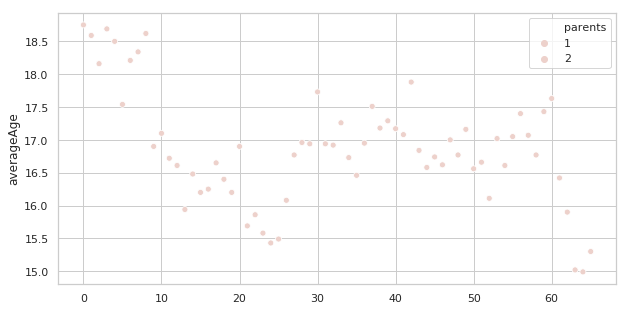

averageFitness


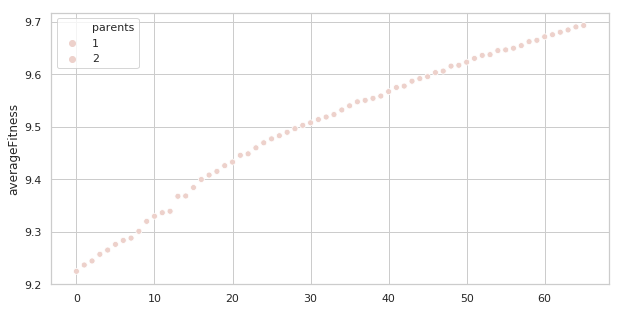

averageOfstdevGenomes
maxAge
maxFitness


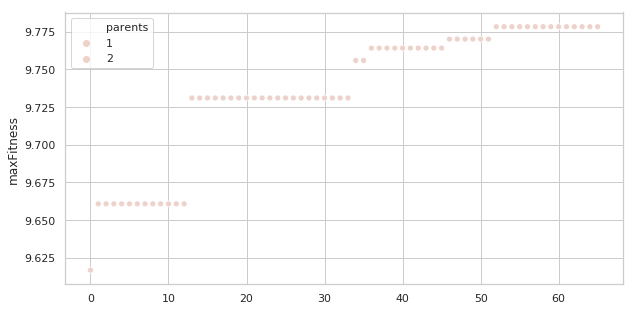

minAge
minFitness
populationSize
stdevAge
stdevFitness
parents
run_config_wo_parents
{"parentScheme": uniform, "recombinationScheme": uniform,
run_config
generation_nr
averageAge


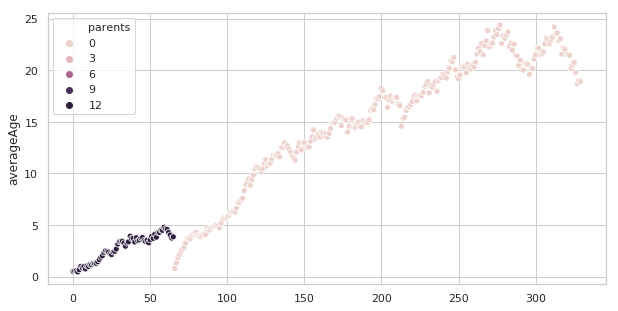

averageFitness


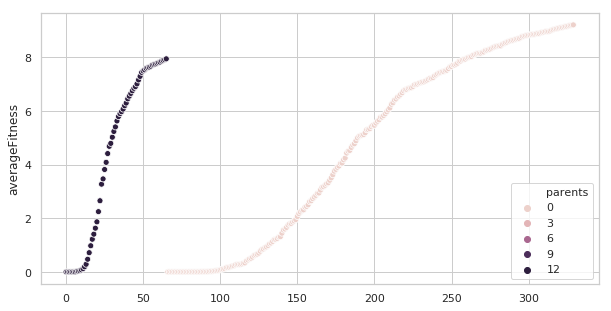

averageOfstdevGenomes
maxAge
maxFitness


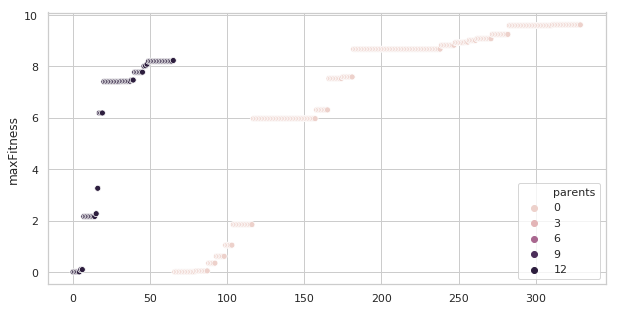

minAge
minFitness
populationSize
stdevAge
stdevFitness
parents
run_config_wo_parents
schaffer
Index(['averageAge', 'averageFitness', 'averageOfstdevGenomes',
       'generation_nr', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'run_config', 'stdevAge', 'stdevFitness',
       'stdevGenomes', 'parents', 'run_config_without_parents'],
      dtype='object')
Index(['averageAge', 'averageFitness', 'averageOfstdevGenomes', 'maxAge',
       'maxFitness', 'minAge', 'minFitness', 'populationSize', 'stdevAge',
       'stdevFitness', 'parents'],
      dtype='object')
Index(['run_config', 'generation_nr', 'averageAge', 'averageFitness',
       'averageOfstdevGenomes', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'stdevAge', 'stdevFitness', 'parents'],
      dtype='object')
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic,
run_config
generation_nr
averageAge


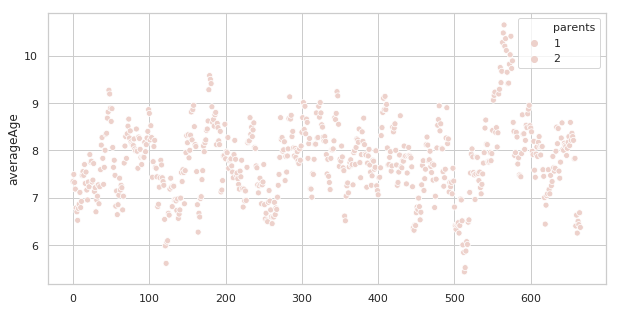

averageFitness


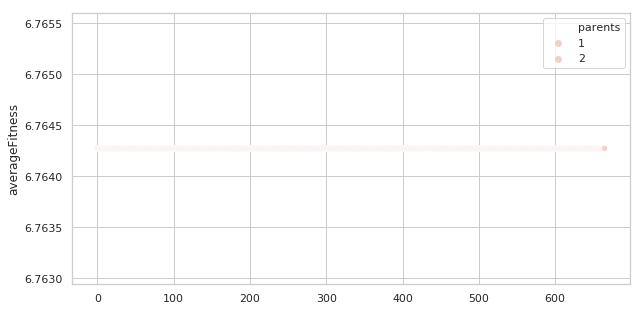

averageOfstdevGenomes
maxAge
maxFitness


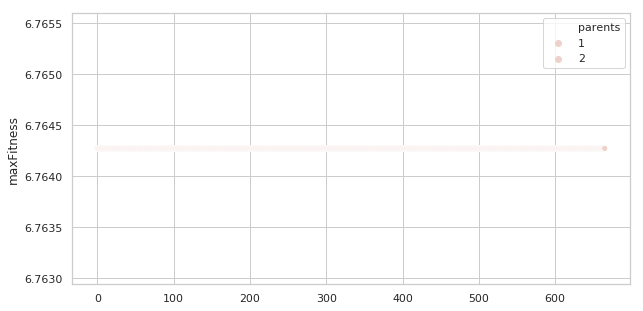

minAge
minFitness
populationSize
stdevAge
stdevFitness
parents
run_config_wo_parents
{"parentScheme": uniform, "recombinationScheme": uniform,
run_config
generation_nr
averageAge


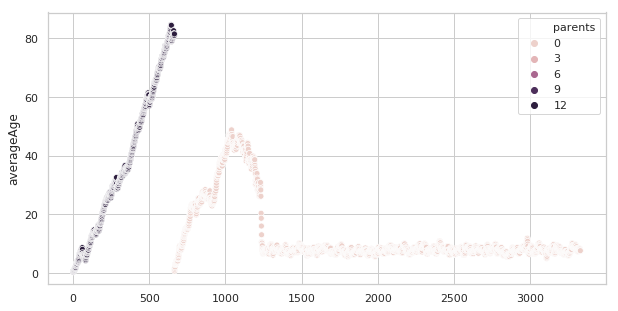

averageFitness


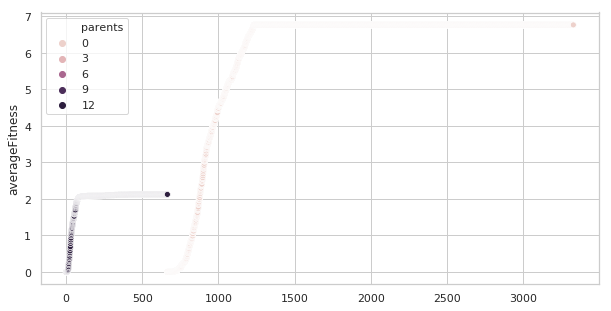

averageOfstdevGenomes
maxAge
maxFitness


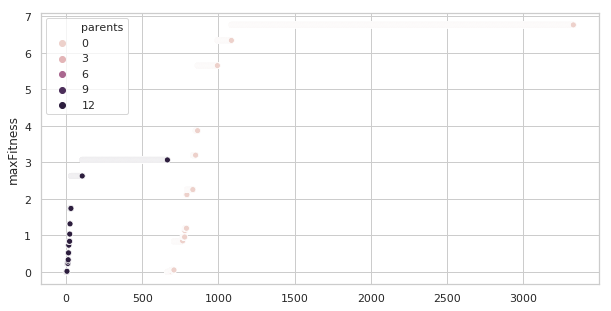

minAge
minFitness
populationSize
stdevAge
stdevFitness
parents
run_config_wo_parents
katsuura
Index(['averageAge', 'averageFitness', 'averageOfstdevGenomes',
       'generation_nr', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'run_config', 'stdevAge', 'stdevFitness',
       'stdevGenomes', 'parents', 'run_config_without_parents'],
      dtype='object')
Index(['averageAge', 'averageFitness', 'averageOfstdevGenomes', 'maxAge',
       'maxFitness', 'minAge', 'minFitness', 'populationSize', 'stdevAge',
       'stdevFitness', 'parents'],
      dtype='object')
Index(['run_config', 'generation_nr', 'averageAge', 'averageFitness',
       'averageOfstdevGenomes', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'stdevAge', 'stdevFitness', 'parents'],
      dtype='object')
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic,
run_config
generation_nr
averageAge


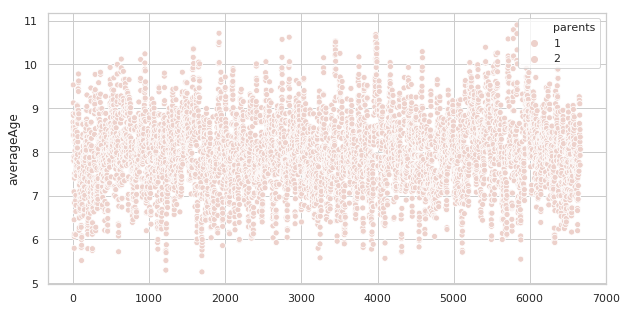

averageFitness


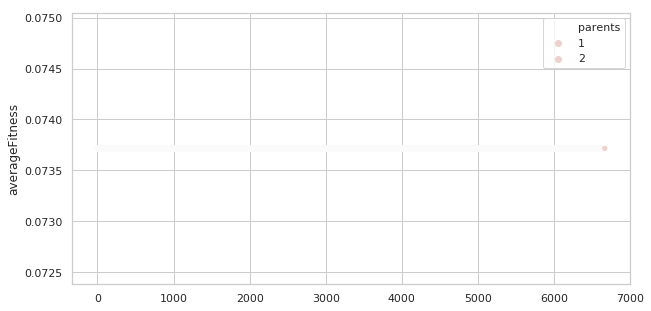

averageOfstdevGenomes
maxAge
maxFitness


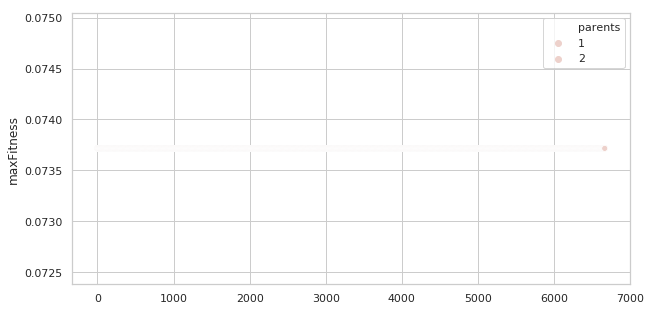

minAge
minFitness
populationSize
stdevAge
stdevFitness
parents
run_config_wo_parents
{"parentScheme": uniform, "recombinationScheme": uniform,
run_config
generation_nr
averageAge


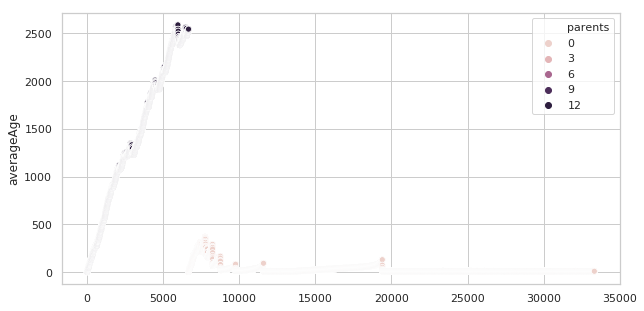

averageFitness


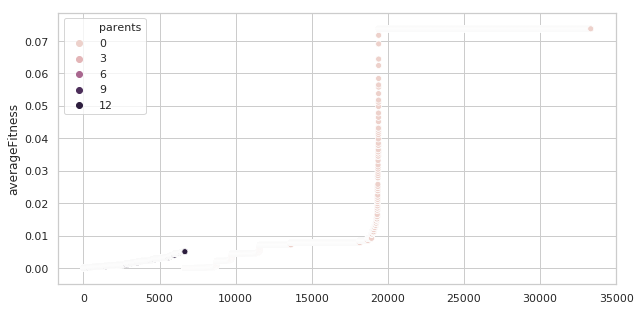

averageOfstdevGenomes
maxAge
maxFitness


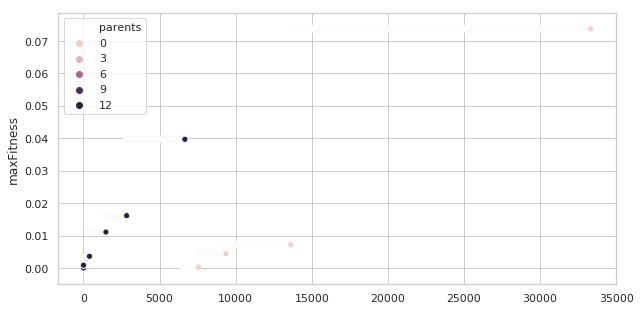

minAge
minFitness
populationSize
stdevAge
stdevFitness
parents
run_config_wo_parents


In [76]:

def plot_columns(df):    
    for col in df:
        print(col)
        if col not in {'averageAge', 'averageFitness', 'maxFitness', 'averageFitness'}:
            continue

        plt.figure(figsize=(10, 5))
        sns.scatterplot(y=df[col], x=range(len(df[col])))

        plt.show()
        

def plot_columns_parents(df):    
    for col in df:
        print(col)
        if col not in {'averageAge', 'averageFitness', 'maxFitness', 'averageFitness'}:
            continue

        
        plt.figure(figsize=(10, 5))
#             sns.scatterplot(y=df[col], x=range(len(df[col])), hue=df['parents'])
        sns.scatterplot(y=df[col], x=range(len(df[col])), hue=df['parents'])

        plt.show()


for fn, total_df in total_dfs.items():
    total_df = total_df.copy()
    print(fn)
    
    
#     total_df['run_config_wo_parents'] = 
#     display(total_df)
#     return
#     print(total_df['run_config_without_parents'])
    print(total_df.keys())
    
    mean = total_df.groupby(['run_config', 'generation_nr']).mean()
#     display(mean)
    print(mean.keys())
    mean = mean.reset_index()
    print(mean.keys())
    
    mean['parents'] = mean['run_config'].map(lambda x: int(re.search('nr_of_parents\": ([0-9]+)', x).groups(1)[0]))
    new_col = total_df['run_config'].map(lambda x: (re.search('(.+) \"nr_of_parents\": ([0-9]+)', x).groups(1)[0]))
    mean = mean.assign(run_config_wo_parents=new_col.values)
    
    for name, group in mean.groupby('run_config_wo_parents'):
        print(name)
#         display(group)
        plot_columns_parents(group)

In [72]:
class hashabledict(dict):
    def __hash__(self):
        return hash(tuple(sorted(self.items())))

# for fn, total_df in total_dfs.items():
#     if total_df is None:
#         del total_dfs[fn]

# Take means over configurations per amount of parents.
# Then plot every configuration as a point in space, according to its fitness
# Fitness: y-axis, parents: x-axis
for fn, total_df in total_dfs.items():
    total_df = total_df.copy()
    
    total_df['run_config'] = total_df['run_config'].map(lambda x: hashabledict(json.loads(x)))
    total_df['nr_of_parents'] = total_df['run_config'].map(lambda x: x['nr_of_parents'])
    
    # del parents so we can group by this column without parents     
    total_df['run_config'] = total_df['run_config'].apply(lambda x: str({k:x[k] for k in x if k != 'nr_of_parents'}))
    
    total_df['style'] = total_df['run_config']
    
#     max_gen_nr = total_df['generation_nr'].max()
#     total_df = total_df[total_df['generation_nr'] == max_gen_nr]
#     display(total_df)
    
    mean = total_df.groupby(['nr_of_parents', 'run_config', 'generation_nr']).mean()
    mean = mean.reset_index()
    
    idx = mean.groupby(['nr_of_parents', 'run_config'])['maxFitness'].transform(max) == mean['maxFitness']
    mean = mean[idx]
#     print(mean['generation_nr'].unique())
    display(mean)
    
    plt.figure(figsize=(20, 15))
    g = sns.lineplot(y=mean['maxFitness'], x=mean['nr_of_parents'], hue=mean['run_config'], style=mean['style'])
    
    
    #Clear the axes containing the scatter plot
#     g.ax_joint.collections[0].set_visible(False)

#     #Generate some colors and markers
#     colors = np.random.random((len(mean),3))
#     markers = ['x','o','v','^','<']*len(mean)

#     #Plot each individual point separately
#     for i,row in enumerate(mean.values):
#         g.ax_joint.plot(row[0], row[1], color=colors[i], marker=markers[i])
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.show()
    



,nr_of_parents,run_config,generation_nr,averageAge,averageFitness,averageOfstdevGenomes,maxAge,maxFitness,minAge,minFitness,populationSize,stdevAge,stdevFitness
105,2,"{'parentScheme': 'deterministic_fitness', 'rec...",105.0,7.150,8.368160,0.195173,34.6,9.602436,0.0,7.900503,100.0,6.942808,0.376441
106,2,"{'parentScheme': 'deterministic_fitness', 'rec...",106.0,7.362,8.413457,0.190375,35.6,9.602436,0.0,7.983573,100.0,7.023994,0.365313
107,2,"{'parentScheme': 'deterministic_fitness', 'rec...",107.0,7.206,8.468891,0.188682,36.6,9.602436,0.0,8.057572,100.0,7.235422,0.357596
108,2,"{'parentScheme': 'deterministic_fitness', 'rec...",108.0,7.032,8.527793,0.186713,37.6,9.602436,0.0,8.126829,100.0,7.411678,0.352868
109,2,"{'parentScheme': 'deterministic_fitness', 'rec...",109.0,7.402,8.569975,0.184116,38.6,9.602436,0.0,8.178371,100.0,7.515467,0.350857
219,2,"{'parentScheme': 'deterministic_fitness', 'rec...",109.0,5.388,9.049438,0.038207,31.0,9.276793,0.0,8.997623,100.0,6.104626,0.044878
328,2,"{'parentScheme': 'deterministic_fitness', 'rec...",108.0,7.166,8.233028,0.211904,38.6,9.198022,0.0,7.774733,100.0,7.709571,0.340673
329,2,"{'parentScheme': 'deterministic_fitness', 'rec...",109.0,7.380,8.288740,0.204640,37.6,9.198022,0.0,7.850834,100.0,7.645611,0.320814
438,2,"{'parentScheme': 'deterministic_fitness', 'rec...",108.0,24.596,0.366798,0.756550,89.2,2.711488,0.0,0.131536,100.0,20.856387,0.399474
439,2,"{'parentScheme': 'deterministic_fitness', 'rec...",109.0,25.224,0.375907,0.752696,90.2,2.711488,0.0,0.132510,100.0,21.097437,0.403255


KeyError: 'style'

In [ ]:
# for fn, total_df in total_dfs.items():
#     if total_df is None:
#         del total_dfs[fn]


# Take means over configurations per amount of parents.
# Then plot every configuration as a point in space, according to its fitness
# Fitness: y-axis, parents: x-axis
for fn, total_df in total_dfs.items():
    total_df = total_df.copy()
    
    total_df['run_config'] = total_df['run_config'].map(lambda x: hashabledict(json.loads(x)))
    total_df['nr_of_parents'] = total_df['run_config'].map(lambda x: x['nr_of_parents'])
    
    # del parents so we can group by this column without parents     
    total_df['run_config'] = total_df['run_config'].apply(lambda x: str({k:x[k] for k in x if k != 'nr_of_parents'}))
    
#     max_gen_nr = total_df['generation_nr'].max()
#     total_df = total_df[total_df['generation_nr'] == max_gen_nr]
#     display(total_df)
    
    mean = total_df
#     mean = total_df.groupby(['nr_of_parents', 'generation_nr']).mean()
#     mean = mean.reset_index()
    print(mean['nr_of_parents'].unique())
#     display(mean)
#     for i in range(2, 11):
#         min_nr = mean[mean['nr_of_parents'] == i]['generation_nr'].min()
#         max_nr = mean[mean['nr_of_parents'] == i]['generation_nr'].max()
#         print(i, min_nr, max_nr)
    

#     sns.lineplot(y=mean['maxFitness'], x=mean['generation_nr'], hue=[str(x) for x in mean['nr_of_parents']])

#     mean['nr_of_parents'] = mean['nr_of_parents'].map(lambda x: str(x))
#     for i in range(2, 11):
#         print('nr_of_parents', i)
#         plt.figure(figsize=(10, 5))
#         sns.lineplot(y='maxFitness', x='generation_nr', data=mean[mean['nr_of_parents'] == i], ci='sd')
#         plt.show()
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(y='maxFitness', x='generation_nr', hue='nr_of_parents', data=mean, ci='sd')
    plt.show()
    
    plt.figure(figsize=(10, 5))
    max_nrs = {}
    for i in range(2, 11):
        min_nr = mean[mean['nr_of_parents'] == i]['generation_nr'].min()
        max_nr = mean[mean['nr_of_parents'] == i]['generation_nr'].max()
        print(i, min_nr, max_nr)
        max_nrs[i] = max_nr
        
#         for index, row in mean[mean['nr_of_parents'] == i].iterrows():
#             mean.at['generation_nr_scaled', index] = float(row['generation_nr']) / max_nr

#             if row['nr_of_parents'] == i:            
#                 row['generation_nr'] = 
#         mean[mean['nr_of_parents'] == i]['generation_nr'] = mean['generation_nr'].map(lambda x: x / max_nr)
#     for index, row in mean.iterrows():
#         mean.at['generation_nr_scaled', index] = float(row['generation_nr']) / max_nrs[row['nr_of_parents']]
        
    mean['generation_nr_scaled'] = 0
    for group_name, group in mean.groupby('nr_of_parents'):
        print(type(group), group.keys())
        max_nr = group['generation_nr'].max()
        mean.loc[group.index, 'generation_nr_scaled'] = group['generation_nr'].transform(lambda x: x / max_nr)
    
    print(mean.keys())
#     mean['generation_nr_scaled'] = mean.map(axis=1, func=lambda x: x['generation_nr'] / max_nrs[x.name])
    sns.lineplot(y='maxFitness', x='generation_nr_scaled', hue='nr_of_parents', data=mean, ci='sd')

    plt.show()
    